Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)[[date_column, target_column]]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)

Create model

In [3]:
model = AutoTS(
    forecast_length=30,
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [4]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [5]:
print(model_lists["univariate"])

['UnivariateMotif', 'KalmanStateSpace', 'FFT', 'SeasonalityMotif', 'MLEnsemble', 'LastValueNaive', 'ARCH', 'DatepartRegression', 'MetricMotif', 'NeuralProphet', 'PreprocessingRegression', 'ConstantNaive', 'FBProphet', 'ARIMA', 'UnobservedComponents', 'ETS', 'SeasonalNaive', 'ARDL', 'GLM', 'Theta', 'GLS', 'UnivariateRegression', 'AverageValueNaive']


Train test split, fit and prediction

In [6]:
train = df.iloc[:-30]
test = df.iloc[-30:]
model.fit(train[target_column])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.96132D+00    |proj g|=  6.26615D-02


 This problem is unconstrained.



At iterate    1    f=  8.95594D+00    |proj g|=  6.48692D-02

At iterate    2    f=  8.95198D+00    |proj g|=  3.31374D-02

At iterate    3    f=  8.94888D+00    |proj g|=  1.83345D-02

At iterate    4    f=  8.94678D+00    |proj g|=  2.20808D-02

At iterate    5    f=  8.94290D+00    |proj g|=  2.42158D-02

At iterate    6    f=  8.93688D+00    |proj g|=  4.76413D-02

At iterate    7    f=  8.93273D+00    |proj g|=  6.22403D-02

At iterate    8    f=  8.92522D+00    |proj g|=  5.30614D-02

At iterate    9    f=  8.92052D+00    |proj g|=  7.63206D-02

At iterate   10    f=  8.91584D+00    |proj g|=  5.60419D-02

At iterate   11    f=  8.91291D+00    |proj g|=  5.19388D-02

At iterate   12    f=  8.91005D+00    |proj g|=  1.26198D-01

At iterate   13    f=  8.90804D+00    |proj g|=  1.41615D-02

At iterate   14    f=  8.90744D+00    |proj g|=  2.51548D-02

At iterate   15    f=  8.90663D+00    |proj g|=  3.26817D-02

At iterate   16    f=  8.90355D+00    |proj g|=  6.34381D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 8 with model DatepartRegression in generation 0 of 5


2023-12-10 10:42:41.054000: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-10 10:42:41.279798: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-10 10:42:41.279897: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-10 10:42:41.307214: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-10 10:42:41.358501: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
43/43 [==============================] - 8s 6ms/step - loss: 0.3970
Epoch 2/50
43/43 [==============================] - 0s 5ms/step - loss: 0.3909
Epoch 3/50
43/43 [==============================] - 0s 5ms/step - loss: 0.3877
Epoch 4/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3880
Epoch 5/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3883
Epoch 6/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3857
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3861
Epoch 8/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3858
Epoch 9/50
43/43 [==============================] - 0s 8ms/step - loss: 0.3854
Epoch 10/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3859
Epoch 11/50
43/43 [==============================] - 0s 6ms/step - loss: 0.3853
Epoch 12/50
43/43 [==============================] - 0s 7ms/step - loss: 0.3837
Epoch 13/50
43/43 [==============================

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Model Number: 26 with model FBProphet in generation 0 of 5


10:43:13 - cmdstanpy - INFO - Chain [1] start processing
10:43:13 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5
Model Number: 32 with model ETS in generation 0 of 5
Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5
Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5
Model Number: 39 with model Theta in generation 0 of 5
Model Number: 40 with model UnivariateRegr

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 52 with model NeuralProphet in generation 0 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 52 in generation 0: NeuralProphet
Model Number: 53 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 53 in generation 0: PreprocessingRegression
Model Number: 54 with model ConstantNaive in generation 0 of 5
Model Number: 55 with model FBProphet in generation 0 of 5
Model Number: 56 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 56 in generation 0: ARIMA
Model Number: 57 with model UnobservedComponents in generation 0 of 5
Model Number: 58 with model ETS in generation 0 of 5
Model Number: 59 with model SeasonalNaive in generation 0 of 5
Model Number: 60 with model ARDL in generation 0 of 5
Model Number: 61 with model GLM in generation 0 of 5
Model Number: 62 with 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 70 with model Theta in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 70 in generation 0: Theta
Model Number: 71 with model MetricMotif in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 71 in generation 0: MetricMotif
Model Number: 72 with model UnivariateMotif in generation 0 of 5
Model Number: 73 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 74 with model ConstantNaive in generation 0 of 5
Model Number: 75 with model FFT in generation 0 of 5
Model Number: 76 with model FFT in generation 0 of 5
Model Number: 77 with model UnivariateMotif in generation 0 of 5
Model Number: 78 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 78 in generation 0: ARIMA
Model Number: 79 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 79 in generation 0: ARCH
Model Number: 80 with model UnivariateRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 80 in generation 0: UnivariateRegression
Model Number: 81 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 81 in generation 0: MLEnsemble
Model Number: 82 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 82 in generation 0: ARCH
Model Number: 83 with model MLEnsemble in generation 0 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 83 in generation 0: MLEnsemble
Model Number: 84 with model SeasonalNaive in generation 0 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 84 in generation 0: SeasonalNaive
Model Number: 85 with model NeuralPr

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18293D+00    |proj g|=  1.91817D-01

At iterate    1    f=  8.17622D+00    |proj g|=  1.15818D-01


 This problem is unconstrained.



At iterate    2    f=  8.16798D+00    |proj g|=  8.87583D-02

At iterate    3    f=  8.15120D+00    |proj g|=  4.88375D-02

At iterate    4    f=  8.14897D+00    |proj g|=  1.59905D-01

At iterate    5    f=  8.14195D+00    |proj g|=  1.91523D-02

At iterate    6    f=  8.14129D+00    |proj g|=  1.66575D-02

At iterate    7    f=  8.14031D+00    |proj g|=  8.15292D-03

At iterate    8    f=  8.13996D+00    |proj g|=  2.21945D-02

At iterate    9    f=  8.13985D+00    |proj g|=  9.59825D-03

At iterate   10    f=  8.13980D+00    |proj g|=  4.91554D-03

At iterate   11    f=  8.13975D+00    |proj g|=  4.98941D-03

At iterate   12    f=  8.13961D+00    |proj g|=  5.47915D-03

At iterate   13    f=  8.13946D+00    |proj g|=  1.57570D-02

At iterate   14    f=  8.13930D+00    |proj g|=  3.61664D-02

At iterate   15    f=  8.13916D+00    |proj g|=  7.55109D-03

At iterate   16    f=  8.13906D+00    |proj g|=  5.43171D-03

At iterate   17    f=  8.13899D+00    |proj g|=  1.54049D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 91 with model MetricMotif in generation 0 of 5
Model Number: 92 with model UnobservedComponents in generation 0 of 5
Model Number: 93 with model Theta in generation 0 of 5
Model Number: 94 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 94 in generation 0: NeuralProphet
Model Number: 95 with model LastValueNaive in generation 0 of 5
Model Number: 96 with model GLM in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 96 in generation 0: GLM
Model Number: 97 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44157D-01    |proj g|=  1.45387D+00


 This problem is unconstrained.



At iterate    1    f= -1.54286D-01    |proj g|=  6.64905D-01

At iterate    2    f= -2.03149D-01    |proj g|=  3.35211D+00

At iterate    3    f= -4.85220D-01    |proj g|=  5.84000D+00

At iterate    4    f= -7.79976D-01    |proj g|=  3.80542D+00

At iterate    5    f= -1.34326D+00    |proj g|=  7.57816D+00

At iterate    6    f= -1.64910D+00    |proj g|=  9.15992D+00

At iterate    7    f= -1.68873D+00    |proj g|=  8.40739D+00

At iterate    8    f= -1.73914D+00    |proj g|=  1.08656D+01

At iterate    9    f= -1.75678D+00    |proj g|=  8.18719D+00

At iterate   10    f= -1.86402D+00    |proj g|=  1.24397D+01

At iterate   11    f= -1.89768D+00    |proj g|=  3.72420D+00

At iterate   12    f= -1.90946D+00    |proj g|=  2.33274D+00

At iterate   13    f= -1.91873D+00    |proj g|=  1.13693D+00

At iterate   14    f= -1.92274D+00    |proj g|=  1.03096D+00

At iterate   15    f= -1.93265D+00    |proj g|=  7.92051D-01

At iterate   16    f= -1.93876D+00    |proj g|=  3.91101D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 99 with model KalmanStateSpace in generation 0 of 5
Model Number: 100 with model ETS in generation 0 of 5
Model Number: 101 with model FBProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 101 in generation 0: FBProphet
Model Number: 102 with model AverageValueNaive in generation 0 of 5
Model Number: 103 with model MetricMotif in generation 0 of 5
Model Number: 104 with model ETS in generation 0 of 5
Model Number: 105 with model ETS in generation 0 of 5
Model Number: 106 with model FBProphet in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 107 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 107 in generation 0: PreprocessingRegression
Model Number: 108 with model SeasonalityMotif in generation 0 of 5
Model Number: 109 with model AverageValueNaive in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 110 with model ARDL in generation 0 of 5
Model Number: 111 with model AverageValueNaive in generation 0 of 5
Model Number: 112 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.51406D+00    |proj g|=  9.87383D-01

At iterate    1    f=  9.21406D+00    |proj g|=  2.55058D-01

At iterate    2    f=  9.17285D+00    |proj g|=  5.77143D-02


 This problem is unconstrained.



At iterate    3    f=  9.16988D+00    |proj g|=  4.99626D-02

At iterate    4    f=  9.15741D+00    |proj g|=  5.22462D-02

At iterate    5    f=  9.15296D+00    |proj g|=  3.54715D-02

At iterate    6    f=  9.15162D+00    |proj g|=  2.05988D-02

At iterate    7    f=  9.15069D+00    |proj g|=  2.30113D-02

At iterate    8    f=  9.15006D+00    |proj g|=  1.66489D-02

At iterate    9    f=  9.14872D+00    |proj g|=  1.44697D-02

At iterate   10    f=  9.14829D+00    |proj g|=  6.66597D-03

At iterate   11    f=  9.14801D+00    |proj g|=  7.65968D-03

At iterate   12    f=  9.14793D+00    |proj g|=  1.03710D-02

At iterate   13    f=  9.14785D+00    |proj g|=  4.52423D-03

At iterate   14    f=  9.14774D+00    |proj g|=  3.61330D-03

At iterate   15    f=  9.14769D+00    |proj g|=  2.73960D-03

At iterate   16    f=  9.14768D+00    |proj g|=  6.18738D-04

At iterate   17    f=  9.14768D+00    |proj g|=  3.66539D-04

At iterate   18    f=  9.14768D+00    |proj g|=  2.15515D-04

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 114 with model ConstantNaive in generation 0 of 5
Model Number: 115 with model GLM in generation 0 of 5
Model Number: 116 with model AverageValueNaive in generation 0 of 5
Model Number: 117 with model KalmanStateSpace in generation 0 of 5
Model Number: 118 with model GLM in generation 0 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 118 in generation 0: GLM
Model Number: 119 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 119 in generation 0: GLM
Model Number: 120 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 120 in generation 0: UnivariateRegression
Model Number: 121 with model SeasonalNaive in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 121 in generation 0: SeasonalNaive
Model Number: 122 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 122 in generation 0: PreprocessingRegression
Model Number: 123 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 123 in generation 0: PreprocessingRegression
Model Number: 124 w

 This problem is unconstrained.



At iterate    4    f=  9.47382D+00    |proj g|=  5.51767D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4      6      1     0     0   5.518D-05   9.474D+00
  F =   9.4738232127830404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 126 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 126 in generation 0: MLEnsemble
Model Number: 127 with model Theta in generation 0 of 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning:

Model Number: 131 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 131 in generation 0: UnivariateRegression
Model Number: 132 with model FBProphet in generation 0 of 5
Model Number: 133 with model GLM in generation 0 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 133 in generation 0: GLM
Model Number: 134 with model ConstantNaive in generation 0 of 5
Model Number: 135 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 135 in generation 0: ARCH
Model Number: 136 with model MetricMotif in generation 0 of 5
Model Number: 137 with model SeasonalityMotif in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 138 with model FBProphet in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 138 in generation 0: FBProphet
Model Number: 139 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 139 in generation 0: ARDL
Model Number: 140 with model ARDL in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 140 in generation 0: ARDL
Model Number: 141 with model AverageValueNaive in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 142 with model NeuralProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 142 in generation 0: NeuralProphet
Model Number: 143 with model SeasonalityMotif in generation 0 of 5
Model Number: 144 with model UnivariateMotif in generation 0 of 5
Model Number: 145 with model ARIMA in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 145 in generation 0: ARIMA
Model Number: 146 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 1 and the array at index 1 has size 21') in model 146 in generation 0: MLEnsemble
Model Number: 147 with model GLS in generation 0 of 5
Model Number: 148 with model SeasonalityMotif in generation 0 of 5
Model Number: 149 with model NeuralProphet in generation 0

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 152 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 152 in generation 0: DatepartRegression
Model Number: 153 with model MetricMotif in generation 0 of 5
Model Number: 154 with model GLS in generation 0 of 5
Model Number: 155 with model UnivariateMotif in generation 0 of 5
Model Number: 156 with model SeasonalNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 156 in generation 0: SeasonalNaive
Model Number: 157 with model KalmanStateSpace in generation 0 of 5
New Generation: 1 of 5
Model Number: 158 with model AverageValueNaive in generation 1 of 5
Model Number: 159 with model KalmanStateSpace in generation 1 of 5
Model Number: 160 with model UnivariateMotif in generation 1 of 5
Model Number: 161 with model LastValueNaive in generation 1 of 5
Model Number: 162 with model AverageValueNaive in generation 1 of 5


 This problem is unconstrained.



At iterate    5    f= -2.89080D+00    |proj g|=  4.32638D-01

At iterate    6    f= -2.89087D+00    |proj g|=  1.05370D+00

At iterate    7    f= -2.89108D+00    |proj g|=  2.11327D+00

At iterate    8    f= -2.89158D+00    |proj g|=  3.61255D+00

At iterate    9    f= -2.89266D+00    |proj g|=  5.33869D+00

At iterate   10    f= -2.89444D+00    |proj g|=  5.91820D+00

At iterate   11    f= -2.89623D+00    |proj g|=  3.81591D+00

At iterate   12    f= -2.89694D+00    |proj g|=  9.61120D-01

At iterate   13    f= -2.89702D+00    |proj g|=  1.38827D-01

At iterate   14    f= -2.89704D+00    |proj g|=  3.89920D-01

At iterate   15    f= -2.89706D+00    |proj g|=  6.62274D-01

At iterate   16    f= -2.89713D+00    |proj g|=  1.11231D+00

At iterate   17    f= -2.89731D+00    |proj g|=  1.80876D+00

At iterate   18    f= -2.89777D+00    |proj g|=  2.84840D+00

At iterate   19    f= -2.89877D+00    |proj g|=  4.14832D+00

At iterate   20    f= -2.90054D+00    |proj g|=  5.01750D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate    1    f=  9.93251D+00    |proj g|=  1.13501D-04

At iterate    2    f=  9.27801D+00    |proj g|=  8.62936D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2     18      1     0     0   8.629D-06   9.278D+00
  F =   9.2780113015827155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 183 with model AverageValueNaive in generation 1 of 5
Model Number: 184 with model SeasonalityMotif in generation 1 of 5
Model Number: 185 with model UnobservedComponents in generation 1 of 5
Model Number: 186 with model LastValueNaive in generation 1 of 5
Model Number: 187 with model

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 188 with model SeasonalNaive in generation 1 of 5
Model Number: 189 with model KalmanStateSpace in generation 1 of 5
Model Number: 190 with model Theta in generation 1 of 5
Model Number: 191 with model ConstantNaive in generation 1 of 5
Model Number: 192 with model GLS in generation 1 of 5
Model Number: 193 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 193 in generation 1: UnobservedComponents
Model Number: 194 with model ARDL in generation 1 of 5
Model Number: 195 with model ETS in generation 1 of 5
Model Number: 196 with model KalmanStateSpace in generation 1 of 5
Model Number: 197 with model UnobservedComponents in generation 1 of 5
Model Number: 198 with model UnivariateMotif in generation 1 of 5
Model Number: 199 with model LastValueNaive in generation 1 of 5
Model Number: 200 with model SeasonalNaive in generation 1 of 5
Model Number: 201 with model MetricMotif

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmo

Model Number: 209 with model ConstantNaive in generation 1 of 5
Model Number: 210 with model ConstantNaive in generation 1 of 5
Model Number: 211 with model FFT in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 212 with model SeasonalityMotif in generation 1 of 5
Model Number: 213 with model SeasonalNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 213 in generation 1: SeasonalNaive
Model Number: 214 with model UnivariateMotif in generation 1 of 5
Model Number: 215 with model ETS in generation 1 of 5
Model Number: 216 with model SeasonalityMotif in generation 1 of 5
Model Number: 217 with model SeasonalNaive in generation 1 of 5
Model Number: 218 with model MetricMotif in generation 1 of 5
Model Number: 219 with model MetricMotif in generation 1 of 5
Model Number: 220 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 220 in generation 1: DatepartRegression
Model Number: 221 with model SeasonalNaive in generation 1 of 5
Model Number: 222 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess o

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
 This problem is unconstrained.



At iterate    1    f=  9.10458D+00    |proj g|=  4.42682D-02

At iterate    2    f=  9.10082D+00    |proj g|=  1.82540D-02

At iterate    3    f=  9.09895D+00    |proj g|=  1.53499D-02

At iterate    4    f=  9.09752D+00    |proj g|=  1.54212D-02

At iterate    5    f=  9.09626D+00    |proj g|=  1.15459D-02

At iterate    6    f=  9.09350D+00    |proj g|=  1.46820D-02

At iterate    7    f=  9.09146D+00    |proj g|=  1.60100D-02

At iterate    8    f=  9.08993D+00    |proj g|=  1.64756D-02

At iterate    9    f=  9.08970D+00    |proj g|=  1.52427D-02

At iterate   10    f=  9.08932D+00    |proj g|=  6.97685D-03

At iterate   11    f=  9.08906D+00    |proj g|=  5.24160D-03

At iterate   12    f=  9.08874D+00    |proj g|=  7.69632D-03

At iterate   13    f=  9.08854D+00    |proj g|=  4.24017D-03

At iterate   14    f=  9.08837D+00    |proj g|=  3.21258D-03

At iterate   15    f=  9.08827D+00    |proj g|=  6.98415D-03

At iterate   16    f=  9.08815D+00    |proj g|=  1.69349D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.95594D+00    |proj g|=  6.48692D-02

At iterate    2    f=  8.95198D+00    |proj g|=  3.31374D-02

At iterate    3    f=  8.94888D+00    |proj g|=  1.83345D-02

At iterate    4    f=  8.94678D+00    |proj g|=  2.20808D-02

At iterate    5    f=  8.94290D+00    |proj g|=  2.42158D-02

At iterate    6    f=  8.93688D+00    |proj g|=  4.76413D-02

At iterate    7    f=  8.93273D+00    |proj g|=  6.22403D-02

At iterate    8    f=  8.92522D+00    |proj g|=  5.30614D-02

At iterate    9    f=  8.92052D+00    |proj g|=  7.63206D-02

At iterate   10    f=  8.91584D+00    |proj g|=  5.60419D-02

At iterate   11    f=  8.91291D+00    |proj g|=  5.19388D-02

At iterate   12    f=  8.91005D+00    |proj g|=  1.26198D-01

At iterate   13    f=  8.90804D+00    |proj g|=  1.41615D-02

At iterate   14    f=  8.90744D+00    |proj g|=  2.51548D-02

At iterate   15    f=  8.90663D+00    |proj g|=  3.26817D-02

At iterate   16    f=  8.90355D+00    |proj g|=  6.34381D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 233 with model AverageValueNaive in generation 1 of 5
Model Number: 234 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.85099D+00    |proj g|=  7.22182D+00

At iterate    1    f= -2.85391D+00    |proj g|=  1.57280D+00

At iterate    2    f= -2.85420D+00    |proj g|=  8.33090D-01

At iterate    3    f= -2.85467D+00    |proj g|=  1.14898D+00

At iterate    4    f= -2.85650D+00    |proj g|=  3.92341D+00

At iterate    5    f= -2.85953D+00    |proj g|=  6.17939D+00

At iterate    6    f= -2.86398D+00    |proj g|=  6.66156D+00

At iterate    7    f= -2.87401D+00    |proj g|=  6.83741D+00

At iterate    8    f= -2.92571D+00    |proj g|=  6.01072D+00

At iterate    9    f= -2.99624D+00    |proj g|=  5.61692D+00

At iterate   10    f= -3.12502D+00    |proj g|=  5.75533D+00


 This problem is unconstrained.



At iterate   11    f= -3.16000D+00    |proj g|=  4.97558D+01

At iterate   12    f= -3.20627D+00    |proj g|=  3.64875D+01

At iterate   13    f= -3.24177D+00    |proj g|=  6.25340D+00

At iterate   14    f= -3.26587D+00    |proj g|=  1.39606D+00

At iterate   15    f= -3.32010D+00    |proj g|=  2.67217D+01

At iterate   16    f= -3.37560D+00    |proj g|=  5.75650D+01

At iterate   17    f= -3.43328D+00    |proj g|=  1.85441D+01

At iterate   18    f= -3.44450D+00    |proj g|=  7.11501D+00

At iterate   19    f= -3.44602D+00    |proj g|=  1.44203D+00

At iterate   20    f= -3.44613D+00    |proj g|=  4.60040D-01

At iterate   21    f= -3.44616D+00    |proj g|=  2.10481D-01

At iterate   22    f= -3.44628D+00    |proj g|=  2.09428D-01

At iterate   23    f= -3.44699D+00    |proj g|=  1.29172D+00

At iterate   24    f= -3.44915D+00    |proj g|=  3.36469D+00

At iterate   25    f= -3.45367D+00    |proj g|=  5.79634D+00

At iterate   26    f= -3.46436D+00    |proj g|=  9.73620D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  250    f= -3.80761D+00    |proj g|=  2.95785D-01

At iterate  251    f= -3.80761D+00    |proj g|=  2.05269D-01

At iterate  252    f= -3.80761D+00    |proj g|=  3.12767D-01

At iterate  253    f= -3.80762D+00    |proj g|=  1.92181D-01

At iterate  254    f= -3.80762D+00    |proj g|=  1.47077D-01

At iterate  255    f= -3.80763D+00    |proj g|=  3.88739D-01

At iterate  256    f= -3.80765D+00    |proj g|=  1.00050D+00

At iterate  257    f= -3.80770D+00    |proj g|=  1.66239D+00

At iterate  258    f= -3.80781D+00    |proj g|=  2.48121D+00

At iterate  259    f= -3.80797D+00    |proj g|=  2.87015D+00

At iterate  260    f= -3.80806D+00    |proj g|=  1.52947D+00

At iterate  261    f= -3.80812D+00    |proj g|=  8.35604D-02

At iterate  262    f= -3.80813D+00    |proj g|=  1.91893D-01

At iterate  263    f= -3.80813D+00    |proj g|=  4.50141D-01

At iterate  264    f= -3.80814D+00    |proj g|=  3.15647D-01

At iterate  265    f= -3.80817D+00    |proj g|=  1.01180D+00

At iter

 This problem is unconstrained.


Model Number: 247 with model GLM in generation 1 of 5
Model Number: 248 with model UnobservedComponents in generation 1 of 5
Model Number: 249 with model SeasonalityMotif in generation 1 of 5
Model Number: 250 with model DatepartRegression in generation 1 of 5
Model Number: 251 with model ETS in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 252 with model UnobservedComponents in generation 1 of 5
Model Number: 253 with model GLS in generation 1 of 5
Model Number: 254 with model FFT in generation 1 of 5
Model Number: 255 with model AverageValueNaive in generation 1 of 5
Model Number: 256 with model SeasonalityMotif in generation 1 of 5
Model Number: 257 with model LastValueNaive in generation 1 of 5
Model Number: 258 with model FBProphet in generation 1 of 5
Model Number: 259 with model DatepartRegression in generation 1 of 5
Model Number: 260 with model SeasonalityMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 261 with model FBProphet in generation 1 of 5
Model Number: 262 with model AverageValueNaive in generation 1 of 5
Model Number: 263 with model UnivariateMotif in generation 1 of 5
Model Number: 264 with model ARDL in generation 1 of 5
Model Number: 265 with model MetricMotif in generation 1 of 5
Model Number: 266 with model SeasonalNaive in generation 1 of 5
Model Number: 267 with model GLM in generation 1 of 5
Model Number: 268 with model ETS in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 269 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 269 in generation 1: UnobservedComponents
Model Number: 270 with model MetricMotif in generation 1 of 5
Model Number: 271 with model ETS in generation 1 of 5
Model Number: 272 with model SeasonalityMotif in generation 1 of 5
New Generation: 2 of 5
Model Number: 273 with model SeasonalNaive in generation 2 of 5
Model Number: 274 with model SeasonalityMotif in generation 2 of 5
Model Number: 275 with model ARDL in generation 2 of 5
Model Number: 276 with model ARDL in generation 2 of 5
Model Number: 277 with model UnobservedComponents in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 277 in generation 2: UnobservedComponents
Model Number: 278 with model LastValueNaive in generation 2 of 5
Model Number: 279 with model ETS in generation 2 of 5
Model Nu

 This problem is unconstrained.



At iterate   25    f= -2.68754D+00    |proj g|=  4.10088D+00

At iterate   26    f= -2.69365D+00    |proj g|=  1.17691D+01

At iterate   27    f= -2.70501D+00    |proj g|=  2.34905D+00

At iterate   28    f= -2.70740D+00    |proj g|=  1.55531D+00

At iterate   29    f= -2.70823D+00    |proj g|=  6.89090D-01

At iterate   30    f= -2.71115D+00    |proj g|=  6.69701D-01

At iterate   31    f= -2.71867D+00    |proj g|=  3.15703D+00

At iterate   32    f= -2.73733D+00    |proj g|=  6.20412D+00

At iterate   33    f= -2.78090D+00    |proj g|=  1.02040D+01

At iterate   34    f= -2.81213D+00    |proj g|=  1.03287D+01

At iterate   35    f= -2.82270D+00    |proj g|=  1.70012D+01

At iterate   36    f= -2.83774D+00    |proj g|=  6.07857D+00

At iterate   37    f= -2.85976D+00    |proj g|=  8.31744D+00

At iterate   38    f= -2.86369D+00    |proj g|=  1.76937D+00

At iterate   39    f= -2.86468D+00    |proj g|=  6.66413D-01

At iterate   40    f= -2.86637D+00    |proj g|=  2.50835D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 303 with model MetricMotif in generation 2 of 5
Model Number: 304 with model FFT in generation 2 of 5
Model Number: 305 with model AverageValueNaive in generation 2 of 5
Model Number: 306 with model ConstantNaive in generation 2 of 5
Model Number: 307 with model GLS in generation 2 of 5
Model Number: 308 with model UnivariateMotif in generation 2 of 5
Model Number: 309 with model LastValueNaive in generation 2 of 5
Model Number: 310 with model MetricMotif in generation 2 of 5
Model Number: 311 with model ConstantNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 311 in generation 2: ConstantNaive
Model Number: 312 with model FBProphet in generation 2 of 5
Model Number: 313 with model SeasonalityMotif in generation 2 of 5
Model Number: 314 with model ETS in generation 2 of 5
Model Number: 315 with model SeasonalityMotif in generation 2 of 5
Model Number: 316 with model SeasonalityMotif in generation 2 of 5
Mod

 This problem is unconstrained.


At iterate    1    f=  9.12697D+00    |proj g|=  7.01462D-02

At iterate    2    f=  9.12436D+00    |proj g|=  3.49868D-02

At iterate    3    f=  9.12338D+00    |proj g|=  1.48677D-02

At iterate    4    f=  9.12255D+00    |proj g|=  1.19996D-02

At iterate    5    f=  9.12093D+00    |proj g|=  1.93663D-02

At iterate    6    f=  9.12001D+00    |proj g|=  1.82161D-02

At iterate    7    f=  9.11826D+00    |proj g|=  2.64920D-02

At iterate    8    f=  9.11715D+00    |proj g|=  2.51855D-02

At iterate    9    f=  9.11497D+00    |proj g|=  4.02477D-02

At iterate   10    f=  9.11421D+00    |proj g|=  3.33174D-02

At iterate   11    f=  9.11306D+00    |proj g|=  1.40855D-02

At iterate   12    f=  9.11237D+00    |proj g|=  2.13228D-02

At iterate   13    f=  9.11108D+00    |proj g|=  6.43896D-02

At iterate   14    f=  9.11011D+00    |proj g|=  3.84991D-02

At iterate   15    f=  9.10841D+00    |proj g|=  5.44366D-02

At iterate   16    f=  9.10812D+00    |proj g|=  1.27933D-02

At itera

 This problem is unconstrained.



At iterate    3    f=  1.39546D+00    |proj g|=  1.00680D+00

At iterate    4    f=  1.21285D+00    |proj g|=  5.60288D-01

At iterate    5    f=  1.08109D+00    |proj g|=  7.00303D-01

At iterate    6    f=  9.55167D-01    |proj g|=  8.59217D-01

At iterate    7    f=  8.67289D-01    |proj g|=  1.82569D+00

At iterate    8    f=  7.06081D-01    |proj g|=  9.72470D-01

At iterate    9    f=  6.24188D-01    |proj g|=  1.79772D+00

At iterate   10    f= -1.93347D-01    |proj g|=  1.44540D+00

At iterate   11    f= -2.08404D-01    |proj g|=  1.56528D+00

At iterate   12    f= -6.09676D-01    |proj g|=  5.35900D+00

At iterate   13    f= -6.70300D-01    |proj g|=  1.43096D+01

At iterate   14    f= -1.03735D+00    |proj g|=  4.99593D+01

At iterate   15    f= -1.13336D+00    |proj g|=  9.41953D+01

At iterate   16    f= -2.82437D+00    |proj g|=  1.48889D+03
  ys=-2.544E+00  -gs= 5.377E-01 BFGS update SKIPPED

At iterate   17    f= -3.61257D+00    |proj g|=  8.83366D+02

At iterate   18  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 335 with model ETS in generation 2 of 5
Model Number: 336 with model ARDL in generation 2 of 5
Model Number: 337 with model ETS in generation 2 of 5
Model Number: 338 with model ETS in generation 2 of 5
Model Number: 339 with model SeasonalNaive in generation 2 of 5
Model Number: 340 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 340 in generation 2: ARDL
Model Number: 341 with model ConstantNaive in generation 2 of 5
Model Number: 342 with model AverageValueNaive in generation 2 of 5
Model Number: 343 with model SeasonalNaive in generation 2 of 5
Model Number: 344 with model UnobservedComponents in generation 2 of 5
Model Number: 345 with model FBProphet in generation 2 of 5
Model Number: 346 with model ConstantNaive in generation 2 of 5
Model Number: 347 with model LastValueNaive in generation 2 of 5
Model Number: 348 with model DatepartRegression in generation 2 of 5
Model Number

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.61054D+00    |proj g|=  7.96949D-02

At iterate    1    f=  8.59784D+00    |proj g|=  8.73734D-02

At iterate    2    f=  8.58763D+00    |proj g|=  4.47302D-02

At iterate    3    f=  8.58171D+00    |proj g|=  3.45837D-02

At iterate    4    f=  8.57822D+00    |proj g|=  4.09071D-02

At iterate    5    f=  8.57417D+00    |proj g|=  3.67995D-02

At iterate    6    f=  8.57049D+00    |proj g|=  5.52168D-02

At iterate    7    f=  8.56722D+00    |proj g|=  2.44231D-02

At iterate    8    f=  8.56452D+00    |proj g|=  3.60339D-02

At iterate    9    f=  8.56237D+00    |proj g|=  4.55423D-02

At iterate   10    f=  8.55806D+00    |proj g|=  4.21671D-02

At iterate   11    f=  8.55697D+00    |proj g|=  4.77198D-02

At iterate   12    f=  8.55622D+00    |proj g|=  1.48088D-02

At iterate   13    f=  8.5

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 359 with model AverageValueNaive in generation 2 of 5
Model Number: 360 with model UnobservedComponents in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 361 with model UnivariateMotif in generation 2 of 5
Model Number: 362 with model DatepartRegression in generation 2 of 5
Model Number: 363 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69543D+00    |proj g|=  7.54858D+00

At iterate    1    f= -2.69983D+00    |proj g|=  2.20137D+00

At iterate    2    f= -2.70015D+00    |proj g|=  3.73133D-01

At iterate    3    f= -2.70018D+00    |proj g|=  2.88365D-01


 This problem is unconstrained.



At iterate    4    f= -2.70024D+00    |proj g|=  3.82371D-01

At iterate    5    f= -2.70032D+00    |proj g|=  7.01505D-01

At iterate    6    f= -2.70044D+00    |proj g|=  6.21371D-01

At iterate    7    f= -2.70066D+00    |proj g|=  4.77065D-01

At iterate    8    f= -2.70166D+00    |proj g|=  7.65620D-01

At iterate    9    f= -2.70323D+00    |proj g|=  1.14106D+00

At iterate   10    f= -2.70596D+00    |proj g|=  1.31827D+00

At iterate   11    f= -2.70848D+00    |proj g|=  9.63912D-01

At iterate   12    f= -2.70960D+00    |proj g|=  2.23251D-01

At iterate   13    f= -2.70985D+00    |proj g|=  1.02385D-01

At iterate   14    f= -2.71007D+00    |proj g|=  3.01344D-01

At iterate   15    f= -2.71041D+00    |proj g|=  1.05897D+00

At iterate   16    f= -2.71110D+00    |proj g|=  9.00108D-01

At iterate   17    f= -2.71271D+00    |proj g|=  1.25519D+00

At iterate   18    f= -2.71818D+00    |proj g|=  3.22958D+00

At iterate   19    f= -2.72229D+00    |proj g|=  2.41106D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 370 with model ARIMA in generation 2 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.04534D+00    |proj g|=  4.49213D+00

At iterate    1    f= -3.04604D+00    |proj g|=  3.63175D-01

At iterate    2    f= -3.04604D+00    |proj g|=  4.55939D-02

At iterate    3    f= -3.04605D+00    |proj g|=  1.58125D-01

At iterate    4    f= -3.04608D+00    |proj g|=  5.44327D-01

At iterate    5    f= -3.04613D+00    |proj g|=  7.19639D-01

At iterate    6    f= -3.04616D+00    |proj g|=  4.38672D-01

At iterate    7    f= -3.04617D+00    |proj g|=  4.47027D-02

At iterate    8    f= -3.04617D+00    |proj g|=  1.63897D-01

At iterate    9    f= -3.04618D+00    |proj g|=  3.15365D-01

At iterate   10    f= -3.04618D+00    |proj g|=  5.68832D-01

At iterate   11    f= -3.04621D+00    |proj g|=  9.31662D-01

At iterate   12    f= -3.04626D+00    |proj g|=  1.42820D+00

At iterate   13    f= -3.0

 This problem is unconstrained.



At iterate    1    f=  9.45785D+00    |proj g|=  6.68747D-01

At iterate    2    f=  9.30251D+00    |proj g|=  1.32156D-01

At iterate    3    f=  9.29258D+00    |proj g|=  9.10123D-02

At iterate    4    f=  9.27840D+00    |proj g|=  4.93988D-02

At iterate    5    f=  9.26954D+00    |proj g|=  6.66570D-02

At iterate    6    f=  9.23893D+00    |proj g|=  1.16484D-01

At iterate    7    f=  9.23337D+00    |proj g|=  3.04263D-02

At iterate    8    f=  9.22603D+00    |proj g|=  4.86679D-02

At iterate    9    f=  9.22203D+00    |proj g|=  9.86405D-02

At iterate   10    f=  9.22082D+00    |proj g|=  8.55995D-02

At iterate   11    f=  9.21786D+00    |proj g|=  2.58911D-02

At iterate   12    f=  9.21660D+00    |proj g|=  6.60018D-02

At iterate   13    f=  9.21568D+00    |proj g|=  3.15540D-02

At iterate   14    f=  9.21430D+00    |proj g|=  6.18775D-02

At iterate   15    f=  9.21325D+00    |proj g|=  7.20407D-02

At iterate   16    f=  9.21079D+00    |proj g|=  3.56335D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  5.39875D-01    |proj g|=  1.04565D-01

At iterate    4    f=  5.34051D-01    |proj g|=  1.18338D-01

At iterate    5    f=  5.20773D-01    |proj g|=  1.55753D-01

At iterate    6    f=  5.02884D-01    |proj g|=  1.68274D-01

At iterate    7    f=  4.82298D-01    |proj g|=  1.26452D-01

At iterate    8    f=  4.55506D-01    |proj g|=  1.52537D-01

At iterate    9    f=  4.35630D-01    |proj g|=  2.65896D-01

At iterate   10    f=  4.03322D-01    |proj g|=  1.17227D-01

At iterate   11    f=  3.92321D-01    |proj g|=  6.40463D-02

At iterate   12    f=  3.83503D-01    |proj g|=  1.60588D-01

At iterate   13    f=  3.77778D-01    |proj g|=  2.66255D-01

At iterate   14    f=  3.65825D-01    |proj g|=  1.46219D-01

At iterate   15    f=  3.60974D-01    |proj g|=  1.90899D-01

At iterate   16    f=  3.57235D-01    |proj g|=  3.59419D-02

At iterate   17    f=  3.56776D-01    |proj g|=  2.19132D-02

At iterate   18    f=  3.56617D-01    |proj g|=  1.84052D-02

At iter

 This problem is unconstrained.



At iterate    4    f=  2.43276D-01    |proj g|=  6.42902D-02

At iterate    5    f=  2.41251D-01    |proj g|=  1.06071D-01

At iterate    6    f=  2.40372D-01    |proj g|=  7.56002D-02

At iterate    7    f=  2.39341D-01    |proj g|=  1.75397D-02

At iterate    8    f=  2.39262D-01    |proj g|=  4.51235D-03

At iterate    9    f=  2.39254D-01    |proj g|=  2.51531D-03

At iterate   10    f=  2.39249D-01    |proj g|=  2.38528D-03

At iterate   11    f=  2.39244D-01    |proj g|=  1.65868D-03

At iterate   12    f=  2.39242D-01    |proj g|=  5.84367D-04

At iterate   13    f=  2.39241D-01    |proj g|=  1.38354D-03

At iterate   14    f=  2.39241D-01    |proj g|=  3.17296D-04

At iterate   15    f=  2.39241D-01    |proj g|=  6.10312D-05

At iterate   16    f=  2.39241D-01    |proj g|=  5.56966D-05

At iterate   17    f=  2.39241D-01    |proj g|=  5.91436D-05

At iterate   18    f=  2.39241D-01    |proj g|=  5.52029D-05

At iterate   19    f=  2.39241D-01    |proj g|=  6.34406D-05

       

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmo

Model Number: 402 with model UnobservedComponents in generation 3 of 5
Model Number: 403 with model SeasonalityMotif in generation 3 of 5
Model Number: 404 with model MetricMotif in generation 3 of 5
Model Number: 405 with model SeasonalityMotif in generation 3 of 5
Model Number: 406 with model ARDL in generation 3 of 5
Model Number: 407 with model LastValueNaive in generation 3 of 5
Model Number: 408 with model SeasonalNaive in generation 3 of 5
Model Number: 409 with model UnobservedComponents in generation 3 of 5
Model Number: 410 with model MetricMotif in generation 3 of 5
Model Number: 411 with model MetricMotif in generation 3 of 5
Model Number: 412 with model SeasonalityMotif in generation 3 of 5
Model Number: 413 with model SeasonalNaive in generation 3 of 5
Model Number: 414 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 414 in generation 3: ARIMA
Model Number: 415 with model FFT in gen

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
 This problem is unconstrained.



At iterate    2    f=  1.94582D-01    |proj g|=  6.56545D-01

At iterate    3    f=  1.82458D-01    |proj g|=  7.66294D-01

At iterate    4    f=  1.39161D-01    |proj g|=  1.45409D-01

At iterate    5    f=  1.18724D-01    |proj g|=  1.81797D-01

At iterate    6    f=  1.09860D-01    |proj g|=  1.01810D-01

At iterate    7    f=  9.78009D-02    |proj g|=  9.77547D-02

At iterate    8    f=  7.53277D-02    |proj g|=  1.03585D-01

At iterate    9    f=  5.57622D-02    |proj g|=  1.92259D-01

At iterate   10    f=  3.42720D-02    |proj g|=  3.37061D-01

At iterate   11    f=  2.27051D-02    |proj g|=  2.52194D-01

At iterate   12    f=  1.94115D-02    |proj g|=  1.94141D-01

At iterate   13    f=  1.80453D-02    |proj g|=  3.20598D-02

At iterate   14    f=  1.76913D-02    |proj g|=  7.46578D-02

At iterate   15    f=  1.68264D-02    |proj g|=  1.41273D-01

At iterate   16    f=  1.53930D-02    |proj g|=  1.89503D-01

At iterate   17    f=  1.39581D-02    |proj g|=  6.93808D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 462 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.18655D+00    |proj g|=  1.22582D+01


 This problem is unconstrained.



At iterate    1    f= -2.24337D+00    |proj g|=  1.41381D+01

At iterate    2    f= -2.58995D+00    |proj g|=  2.01598D+01

At iterate    3    f= -2.65956D+00    |proj g|=  3.30831D+01

At iterate    4    f= -2.72468D+00    |proj g|=  4.53205D+00

At iterate    5    f= -2.72670D+00    |proj g|=  1.66691D+00

At iterate    6    f= -2.72828D+00    |proj g|=  1.71192D+00

At iterate    7    f= -2.73560D+00    |proj g|=  7.76764D+00

At iterate    8    f= -2.74567D+00    |proj g|=  1.27342D+01

At iterate    9    f= -2.79447D+00    |proj g|=  3.71302D+01

At iterate   10    f= -2.88982D+00    |proj g|=  6.04762D+01

At iterate   11    f= -3.13308D+00    |proj g|=  1.16731D+02

At iterate   12    f= -4.13254D+00    |proj g|=  3.10709D+02

At iterate   13    f= -4.18153D+00    |proj g|=  2.53767D+02

At iterate   14    f= -4.69986D+00    |proj g|=  1.28962D+02

At iterate   15    f= -4.73956D+00    |proj g|=  1.03001D+02

At iterate   16    f= -4.85915D+00    |proj g|=  1.00847D+02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     33    123      2     0     0   3.818D+03  -6.951D+00
  F =  -6.9510381552582752     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 463 with model FBProphet in generation 3 of 5
Model Number: 464 with model FBProphet in generation 3 of 5
Model Number: 465 with model AverageValueNaive in generation 3 of 5
Model Number: 466 with model ARDL in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 466 in generation 3: ARDL
Model Number: 467 with model GLS in generation 3 of 5
Model Number: 468 with model GLS in generation 3 of 5
Model Number: 469 with model ConstantNaive in generation 3 of 5
Model Number: 470 with model UnobservedComponents in generation 3 of 5
Model Number: 471 with model FBProphet in generation 3 of 5
Model Number: 472 with model DatepartRegression in generation 3 of 5
Model Number: 473 with model DatepartRegression in generation 3 of 5
Model Number: 474 with model ETS in generation 3 of 5
Model Number: 475 with model ETS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 476 with model AverageValueNaive in generation 3 of 5
Model Number: 477 with model GLM in generation 3 of 5
Model Number: 478 with model LastValueNaive in generation 3 of 5
Model Number: 479 with model ARIMA in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.49169D-01    |proj g|=  4.56093D-01

At iterate    1    f= -8.50528D-01    |proj g|=  2.67254D-01


 This problem is unconstrained.



At iterate    2    f= -8.54926D-01    |proj g|=  3.46559D-01

At iterate    3    f= -8.75363D-01    |proj g|=  5.97370D-01

At iterate    4    f= -8.82312D-01    |proj g|=  1.96838D-01

At iterate    5    f= -8.90853D-01    |proj g|=  1.10027D-01

At iterate    6    f= -8.93178D-01    |proj g|=  1.95096D-01

At iterate    7    f= -9.00561D-01    |proj g|=  1.26270D-01

At iterate    8    f= -9.07873D-01    |proj g|=  1.43979D-01

At iterate    9    f= -9.20270D-01    |proj g|=  1.21118D-01

At iterate   10    f= -9.31457D-01    |proj g|=  3.64010D-01

At iterate   11    f= -9.43206D-01    |proj g|=  4.78464D-01

At iterate   12    f= -9.46583D-01    |proj g|=  1.33627D+00

At iterate   13    f= -9.55377D-01    |proj g|=  4.32984D-01

At iterate   14    f= -9.60041D-01    |proj g|=  1.41383D-01

At iterate   15    f= -9.63557D-01    |proj g|=  1.48388D-01

At iterate   16    f= -9.74771D-01    |proj g|=  3.76683D-01

At iterate   17    f= -9.86709D-01    |proj g|=  4.30913D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 481 with model SeasonalNaive in generation 3 of 5
Model Number: 482 with model FBProphet in generation 3 of 5
Model Number: 483 with model SeasonalNaive in generation 3 of 5
Model Number: 484 with model AverageValueNaive in generation 3 of 5
Model Number: 485 with model GLS in generation 3 of 5
Model Number: 486 with model ARDL in generation 3 of 5
Model Number: 487 with model FBProphet in generation 3 of 5
Model Number: 488 with model UnivariateMotif in generation 3 of 5
Model Number: 489 with model UnobservedComponents in generation 3 of 5
Model Number: 490 with model MetricMotif in generation 3 of 5
Model Number: 491 with model UnobservedComponents in generation 3 of 5
Model Number: 492 with model ARIMA in generation 3 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.48236D-01    |proj g|=  1.73195D+00

At iterate    1    f= -1.09705D+00    |proj g|=  7.00089D+00

At iterate    2    f= -1.61184D+00    |proj g|=  6.61052D+00

At iterate    3    f= -1.88946D+00    |proj g|=  2.20878D+00

At iterate    4    f= -1.94903D+00    |proj g|=  1.03043D+01

At iterate    5    f= -1.98930D+00    |proj g|=  7.66452D+00

At iterate    6    f= -2.01649D+00    |proj g|=  8.98267D-01

At iterate    7    f= -2.02036D+00    |proj g|=  8.57079D-01

At iterate    8    f= -2.03507D+00    |proj g|=  2.84505D+00

At iterate    9    f= -2.08964D+00    |proj g|=  6.30905D+00

At iterate   10    f= -2.22094D+00    |proj g|=  5.06492D+00

At iterate   11    f= -2.25582D+00    |proj g|=  1.34394D+00

At iterate   12    f= -2.32876D+00    |proj g|=  1.17213D+01

At iterate   13    f= -2.3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 493 with model DatepartRegression in generation 3 of 5
Model Number: 494 with model FBProphet in generation 3 of 5
Model Number: 495 with model GLS in generation 3 of 5
Model Number: 496 with model MetricMotif in generation 3 of 5
Model Number: 497 with model ARDL in generation 3 of 5
Model Number: 498 with model UnobservedComponents in generation 3 of 5
Model Number: 499 with model LastValueNaive in generation 3 of 5
Model Number: 500 with model SeasonalNaive in generation 3 of 5
Model Number: 501 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10997D-01    |proj g|=  9.27613D-01

At iterate    1    f=  6.16920D-01    |proj g|=  8.70264D-01


 This problem is unconstrained.



At iterate    2    f=  4.36277D-01    |proj g|=  1.99363D-01

At iterate    3    f=  4.12281D-01    |proj g|=  5.31020D-01

At iterate    4    f=  3.68651D-01    |proj g|=  2.67804D-01

At iterate    5    f=  3.23047D-01    |proj g|=  1.37830D-01

At iterate    6    f=  3.00462D-01    |proj g|=  1.19297D-01

At iterate    7    f=  2.79677D-01    |proj g|=  1.16132D-01

At iterate    8    f=  2.65535D-01    |proj g|=  7.33864D-02

At iterate    9    f=  2.44639D-01    |proj g|=  3.57713D-02

At iterate   10    f=  2.31348D-01    |proj g|=  3.01264D-01

At iterate   11    f=  2.22024D-01    |proj g|=  9.47791D-02

At iterate   12    f=  2.21104D-01    |proj g|=  5.06732D-02

At iterate   13    f=  2.20125D-01    |proj g|=  5.81493D-02

At iterate   14    f=  2.17480D-01    |proj g|=  6.68163D-02

At iterate   15    f=  2.13229D-01    |proj g|=  1.48563D-01

At iterate   16    f=  2.11786D-01    |proj g|=  1.86991D-01

At iterate   17    f=  2.07151D-01    |proj g|=  1.34844D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 511 with model ConstantNaive in generation 4 of 5
Model Number: 512 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 512 in generation 4: ARDL
Model Number: 513 with model KalmanStateSpace in generation 4 of 5
Model Number: 514 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 514 in generation 4: MetricMotif
Model Number: 515 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 515 in generation 4: MetricMotif
Model Number: 516 with model AverageValueNaive in generation 4 of 5
Model Number: 517 with model LastValueNaive in generation 4 of 5
Model Number: 518 with model AverageValueNaive in generation 4 of 5
Model Number: 519 with model ConstantNaive in generation 4 of 5
Model Number: 520 with model SeasonalNaive in generation 4

 This problem is unconstrained.



At iterate    1    f=  8.96667D+00    |proj g|=  1.68854D-01

At iterate    2    f=  8.93526D+00    |proj g|=  8.23129D-02

At iterate    3    f=  8.92752D+00    |proj g|=  3.12777D-02

At iterate    4    f=  8.92629D+00    |proj g|=  1.54741D-02

At iterate    5    f=  8.92553D+00    |proj g|=  1.39603D-02

At iterate    6    f=  8.92479D+00    |proj g|=  1.30969D-02

At iterate    7    f=  8.92342D+00    |proj g|=  1.31446D-02

At iterate    8    f=  8.92182D+00    |proj g|=  2.81311D-02

At iterate    9    f=  8.91921D+00    |proj g|=  1.84991D-02

At iterate   10    f=  8.91505D+00    |proj g|=  2.94107D-02

At iterate   11    f=  8.91035D+00    |proj g|=  2.57722D-02

At iterate   12    f=  8.90659D+00    |proj g|=  3.45730D-02

At iterate   13    f=  8.90426D+00    |proj g|=  1.79328D-02

At iterate   14    f=  8.90341D+00    |proj g|=  1.35725D-02

At iterate   15    f=  8.90252D+00    |proj g|=  8.83263D-03

At iterate   16    f=  8.90183D+00    |proj g|=  7.80388D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.76642D+00    |proj g|=  1.29572D-01

At iterate    2    f=  8.75642D+00    |proj g|=  6.02304D-02

At iterate    3    f=  8.75211D+00    |proj g|=  3.50211D-02

At iterate    4    f=  8.74637D+00    |proj g|=  4.48464D-02

At iterate    5    f=  8.73939D+00    |proj g|=  7.27467D-02

At iterate    6    f=  8.73031D+00    |proj g|=  5.35694D-02

At iterate    7    f=  8.72341D+00    |proj g|=  6.48409D-02

At iterate    8    f=  8.71968D+00    |proj g|=  5.65496D-02

At iterate    9    f=  8.71596D+00    |proj g|=  2.87621D-02

At iterate   10    f=  8.71207D+00    |proj g|=  2.83588D-02

At iterate   11    f=  8.70869D+00    |proj g|=  3.88938D-02

At iterate   12    f=  8.70497D+00    |proj g|=  3.61419D-02

At iterate   13    f=  8.70244D+00    |proj g|=  3.62440D-02

At iterate   14    f=  8.69732D+00    |proj g|=  1.64892D-01

At iterate   15    f=  8.69558D+00    |proj g|=  1.13848D-01

At iterate   16    f=  8.69436D+00    |proj g|=  2.14249D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  275    f=  8.59031D+00    |proj g|=  7.31984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18    275    356      2     0     0   7.320D-04   8.590D+00
  F =   8.5903123315815808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 525 with model ETS in generation 4 of 5
Model Number: 526 with model GLM in generation 4 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 526 in generation 4: GLM
Model Number: 527 with model FBProphet in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 528 with model Theta in generation 4 of 5
Model Number: 529 with model MetricMotif in generation 4 of 5
Model Number: 530 with model MetricMotif in generation 4 of 5
Model Number: 531 with model AverageValueNaive in generation 4 of 5
Model Number: 532 with model FBProphet in generation 4 of 5
Model Number: 533 with model UnivariateMotif in generation 4 of 5
Model Number: 534 with model ETS in generation 4 of 5
Model Number: 535 with model UnivariateMotif in generation 4 of 5
Model Number: 536 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61048D+00    |proj g|=  1.64867D-01

At iterate    1    f=  9.56537D+00    |proj g|=  1.87578D-01

At iterate    2    f=  9.53463D+00    |proj g|=  1.18446D-01

At iterate    3    f=  9.51251D+00    |proj g|=  5.29730D-02

At iterate    4    f=  9.50987D+00

 This problem is unconstrained.



At iterate    7    f=  9.50501D+00    |proj g|=  9.59645D-03

At iterate    8    f=  9.50454D+00    |proj g|=  1.25523D-02

At iterate    9    f=  9.50440D+00    |proj g|=  1.33703D-02

At iterate   10    f=  9.50433D+00    |proj g|=  1.57221D-03

At iterate   11    f=  9.50432D+00    |proj g|=  1.47377D-03

At iterate   12    f=  9.50428D+00    |proj g|=  2.36487D-03

At iterate   13    f=  9.50425D+00    |proj g|=  3.39589D-03

At iterate   14    f=  9.50418D+00    |proj g|=  2.44545D-03

At iterate   15    f=  9.50413D+00    |proj g|=  1.22134D-03

At iterate   16    f=  9.50410D+00    |proj g|=  2.19796D-03

At iterate   17    f=  9.50405D+00    |proj g|=  3.02145D-03

At iterate   18    f=  9.50391D+00    |proj g|=  4.07912D-03

At iterate   19    f=  9.50351D+00    |proj g|=  5.58322D-03

At iterate   20    f=  9.50297D+00    |proj g|=  1.43395D-02

At iterate   21    f=  9.50281D+00    |proj g|=  7.27765D-03

At iterate   22    f=  9.50254D+00    |proj g|=  2.83483D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)


Model Number: 557 with model SeasonalNaive in generation 4 of 5
Model Number: 558 with model ARDL in generation 4 of 5
Model Number: 559 with model UnivariateMotif in generation 4 of 5
Model Number: 560 with model SeasonalityMotif in generation 4 of 5
Model Number: 561 with model FBProphet in generation 4 of 5
Model Number: 562 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11340D+00    |proj g|=  6.86032D-01

At iterate    1    f=  7.52206D-01    |proj g|=  3.24426D-01

At iterate    2    f=  7.40034D-01    |proj g|=  3.84934D-01

At iterate    3    f=  7.31349D-01    |proj g|=  1.24853D-01

At iterate    4    f=  7.26892D-01    |proj g|=  7.94089D-02

At iterate    5    f=  7.21279D-01    |proj g|=  7.90568D-02

At iterate    6    f=  7.16045D-01    |proj g|=  8.29699D-02

At iterate    7    f=  7.08718

 This problem is unconstrained.



At iterate    9    f=  7.07161D-01    |proj g|=  9.17942D-03

At iterate   10    f=  7.07039D-01    |proj g|=  7.28843D-03

At iterate   11    f=  7.07008D-01    |proj g|=  4.05138D-03

At iterate   12    f=  7.06994D-01    |proj g|=  1.08405D-03

At iterate   13    f=  7.06993D-01    |proj g|=  5.70645D-04

At iterate   14    f=  7.06992D-01    |proj g|=  4.21882D-04

At iterate   15    f=  7.06992D-01    |proj g|=  1.83978D-03

At iterate   16    f=  7.06992D-01    |proj g|=  1.54876D-04

At iterate   17    f=  7.06992D-01    |proj g|=  9.58852D-05

At iterate   18    f=  7.06992D-01    |proj g|=  5.26635D-05

At iterate   19    f=  7.06992D-01    |proj g|=  3.88498D-05

At iterate   20    f=  7.06992D-01    |proj g|=  7.30626D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 565 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 565 in generation 4: DatepartRegression
Model Number: 566 with model ConstantNaive in generation 4 of 5
Model Number: 567 with model GLS in generation 4 of 5
Model Number: 568 with model FBProphet in generation 4 of 5
Model Number: 569 with model ARDL in generation 4 of 5
Model Number: 570 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56467D-01    |proj g|=  2.52003D-01

At iterate    1    f= -1.61230D-01    |proj g|=  3.41414D-01

At iterate    2    f= -1.66792D-01    |proj g|=  3.67865D-01

At iterate    3    f= -1.91059D-01    |proj g|=  2.25763D-01

At iterate    4    f= -1.98556D-01    |proj g|=  8.82775D-02


 This problem is unconstrained.



At iterate    5    f= -2.05037D-01    |proj g|=  8.97285D-02

At iterate    6    f= -2.12129D-01    |proj g|=  1.43038D-01

At iterate    7    f= -2.30617D-01    |proj g|=  2.14946D-01

At iterate    8    f= -2.42827D-01    |proj g|=  2.04826D-01

At iterate    9    f= -2.68047D-01    |proj g|=  1.37951D-01

At iterate   10    f= -2.84283D-01    |proj g|=  9.61696D-02

At iterate   11    f= -2.91491D-01    |proj g|=  1.46989D-01

At iterate   12    f= -2.99378D-01    |proj g|=  3.33654D-01

At iterate   13    f= -3.01544D-01    |proj g|=  9.35414D-02

At iterate   14    f= -3.05285D-01    |proj g|=  8.14835D-02

At iterate   15    f= -3.07060D-01    |proj g|=  2.15416D-01

At iterate   16    f= -3.08235D-01    |proj g|=  1.42863D-01

At iterate   17    f= -3.09511D-01    |proj g|=  4.20413D-02

At iterate   18    f= -3.10428D-01    |proj g|=  3.84768D-02

At iterate   19    f= -3.19891D-01    |proj g|=  2.90403D-01

At iterate   20    f= -3.21480D-01    |proj g|=  3.37243D-01

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   6.929D+04  -1.058D+01
  F =  -10.576065466358784     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 575 with model FBProphet in generation 4 of 5
No anomalies detected.



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 576 with model MetricMotif in generation 4 of 5
Model Number: 577 with model GLS in generation 4 of 5
Model Number: 578 with model SeasonalNaive in generation 4 of 5
Model Number: 579 with model ARDL in generation 4 of 5
Model Number: 580 with model GLS in generation 4 of 5
Model Number: 581 with model SeasonalityMotif in generation 4 of 5
Model Number: 582 with model SeasonalNaive in generation 4 of 5
Model Number: 583 with model ETS in generation 4 of 5
Model Number: 584 with model SeasonalNaive in generation 4 of 5
Model Number: 585 with model AverageValueNaive in generation 4 of 5
Model Number: 586 with model MetricMotif in generation 4 of 5
Model Number: 587 with model UnivariateMotif in generation 4 of 5
Model Number: 588 with model LastValueNaive in generation 4 of 5
Model Number: 589 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 589 in generation 4: Unobserve

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.92578D+00    |proj g|=  7.73811D+00

At iterate    1    f= -2.92868D+00    |proj g|=  1.47689D+00

At iterate    2    f= -2.92882D+00    |proj g|=  5.28363D-01

At iterate    3    f= -2.92906D+00    |proj g|=  8.07479D-01

At iterate    4    f= -2.93073D+00    |proj g|=  3.20612D+00

At iterate    5    f= -2.93234D+00    |proj g|=  3.66555D+00

At iterate    6    f= -2.93364D+00    |proj g|=  1.81176D+00

At iterate    7    f= -2.93413D+00    |proj g|=  6.05123D-01

At iterate    8    f= -2.93432D+00    |proj g|=  1.56151D+00

At iterate    9    f= -2.93485D+00    |proj g|=  3.43496D+00

At iterate   10    f= -2.93583D+00    |proj g|=  5.43163D+00

At iterate   11    f= -2.93833D+00    |proj g|=  8.15774D+00

At iterate   12    f= -2.94234D+00    |proj g|=  9.11366D+00

At iterate   13    f= -2.9

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 606 with model MetricMotif in generation 4 of 5
Model Number: 607 with model SeasonalNaive in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 607 in generation 4: SeasonalNaive
Model Number: 608 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.52650D-01    |proj g|=  1.73713D+00

At iterate    1    f= -9.17763D-01    |proj g|=  1.77545D+00


 This problem is unconstrained.



At iterate    2    f= -1.48916D+00    |proj g|=  4.41968D+00

At iterate    3    f= -1.62401D+00    |proj g|=  1.11517D+01

At iterate    4    f= -1.84976D+00    |proj g|=  1.15351D+01

At iterate    5    f= -1.96220D+00    |proj g|=  3.20924D+00

At iterate    6    f= -2.01007D+00    |proj g|=  1.47674D+00

At iterate    7    f= -2.05218D+00    |proj g|=  8.16479D-01

At iterate    8    f= -2.11349D+00    |proj g|=  6.34480D+00

At iterate    9    f= -2.24782D+00    |proj g|=  1.87335D+01

At iterate   10    f= -2.27629D+00    |proj g|=  7.69220D+00

At iterate   11    f= -2.28956D+00    |proj g|=  5.12215D+00

At iterate   12    f= -2.30339D+00    |proj g|=  3.46094D+00

At iterate   13    f= -2.36550D+00    |proj g|=  4.06070D+00

At iterate   14    f= -2.55198D+00    |proj g|=  1.65888D+01

At iterate   15    f= -2.70375D+00    |proj g|=  6.46584D+00

At iterate   16    f= -2.74237D+00    |proj g|=  2.49889D+00

At iterate   17    f= -2.78270D+00    |proj g|=  8.82706D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 613 with model FFT in generation 4 of 5
Model Number: 614 with model AverageValueNaive in generation 4 of 5
Model Number: 615 with model FFT in generation 4 of 5
Model Number: 616 with model LastValueNaive in generation 4 of 5
Model Number: 617 with model SeasonalityMotif in generation 4 of 5
New Generation: 5 of 5
Model Number: 618 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 619 with model MetricMotif in generation 5 of 5
Model Number: 620 with model KalmanStateSpace in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2131: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multip

Model Number: 621 with model ETS in generation 5 of 5
Model Number: 622 with model GLS in generation 5 of 5
Model Number: 623 with model ARDL in generation 5 of 5
Model Number: 624 with model UnobservedComponents in generation 5 of 5
Model Number: 625 with model GLM in generation 5 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 625 in generation 5: GLM
Model Number: 626 with model FFT in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_

Model Number: 627 with model ARIMA in generation 5 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55897D-01    |proj g|=  1.82108D-01

At iterate    1    f=  3.54614D-01    |proj g|=  5.32582D-01

At iterate    2    f=  3.42889D-01    |proj g|=  1.93342D-01

At iterate    3    f=  3.39244D-01    |proj g|=  1.22313D-01

At iterate    4    f=  3.37538D-01    |proj g|=  8.17672D-02

At iterate    5    f=  3.33155D-01    |proj g|=  4.06535D-02

At iterate    6    f=  3.30837D-01    |proj g|=  4.49938D-02

At iterate    7    f=  3.24934D-01    |proj g|=  9.32061D-02

At iterate    8    f=  3.14939D-01    |proj g|=  1.30653D-01

At iterate    9    f=  2.75882D-01    |proj g|=  4.17053D-01

At iterate   10    f=  2.50263D-01    |proj g|=  4.98092D-01

At iterate   11    f=  2.38314D-01    |proj g|=  1.93529D-01

At iterate   12    f=  2.23943D-01    |proj g|=  1.26631D-01

At iterate   13    f=  2.1

 This problem is unconstrained.



At iterate    1    f= -1.46775D+00    |proj g|=  2.32562D+00

At iterate    2    f= -1.63350D+00    |proj g|=  2.65624D+01

At iterate    3    f= -1.93501D+00    |proj g|=  2.76769D+00

At iterate    4    f= -3.41589D+00    |proj g|=  2.88219D+01

At iterate    5    f= -3.42912D+00    |proj g|=  2.02044D+00

At iterate    6    f= -3.74709D+00    |proj g|=  1.37010D+02

At iterate    7    f= -4.01124D+00    |proj g|=  1.92086D+02

At iterate    8    f= -4.02762D+00    |proj g|=  8.29023D+01

At iterate    9    f= -4.12297D+00    |proj g|=  7.74773D+01

At iterate   10    f= -4.18027D+00    |proj g|=  7.55061D+00

At iterate   11    f= -4.18175D+00    |proj g|=  8.22040D-01

At iterate   12    f= -4.18216D+00    |proj g|=  8.34153D-01

At iterate   13    f= -4.20088D+00    |proj g|=  1.03892D+01

At iterate   14    f= -4.32592D+00    |proj g|=  1.03968D+02

At iterate   15    f= -4.47922D+00    |proj g|=  7.50452D+00

At iterate   16    f= -4.67684D+00    |proj g|=  1.70746D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 629 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 630 with model FBProphet in generation 5 of 5
Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 630 in generation 5: FBProphet
Model Number: 631 with model Theta in generation 5 of 5
Model Number: 632 with model SeasonalityMotif in generation 5 of 5
Model Number: 633 with model ConstantNaive in generation 5 of 5
Model Number: 634 with model UnobservedComponents in generation 5 of 5
Model Number: 635 with model UnivariateMotif in generation 5 of 5
Model Number: 636 with model ARDL in generation 5 of 5
Model Number: 637 with model FBProphet in generation 5 of 5
Model Number: 638 with model KalmanStateSpace in generation 5 of 5
Model Number: 639 with model LastValueNaive in generation 5 of 5
Model Number: 640 with model SeasonalityMotif in generation 5 of 5
Model Number: 641 with model ConstantNaive in generation 5 of 5
Model Number: 642 with model AverageValueNaive in generation 5 of 5
Model Number: 643 with model LastValueNaive in genera

 This problem is unconstrained.



At iterate    1    f= -5.91764D-01    |proj g|=  5.47913D-01

At iterate    2    f= -5.94490D-01    |proj g|=  3.01072D-01

At iterate    3    f= -6.06067D-01    |proj g|=  8.45946D-01

At iterate    4    f= -6.18472D-01    |proj g|=  1.30084D+00

At iterate    5    f= -6.51589D-01    |proj g|=  1.43270D+00

At iterate    6    f= -6.95596D-01    |proj g|=  1.21275D+00

At iterate    7    f= -8.16855D-01    |proj g|=  9.98581D-01

At iterate    8    f= -8.82195D-01    |proj g|=  1.96921D-01

At iterate    9    f= -8.99210D-01    |proj g|=  1.01614D+00

At iterate   10    f= -9.20312D-01    |proj g|=  1.07684D+00

At iterate   11    f= -9.56010D-01    |proj g|=  1.38545D-01

At iterate   12    f= -9.66891D-01    |proj g|=  9.21344D-01

At iterate   13    f= -9.74861D-01    |proj g|=  3.07024D-01

At iterate   14    f= -9.75506D-01    |proj g|=  5.75934D-02

At iterate   15    f= -9.75602D-01    |proj g|=  4.89706D-02

At iterate   16    f= -9.75725D-01    |proj g|=  8.26600D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -7.68363D-01    |proj g|=  1.18384D+00

At iterate    4    f= -7.78976D-01    |proj g|=  1.39629D-01

At iterate    5    f= -7.83747D-01    |proj g|=  5.15753D-01

At iterate    6    f= -7.90471D-01    |proj g|=  7.40212D-01

At iterate    7    f= -7.98290D-01    |proj g|=  6.28918D-01

At iterate    8    f= -8.14305D-01    |proj g|=  2.90967D-01

At iterate    9    f= -8.27816D-01    |proj g|=  1.56153D-01

At iterate   10    f= -8.48097D-01    |proj g|=  1.01791D+00

At iterate   11    f= -8.52356D-01    |proj g|=  4.99632D-02

At iterate   12    f= -8.52973D-01    |proj g|=  4.24168D-02

At iterate   13    f= -8.54516D-01    |proj g|=  8.71367D-02

At iterate   14    f= -8.57479D-01    |proj g|=  1.31815D-01

At iterate   15    f= -8.57976D-01    |proj g|=  9.45524D-02

At iterate   16    f= -8.58492D-01    |proj g|=  5.38997D-02

At iterate   17    f= -8.58567D-01    |proj g|=  3.19184D-02

At iterate   18    f= -8.58594D-01    |proj g|=  2.79685D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99311D+00    |proj g|=  1.93472D-01

At iterate    1    f=  6.98664D+00    |proj g|=  5.27191D-01

At iterate    2    f=  6.97176D+00    |proj g|=  1.76700D-01

At iterate    3    f=  6.96518D+00    |proj g|=  6.82288D-02

At iterate    4    f=  6.96207D+00    |proj g|=  5.43685D-02

At iterate    5    f=  6.96035D+00    |proj g|=  6.18522D-02

At iterate    6    f=  6.95724D+00    |proj g|=  1.61652D-01

At iterate    7    f=  6.95379D+00    |proj g|=  7.24270D-02

At iterate    8    f=  6.95116D+00    |proj g|=  1.00161D-01

At iterate    9    f=  6.94651D+00    |proj g|=  1.01769D-01

At iterate   10    f=  6.94049D+00    |proj g|=  9.36800D-02

At iterate   11    f=  6.93333D+00    |proj g|=  4.32198D-01

At iterate   12    f=  6.92205D+00    |proj g|=  8.05825D-02

At iterate   13    f=  6.9

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 675 with model KalmanStateSpace in generation 5 of 5
Model Number: 676 with model UnivariateMotif in generation 5 of 5
Model Number: 677 with model DatepartRegression in generation 5 of 5
Epoch 1/50
4/4 [==============================] - 5s 10ms/step - loss: 2.3453
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 2.3426
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 2.3491
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 2.3526
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 2.3544
Epoch 6/50
4/4 [==============================] - 0s 9ms/step - loss: 2.3427
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 2.3402
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 2.3396
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 2.3424
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 2.3479
Epoch 11/50
4/4 [======

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 692 with model FBProphet in generation 5 of 5
Model Number: 693 with model ARDL in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 693 in generation 5: ARDL
Model Number: 694 with model ConstantNaive in generation 5 of 5
Model Number: 695 with model SeasonalityMotif in generation 5 of 5
Model Number: 696 with model FBProphet in generation 5 of 5
Model Number: 697 with model ConstantNaive in generation 5 of 5
Model Number: 698 with model GLS in generation 5 of 5
Model Number: 699 with model GLS in generation 5 of 5
Model Number: 700 with model DatepartRegression in generation 5 of 5
Model Number: 701 with model SeasonalNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 702 with model AverageValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 702 in generation 5: AverageValueNaive
Model Number: 703 with model AverageValueNaive in generation 5 of 5
Model Number: 704 with model ETS in generation 5 of 5
Model Number: 705 with model ETS in generation 5 of 5
Model Number: 706 with model FBProphet in generation 5 of 5
Model Number: 707 with model SeasonalNaive in generation 5 of 5
Model Number: 708 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.20057D-01    |proj g|=  3.90430D-01

At iterate    1    f=  8.72331D-01    |proj g|=  3.50128D-01

At iterate    2    f=  8.52107D-01    |proj g|=  1.61356D-01

At iterate    3    f=  8.41147D-01    |proj g|=  1.97418D-01

At iterate    4    f=  8.31554D-0

 This problem is unconstrained.



At iterate   11    f=  7.72197D-01    |proj g|=  1.95139D-02

At iterate   12    f=  7.71093D-01    |proj g|=  2.93050D-02

At iterate   13    f=  7.70786D-01    |proj g|=  3.91967D-02

At iterate   14    f=  7.70505D-01    |proj g|=  1.15822D-02

At iterate   15    f=  7.70423D-01    |proj g|=  9.37571D-03

At iterate   16    f=  7.70228D-01    |proj g|=  1.06396D-02

At iterate   17    f=  7.69967D-01    |proj g|=  1.75315D-02

At iterate   18    f=  7.69810D-01    |proj g|=  1.63126D-02

At iterate   19    f=  7.69670D-01    |proj g|=  2.80140D-03

At iterate   20    f=  7.69651D-01    |proj g|=  2.30981D-03

At iterate   21    f=  7.69640D-01    |proj g|=  2.35652D-03

At iterate   22    f=  7.69630D-01    |proj g|=  1.46118D-02

At iterate   23    f=  7.69599D-01    |proj g|=  5.07220D-03

At iterate   24    f=  7.69571D-01    |proj g|=  3.26100D-03

At iterate   25    f=  7.69517D-01    |proj g|=  7.20450D-03

At iterate   26    f=  7.69218D-01    |proj g|=  2.53257D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -8.32886D-01    |proj g|=  2.70142D-01

At iterate    2    f= -8.37934D-01    |proj g|=  3.52496D-01

At iterate    3    f= -8.59190D-01    |proj g|=  4.81862D-01

At iterate    4    f= -8.67698D-01    |proj g|=  2.18696D-01

At iterate    5    f= -8.76022D-01    |proj g|=  7.50643D-02

At iterate    6    f= -8.80657D-01    |proj g|=  2.34555D-01

At iterate    7    f= -8.89977D-01    |proj g|=  2.12677D-01

At iterate    8    f= -9.03477D-01    |proj g|=  7.49724D-01

At iterate    9    f= -9.18808D-01    |proj g|=  8.35370D-01

At iterate   10    f= -9.34955D-01    |proj g|=  8.90746D-01

At iterate   11    f= -9.50511D-01    |proj g|=  2.57909D-01

At iterate   12    f= -9.52953D-01    |proj g|=  5.42480D-01

At iterate   13    f= -9.55942D-01    |proj g|=  1.68524D-01

At iterate   14    f= -9.59003D-01    |proj g|=  1.68507D-01

At iterate   15    f= -9.66563D-01    |proj g|=  8.46681D-02

At iterate   16    f= -9.70204D-01    |proj g|=  5.87696D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.43860D-01    |proj g|=  3.78317D-01

At iterate    2    f= -1.50488D-01    |proj g|=  3.90286D-01

At iterate    3    f= -1.74124D-01    |proj g|=  2.08000D-01

At iterate    4    f= -1.81384D-01    |proj g|=  9.43722D-02

At iterate    5    f= -1.88039D-01    |proj g|=  1.33484D-01

At iterate    6    f= -1.94644D-01    |proj g|=  1.68368D-01

At iterate    7    f= -2.09960D-01    |proj g|=  1.78292D-01

At iterate    8    f= -2.23501D-01    |proj g|=  1.64993D-01

At iterate    9    f= -2.42133D-01    |proj g|=  1.74869D-01

At iterate   10    f= -2.62109D-01    |proj g|=  4.68556D-01

At iterate   11    f= -2.66911D-01    |proj g|=  1.57194D-01

At iterate   12    f= -2.69675D-01    |proj g|=  2.05986D-01

At iterate   13    f= -2.80007D-01    |proj g|=  1.80264D-01

At iterate   14    f= -2.80525D-01    |proj g|=  7.68735D-02

At iterate   15    f= -2.82252D-01    |proj g|=  3.72295D-02

At iterate   16    f= -2.82910D-01    |proj g|=  7.75762D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -7.32580D-01    |proj g|=  4.58140D-01

At iterate    2    f= -7.50546D-01    |proj g|=  1.15442D+00

At iterate    3    f= -7.81068D-01    |proj g|=  1.56013D+00

At iterate    4    f= -7.91998D-01    |proj g|=  1.59063D-01

At iterate    5    f= -7.95381D-01    |proj g|=  4.21820D-01

At iterate    6    f= -7.99251D-01    |proj g|=  8.11216D-01

At iterate    7    f= -8.06406D-01    |proj g|=  1.17542D+00

At iterate    8    f= -8.16800D-01    |proj g|=  1.24345D+00

At iterate    9    f= -8.37853D-01    |proj g|=  9.42472D-01

At iterate   10    f= -8.58967D-01    |proj g|=  2.75491D-01

At iterate   11    f= -8.70364D-01    |proj g|=  1.44404D-01

At iterate   12    f= -8.71800D-01    |proj g|=  2.66312D-01

At iterate   13    f= -8.72687D-01    |proj g|=  3.44321D-02

At iterate   14    f= -8.72980D-01    |proj g|=  1.53135D-01

At iterate   15    f= -8.73279D-01    |proj g|=  1.46902D-01

At iterate   16    f= -8.74296D-01    |proj g|=  2.52137D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -2.90409D+00    |proj g|=  1.43959D+00

At iterate    2    f= -2.90423D+00    |proj g|=  5.55366D-01

At iterate    3    f= -2.90450D+00    |proj g|=  1.03616D+00

At iterate    4    f= -2.90578D+00    |proj g|=  3.05454D+00

At iterate    5    f= -2.90762D+00    |proj g|=  4.07905D+00

At iterate    6    f= -2.90902D+00    |proj g|=  2.69544D+00

At iterate    7    f= -2.90946D+00    |proj g|=  6.10929D-01

At iterate    8    f= -2.90956D+00    |proj g|=  5.02402D-01

At iterate    9    f= -2.90960D+00    |proj g|=  9.19803D-01

At iterate   10    f= -2.90972D+00    |proj g|=  1.52512D+00

At iterate   11    f= -2.91005D+00    |proj g|=  2.49903D+00

At iterate   12    f= -2.91089D+00    |proj g|=  3.99659D+00

At iterate   13    f= -2.91289D+00    |proj g|=  6.01692D+00

At iterate   14    f= -2.91671D+00    |proj g|=  7.63077D+00

At iterate   15    f= -2.92096D+00    |proj g|=  5.81415D+00

At iterate   16    f= -2.92297D+00    |proj g|=  2.81770D+00

At iter

 This problem is unconstrained.



At iterate    1    f= -2.86130D+00    |proj g|=  7.93893D+00

At iterate    2    f= -2.86473D+00    |proj g|=  2.04150D+00

At iterate    3    f= -2.86493D+00    |proj g|=  3.01879D-01

At iterate    4    f= -2.86494D+00    |proj g|=  2.56531D-01

At iterate    5    f= -2.86496D+00    |proj g|=  2.87891D-01

At iterate    6    f= -2.86502D+00    |proj g|=  8.45350D-01

At iterate    7    f= -2.86516D+00    |proj g|=  1.71052D+00

At iterate    8    f= -2.86554D+00    |proj g|=  3.03828D+00

At iterate    9    f= -2.86640D+00    |proj g|=  4.75236D+00

At iterate   10    f= -2.86802D+00    |proj g|=  6.00035D+00

At iterate   11    f= -2.87001D+00    |proj g|=  4.93310D+00

At iterate   12    f= -2.87117D+00    |proj g|=  1.99749D+00

At iterate   13    f= -2.87139D+00    |proj g|=  2.06658D-01

At iterate   14    f= -2.87141D+00    |proj g|=  2.14128D-01

At iterate   15    f= -2.87142D+00    |proj g|=  3.78373D-01

At iterate   16    f= -2.87147D+00    |proj g|=  7.19198D-01

At iter

 This problem is unconstrained.



At iterate    2    f= -1.51387D+00    |proj g|=  4.80060D+00

At iterate    3    f= -1.68114D+00    |proj g|=  1.15248D+01

At iterate    4    f= -1.88810D+00    |proj g|=  1.02744D+01

At iterate    5    f= -1.90223D+00    |proj g|=  5.02761D+00

At iterate    6    f= -2.01130D+00    |proj g|=  2.90695D+00

At iterate    7    f= -2.08083D+00    |proj g|=  7.67733D-01

At iterate    8    f= -2.10182D+00    |proj g|=  7.55260D-01

At iterate    9    f= -2.29772D+00    |proj g|=  3.53814D+00

At iterate   10    f= -2.44802D+00    |proj g|=  1.57133D+01

At iterate   11    f= -2.55702D+00    |proj g|=  8.53333D+00

At iterate   12    f= -2.57628D+00    |proj g|=  2.10198D+00

At iterate   13    f= -2.59111D+00    |proj g|=  3.87867D+00

At iterate   14    f= -2.68627D+00    |proj g|=  2.59241D+01

At iterate   15    f= -2.74775D+00    |proj g|=  1.95767D+00

At iterate   16    f= -2.75108D+00    |proj g|=  1.45828D+00

At iterate   17    f= -2.75506D+00    |proj g|=  6.00828D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLS with avg smape 43.54: 
Model Number: 63 of 107 with model UnobservedComponents for Validation 1
63 - UnobservedComponents with avg smape 43.38: 
Model Number: 64 of 107 with model AverageValueNaive for Validation 1
64 - AverageValueNaive with avg smape 43.38: 
Model Number: 65 of 107 with model ARDL for Validation 1
65 - ARDL with avg smape 31.94: 
Model Number: 66 of 107 with model AverageValueNaive for Validation 1
66 - AverageValueNaive with avg smape 31.82: 
Model Number: 67 of 107 with model SeasonalityMotif for Validation 1
67 - SeasonalityMotif with avg smape 38.27: 
Model Number: 68 of 107 with model ARDL for Validation 1
68 - ARDL with avg smape 39.0: 
Model Number: 69 of 107 with model ARDL for Validation 1
69 - ARDL with avg smape 39.0: 
Model Number: 70 of 107 with model ETS for Validation 1
70 - ETS with avg smape 22.25: 
Model Number: 71 of 107 with model UnobservedComponents for Validation 1
71 - UnobservedComponents with avg smape 35.35: 
Model Number: 72 of 10

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


75 - GLS with avg smape 45.31: 
Model Number: 76 of 107 with model GLS for Validation 1
76 - GLS with avg smape 33.71: 
Model Number: 77 of 107 with model SeasonalityMotif for Validation 1
77 - SeasonalityMotif with avg smape 36.12: 
Model Number: 78 of 107 with model UnobservedComponents for Validation 1
78 - UnobservedComponents with avg smape 16.06: 
Model Number: 79 of 107 with model SeasonalityMotif for Validation 1
79 - SeasonalityMotif with avg smape 38.8: 
Model Number: 80 of 107 with model UnobservedComponents for Validation 1
80 - UnobservedComponents with avg smape 45.65: 
Model Number: 81 of 107 with model ETS for Validation 1
81 - ETS with avg smape 38.48: 
Model Number: 82 of 107 with model GLS for Validation 1
82 - GLS with avg smape 33.95: 
Model Number: 83 of 107 with model ETS for Validation 1
83 - ETS with avg smape 33.43: 
Model Number: 84 of 107 with model GLM for Validation 1
84 - GLM with avg smape 38.41: 
Model Number: 85 of 107 with model FFT for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


85 - FFT with avg smape 52.27: 
Model Number: 86 of 107 with model FFT for Validation 1
86 - FFT with avg smape 22.5: 
Model Number: 87 of 107 with model DatepartRegression for Validation 1
87 - DatepartRegression with avg smape 66.62: 
Model Number: 88 of 107 with model FFT for Validation 1
88 - FFT with avg smape 52.27: 
Model Number: 89 of 107 with model DatepartRegression for Validation 1
89 - DatepartRegression with avg smape 20.2: 
Model Number: 90 of 107 with model DatepartRegression for Validation 1
90 - DatepartRegression with avg smape 21.1: 
Model Number: 91 of 107 with model DatepartRegression for Validation 1
91 - DatepartRegression with avg smape 68.75: 
Model Number: 92 of 107 with model GLM for Validation 1
92 - GLM with avg smape 75.87: 
Model Number: 93 of 107 with model FFT for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


93 - FFT with avg smape 52.26: 
Model Number: 94 of 107 with model GLM for Validation 1
94 - GLM with avg smape 83.72: 
Model Number: 95 of 107 with model FFT for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


95 - FFT with avg smape 46.08: 
Model Number: 96 of 107 with model KalmanStateSpace for Validation 1
96 - KalmanStateSpace with avg smape 17.58: 
Model Number: 97 of 107 with model KalmanStateSpace for Validation 1
97 - KalmanStateSpace with avg smape 70.14: 
Model Number: 98 of 107 with model KalmanStateSpace for Validation 1
98 - KalmanStateSpace with avg smape 70.14: 
Model Number: 99 of 107 with model KalmanStateSpace for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

99 - KalmanStateSpace with avg smape 68.49: 
Model Number: 100 of 107 with model KalmanStateSpace for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

100 - KalmanStateSpace with avg smape 68.44: 
Model Number: 101 of 107 with model Theta for Validation 1
101 - Theta with avg smape 70.42: 
Model Number: 102 of 107 with model FFT for Validation 1
102 - FFT with avg smape 129.61: 
Model Number: 103 of 107 with model Theta for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


103 - Theta with avg smape 47.46: 
Model Number: 104 of 107 with model GLM for Validation 1
104 - GLM with avg smape 181.06: 
Model Number: 105 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


105 - GLM with avg smape 199.04: 


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

Model Number: 106 of 107 with model Theta for Validation 1
106 - Theta with avg smape 72.53: 
Model Number: 107 of 107 with model Theta for Validation 1
107 - Theta with avg smape 125.17: 
Validation Round: 2
Model Number: 1 of 107 with model LastValueNaive for Validation 2
📈 1 - LastValueNaive with avg smape 31.42: 
Model Number: 2 of 107 with model LastValueNaive for Validation 2
2 - LastValueNaive with avg smape 31.42: 
Model Number: 3 of 107 with model FBProphet for Validation 2
3 - FBProphet with avg smape 32.48: 
Model Number: 4 of 107 with model FBProphet for Validation 2
4 - FBProphet with avg smape 32.48: 
Model Number: 5 of 107 with model LastValueNaive for Validation 2
5 - LastValueNaive with avg smape 31.42: 
Model Number: 6 of 107 with model LastValueNaive for Validation 2
6 - LastValueNaive with avg smape 31.42: 
Model Number: 7 of 107 with model LastValueNaive for Validation 2
7 - LastValueNaive with avg smape 31.42: 
Model Number: 8 of 107 with model LastValueNaive for 

 This problem is unconstrained.



At iterate    1    f= -8.09759D-01    |proj g|=  2.82458D-01

At iterate    2    f= -8.15879D-01    |proj g|=  3.68122D-01

At iterate    3    f= -8.38551D-01    |proj g|=  4.23503D-01

At iterate    4    f= -8.47556D-01    |proj g|=  1.72031D-01

At iterate    5    f= -8.56017D-01    |proj g|=  7.05388D-02

At iterate    6    f= -8.61029D-01    |proj g|=  2.48312D-01

At iterate    7    f= -8.70040D-01    |proj g|=  1.32381D-01

At iterate    8    f= -8.81376D-01    |proj g|=  6.19652D-01

At iterate    9    f= -8.96936D-01    |proj g|=  7.20199D-01

At iterate   10    f= -9.11253D-01    |proj g|=  6.54923D-01

At iterate   11    f= -9.31873D-01    |proj g|=  2.18806D-01

At iterate   12    f= -9.35015D-01    |proj g|=  6.89385D-01

At iterate   13    f= -9.40391D-01    |proj g|=  6.05096D-01

At iterate   14    f= -9.43393D-01    |proj g|=  2.49247D-01

At iterate   15    f= -9.46486D-01    |proj g|=  2.20878D-01

At iterate   16    f= -9.48442D-01    |proj g|=  6.63592D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -1.51619D-01    |proj g|=  1.77979D-01

At iterate    4    f= -1.58359D-01    |proj g|=  1.00068D-01

At iterate    5    f= -1.64817D-01    |proj g|=  1.51277D-01

At iterate    6    f= -1.70988D-01    |proj g|=  1.95139D-01

At iterate    7    f= -1.85254D-01    |proj g|=  1.06979D-01

At iterate    8    f= -1.97924D-01    |proj g|=  2.41721D-01

At iterate    9    f= -2.19058D-01    |proj g|=  1.82974D-01

At iterate   10    f= -2.24616D-01    |proj g|=  1.04776D-01

At iterate   11    f= -2.31665D-01    |proj g|=  1.14024D-01

At iterate   12    f= -2.40053D-01    |proj g|=  4.45813D-01

At iterate   13    f= -2.54029D-01    |proj g|=  1.58564D-01

At iterate   14    f= -2.57088D-01    |proj g|=  4.60805D-02

At iterate   15    f= -2.61174D-01    |proj g|=  6.19892D-02

At iterate   16    f= -2.62140D-01    |proj g|=  1.44184D-01

At iterate   17    f= -2.62926D-01    |proj g|=  5.38415D-02

At iterate   18    f= -2.63925D-01    |proj g|=  2.92715D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -8.98817D-01    |proj g|=  2.90704D-01

At iterate    3    f= -9.10270D-01    |proj g|=  2.28511D-01

At iterate    4    f= -9.47230D-01    |proj g|=  5.70486D-01

At iterate    5    f= -9.52905D-01    |proj g|=  7.46460D-01

At iterate    6    f= -9.58051D-01    |proj g|=  2.38294D-01

At iterate    7    f= -9.58636D-01    |proj g|=  9.92195D-02

At iterate    8    f= -9.60280D-01    |proj g|=  4.01596D-01

At iterate    9    f= -9.62236D-01    |proj g|=  6.67189D-01

At iterate   10    f= -9.65603D-01    |proj g|=  7.17884D-01

At iterate   11    f= -9.70166D-01    |proj g|=  5.54535D-01

At iterate   12    f= -9.70948D-01    |proj g|=  1.85104D-01

At iterate   13    f= -9.72009D-01    |proj g|=  3.32447D-02

At iterate   14    f= -9.72119D-01    |proj g|=  1.50961D-02

At iterate   15    f= -9.72281D-01    |proj g|=  1.04597D-01

At iterate   16    f= -9.72545D-01    |proj g|=  1.06838D-01

At iterate   17    f= -9.72636D-01    |proj g|=  2.30563D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 32 - SeasonalNaive with avg smape 28.75: 
Model Number: 33 of 107 with model SeasonalNaive for Validation 2
33 - SeasonalNaive with avg smape 28.75: 
Model Number: 34 of 107 with model MetricMotif for Validation 2
34 - MetricMotif with avg smape 31.43: 
Model Number: 35 of 107 with model ConstantNaive for Validation 2
35 - ConstantNaive with avg smape 31.42: 
Model Number: 36 of 107 with model SeasonalNaive for Validation 2
36 - SeasonalNaive with avg smape 31.42: 
Model Number: 37 of 107 with model UnivariateRegression for Validation 2
37 - UnivariateRegression with avg smape 31.42: 
Model Number: 38 of 107 with model FBProphet for Validation 2
38 - FBProphet with avg smape 31.42: 
Model Number: 39 of 107 with model MetricMotif for Validation 2
39 - MetricMotif with avg smape 62.02: 
Model Number: 40 of 107 with model ConstantNaive for Validation 2
40 - ConstantNaive with avg smape 31.42: 
Model Number: 41 of 107 with model ConstantNaive for Validation 2
41 - ConstantNaive with avg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.86996D+00    |proj g|=  7.21393D+00

At iterate    1    f= -2.87279D+00    |proj g|=  1.39197D+00

At iterate    2    f= -2.87293D+00    |proj g|=  5.80281D-01

At iterate    3    f= -2.87325D+00    |proj g|=  1.27830D+00

At iterate    4    f= -2.87428D+00    |proj g|=  2.87650D+00

At iterate    5    f= -2.87636D+00    |proj g|=  4.17196D+00

At iterate    6    f= -2.87791D+00    |proj g|=  3.00741D+00

At iterate    7    f= -2.87848D+00    |proj g|=  8.40725D-01

At iterate    8    f= -2.87861D+00    |proj g|=  4.63174D-01

At iterate    9    f= -2.87866D+00    |proj g|=  8.89103D-01

At iterate   10    f= -2.87879D+00    |proj g|=  1.47177D+00

At iterate   11    f= -2.87913D+00    |proj g|=  2.39787D+00

At iterate   12    f= -2.88000D+00    |proj g|=  3.82791D+00

At iterate   13    f= -2.8

 This problem is unconstrained.



At iterate    1    f= -2.83244D+00    |proj g|=  2.16604D+00

At iterate    2    f= -2.83268D+00    |proj g|=  3.98502D-01

At iterate    3    f= -2.83269D+00    |proj g|=  2.60162D-01

At iterate    4    f= -2.83271D+00    |proj g|=  2.60568D-01

At iterate    5    f= -2.83277D+00    |proj g|=  7.75898D-01

At iterate    6    f= -2.83291D+00    |proj g|=  1.58626D+00

At iterate    7    f= -2.83328D+00    |proj g|=  2.87870D+00

At iterate    8    f= -2.83412D+00    |proj g|=  4.55351D+00

At iterate    9    f= -2.83575D+00    |proj g|=  5.86728D+00

At iterate   10    f= -2.83783D+00    |proj g|=  4.99071D+00

At iterate   11    f= -2.83912D+00    |proj g|=  2.12809D+00

At iterate   12    f= -2.83940D+00    |proj g|=  2.08133D-01

At iterate   13    f= -2.83942D+00    |proj g|=  2.68745D-01

At iterate   14    f= -2.83944D+00    |proj g|=  4.67486D-01

At iterate   15    f= -2.83949D+00    |proj g|=  8.51691D-01

At iterate   16    f= -2.83962D+00    |proj g|=  1.40954D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


48 - ARIMA with avg smape 40.27: 
Model Number: 49 of 107 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.55142D-01    |proj g|=  1.75886D+00

At iterate    1    f= -1.31077D+00    |proj g|=  8.78558D+00

At iterate    2    f= -1.53611D+00    |proj g|=  8.42578D+00


 This problem is unconstrained.



At iterate    3    f= -1.63433D+00    |proj g|=  6.15627D+00

At iterate    4    f= -1.79445D+00    |proj g|=  2.97451D+00

At iterate    5    f= -1.83790D+00    |proj g|=  3.88658D+00

At iterate    6    f= -1.98777D+00    |proj g|=  1.44234D+01

At iterate    7    f= -2.02732D+00    |proj g|=  2.21995D+00

At iterate    8    f= -2.03197D+00    |proj g|=  7.62100D-01

At iterate    9    f= -2.04130D+00    |proj g|=  1.53439D+00

At iterate   10    f= -2.08188D+00    |proj g|=  1.51923D+01

At iterate   11    f= -2.12718D+00    |proj g|=  1.18063D+01

At iterate   12    f= -2.22916D+00    |proj g|=  6.48663D+00

At iterate   13    f= -2.27732D+00    |proj g|=  1.41062D+00

At iterate   14    f= -2.37172D+00    |proj g|=  2.54945D+00

At iterate   15    f= -2.45872D+00    |proj g|=  3.30208D+00

At iterate   16    f= -2.49777D+00    |proj g|=  1.43704D+00

At iterate   17    f= -2.50492D+00    |proj g|=  9.76865D-01

At iterate   18    f= -2.53342D+00    |proj g|=  9.78673D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


63 - UnobservedComponents with avg smape 58.32: 
Model Number: 64 of 107 with model AverageValueNaive for Validation 2
64 - AverageValueNaive with avg smape 58.32: 
Model Number: 65 of 107 with model ARDL for Validation 2
65 - ARDL with avg smape 36.15: 
Model Number: 66 of 107 with model AverageValueNaive for Validation 2
66 - AverageValueNaive with avg smape 38.84: 
Model Number: 67 of 107 with model SeasonalityMotif for Validation 2
67 - SeasonalityMotif with avg smape 34.84: 
Model Number: 68 of 107 with model ARDL for Validation 2
68 - ARDL with avg smape 35.94: 
Model Number: 69 of 107 with model ARDL for Validation 2
69 - ARDL with avg smape 35.94: 
Model Number: 70 of 107 with model ETS for Validation 2
70 - ETS with avg smape 30.32: 
Model Number: 71 of 107 with model UnobservedComponents for Validation 2
71 - UnobservedComponents with avg smape 36.56: 
Model Number: 72 of 107 with model ETS for Validation 2
72 - ETS with avg smape 36.56: 
Model Number: 73 of 107 with model Da

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


75 - GLS with avg smape 59.24: 
Model Number: 76 of 107 with model GLS for Validation 2
76 - GLS with avg smape 44.24: 
Model Number: 77 of 107 with model SeasonalityMotif for Validation 2
77 - SeasonalityMotif with avg smape 104.64: 
Model Number: 78 of 107 with model UnobservedComponents for Validation 2
78 - UnobservedComponents with avg smape 31.42: 
Model Number: 79 of 107 with model SeasonalityMotif for Validation 2
79 - SeasonalityMotif with avg smape 37.61: 
Model Number: 80 of 107 with model UnobservedComponents for Validation 2
80 - UnobservedComponents with avg smape 44.57: 
Model Number: 81 of 107 with model ETS for Validation 2
81 - ETS with avg smape 60.87: 
Model Number: 82 of 107 with model GLS for Validation 2
82 - GLS with avg smape 40.98: 
Model Number: 83 of 107 with model ETS for Validation 2
83 - ETS with avg smape 41.2: 
Model Number: 84 of 107 with model GLM for Validation 2
84 - GLM with avg smape 40.16: 
Model Number: 85 of 107 with model FFT for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


85 - FFT with avg smape 47.93: 
Model Number: 86 of 107 with model FFT for Validation 2
86 - FFT with avg smape 29.76: 
Model Number: 87 of 107 with model DatepartRegression for Validation 2
87 - DatepartRegression with avg smape 44.16: 
Model Number: 88 of 107 with model FFT for Validation 2
88 - FFT with avg smape 47.93: 
Model Number: 89 of 107 with model DatepartRegression for Validation 2
89 - DatepartRegression with avg smape 31.9: 
Model Number: 90 of 107 with model DatepartRegression for Validation 2
90 - DatepartRegression with avg smape 31.68: 
Model Number: 91 of 107 with model DatepartRegression for Validation 2
91 - DatepartRegression with avg smape 87.8: 
Model Number: 92 of 107 with model GLM for Validation 2
92 - GLM with avg smape 78.04: 
Model Number: 93 of 107 with model FFT for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


93 - FFT with avg smape 47.93: 
Model Number: 94 of 107 with model GLM for Validation 2
94 - GLM with avg smape 82.47: 
Model Number: 95 of 107 with model FFT for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


95 - FFT with avg smape 41.69: 
Model Number: 96 of 107 with model KalmanStateSpace for Validation 2
96 - KalmanStateSpace with avg smape 31.65: 
Model Number: 97 of 107 with model KalmanStateSpace for Validation 2
97 - KalmanStateSpace with avg smape 50.28: 
Model Number: 98 of 107 with model KalmanStateSpace for Validation 2
98 - KalmanStateSpace with avg smape 50.28: 
Model Number: 99 of 107 with model KalmanStateSpace for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

99 - KalmanStateSpace with avg smape 36.56: 
Model Number: 100 of 107 with model KalmanStateSpace for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

100 - KalmanStateSpace with avg smape 38.74: 
Model Number: 101 of 107 with model Theta for Validation 2
101 - Theta with avg smape 76.93: 
Model Number: 102 of 107 with model FFT for Validation 2
102 - FFT with avg smape 100.25: 
Model Number: 103 of 107 with model Theta for Validation 2
103 - Theta with avg smape 41.7: 
Model Number: 104 of 107 with model GLM for Validation 2
104 - GLM with avg smape 176.55: 
Model Number: 105 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genm

105 - GLM with avg smape 199.29: 
Model Number: 106 of 107 with model Theta for Validation 2
106 - Theta with avg smape 93.39: 
Model Number: 107 of 107 with model Theta for Validation 2
107 - Theta with avg smape 108.25: 
Validation Round: 3
Model Number: 1 of 107 with model LastValueNaive for Validation 3
📈 1 - LastValueNaive with avg smape 17.33: 
Model Number: 2 of 107 with model LastValueNaive for Validation 3
2 - LastValueNaive with avg smape 17.33: 
Model Number: 3 of 107 with model FBProphet for Validation 3
📈 3 - FBProphet with avg smape 9.06: 
Model Number: 4 of 107 with model FBProphet for Validation 3
4 - FBProphet with avg smape 9.06: 
Model Number: 5 of 107 with model LastValueNaive for Validation 3
5 - LastValueNaive with avg smape 17.33: 
Model Number: 6 of 107 with model LastValueNaive for Validation 3
6 - LastValueNaive with avg smape 17.33: 
Model Number: 7 of 107 with model LastValueNaive for Validation 3
7 - LastValueNaive with avg smape 17.33: 
Model Number: 8 of 

 This problem is unconstrained.



At iterate    1    f= -7.80468D-01    |proj g|=  2.90718D-01

At iterate    2    f= -7.87046D-01    |proj g|=  3.62725D-01

At iterate    3    f= -8.10309D-01    |proj g|=  4.11749D-01

At iterate    4    f= -8.19279D-01    |proj g|=  1.34342D-01

At iterate    5    f= -8.27809D-01    |proj g|=  7.32062D-02

At iterate    6    f= -8.32850D-01    |proj g|=  2.57069D-01

At iterate    7    f= -8.39271D-01    |proj g|=  1.71882D-01

At iterate    8    f= -8.52674D-01    |proj g|=  5.56183D-01

At iterate    9    f= -8.59158D-01    |proj g|=  4.61646D-01

At iterate   10    f= -8.75784D-01    |proj g|=  1.34111D-01

At iterate   11    f= -8.83180D-01    |proj g|=  1.54772D-01

At iterate   12    f= -8.84266D-01    |proj g|=  6.24581D-01

At iterate   13    f= -8.88371D-01    |proj g|=  6.17819D-01

At iterate   14    f= -9.04493D-01    |proj g|=  4.34240D-01

At iterate   15    f= -9.10422D-01    |proj g|=  1.38998D-01

At iterate   16    f= -9.13554D-01    |proj g|=  1.85146D-01

At iter

 This problem is unconstrained.



At iterate    4    f= -1.26915D-01    |proj g|=  1.10706D-01

At iterate    5    f= -1.33552D-01    |proj g|=  1.32592D-01

At iterate    6    f= -1.40210D-01    |proj g|=  1.76608D-01

At iterate    7    f= -1.55395D-01    |proj g|=  1.05951D-01

At iterate    8    f= -1.68864D-01    |proj g|=  1.27937D-01

At iterate    9    f= -1.90981D-01    |proj g|=  1.77017D-01

At iterate   10    f= -2.01016D-01    |proj g|=  1.33167D-01

At iterate   11    f= -2.07246D-01    |proj g|=  8.93572D-02

At iterate   12    f= -2.13104D-01    |proj g|=  4.67555D-01

At iterate   13    f= -2.21230D-01    |proj g|=  1.42872D-01

At iterate   14    f= -2.25503D-01    |proj g|=  2.19904D-01

At iterate   15    f= -2.27018D-01    |proj g|=  5.71427D-02

At iterate   16    f= -2.28061D-01    |proj g|=  4.89664D-02

At iterate   17    f= -2.29252D-01    |proj g|=  9.58540D-02

At iterate   18    f= -2.30645D-01    |proj g|=  7.92387D-02

At iterate   19    f= -2.31661D-01    |proj g|=  2.88136D-02

At iter

 This problem is unconstrained.



At iterate    2    f= -8.96034D-01    |proj g|=  1.79271D-01

At iterate    3    f= -8.96678D-01    |proj g|=  1.76318D-01

At iterate    4    f= -9.01715D-01    |proj g|=  7.53748D-01

At iterate    5    f= -9.07122D-01    |proj g|=  9.76465D-01

At iterate    6    f= -9.12972D-01    |proj g|=  7.00215D-01

At iterate    7    f= -9.17868D-01    |proj g|=  1.28050D-01

At iterate    8    f= -9.23028D-01    |proj g|=  8.93477D-01

At iterate    9    f= -9.28420D-01    |proj g|=  1.58989D+00

At iterate   10    f= -9.39910D-01    |proj g|=  2.31319D+00

At iterate   11    f= -9.51436D-01    |proj g|=  1.69996D+00

At iterate   12    f= -9.58316D-01    |proj g|=  3.92564D-01

At iterate   13    f= -9.59039D-01    |proj g|=  8.53450D-02

At iterate   14    f= -9.59218D-01    |proj g|=  1.46421D-01

At iterate   15    f= -9.59594D-01    |proj g|=  3.17136D-01

At iterate   16    f= -9.60460D-01    |proj g|=  5.36983D-01

At iterate   17    f= -9.62126D-01    |proj g|=  7.24638D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


33 - SeasonalNaive with avg smape 48.33: 
Model Number: 34 of 107 with model MetricMotif for Validation 3
34 - MetricMotif with avg smape 17.33: 
Model Number: 35 of 107 with model ConstantNaive for Validation 3
35 - ConstantNaive with avg smape 17.33: 
Model Number: 36 of 107 with model SeasonalNaive for Validation 3
36 - SeasonalNaive with avg smape 17.33: 
Model Number: 37 of 107 with model UnivariateRegression for Validation 3
37 - UnivariateRegression with avg smape 17.33: 
Model Number: 38 of 107 with model FBProphet for Validation 3
38 - FBProphet with avg smape 17.33: 
Model Number: 39 of 107 with model MetricMotif for Validation 3
39 - MetricMotif with avg smape 19.41: 
Model Number: 40 of 107 with model ConstantNaive for Validation 3
40 - ConstantNaive with avg smape 17.33: 
Model Number: 41 of 107 with model ConstantNaive for Validation 3
41 - ConstantNaive with avg smape 17.33: 
Model Number: 42 of 107 with model FBProphet for Validation 3
42 - FBProphet with avg smape 17.3

 This problem is unconstrained.



At iterate    1    f= -2.84045D+00    |proj g|=  1.35084D+00

At iterate    2    f= -2.84060D+00    |proj g|=  5.92551D-01

At iterate    3    f= -2.84095D+00    |proj g|=  1.41200D+00

At iterate    4    f= -2.84188D+00    |proj g|=  2.76092D+00

At iterate    5    f= -2.84417D+00    |proj g|=  4.08398D+00

At iterate    6    f= -2.84572D+00    |proj g|=  2.87989D+00

At iterate    7    f= -2.84628D+00    |proj g|=  7.50246D-01

At iterate    8    f= -2.84639D+00    |proj g|=  4.23960D-01

At iterate    9    f= -2.84643D+00    |proj g|=  8.11701D-01

At iterate   10    f= -2.84655D+00    |proj g|=  1.33671D+00

At iterate   11    f= -2.84687D+00    |proj g|=  2.20646D+00

At iterate   12    f= -2.84769D+00    |proj g|=  3.53446D+00

At iterate   13    f= -2.84963D+00    |proj g|=  5.33221D+00

At iterate   14    f= -2.85338D+00    |proj g|=  6.84151D+00

At iterate   15    f= -2.85769D+00    |proj g|=  5.46634D+00

At iterate   16    f= -2.85983D+00    |proj g|=  2.40036D+00

At iter

 This problem is unconstrained.



At iterate    3    f= -2.79839D+00    |proj g|=  2.60518D-01

At iterate    4    f= -2.79840D+00    |proj g|=  2.60926D-01

At iterate    5    f= -2.79847D+00    |proj g|=  7.73690D-01

At iterate    6    f= -2.79862D+00    |proj g|=  1.58118D+00

At iterate    7    f= -2.79901D+00    |proj g|=  2.86570D+00

At iterate    8    f= -2.79991D+00    |proj g|=  4.50881D+00

At iterate    9    f= -2.80161D+00    |proj g|=  5.72951D+00

At iterate   10    f= -2.80371D+00    |proj g|=  4.73558D+00

At iterate   11    f= -2.80494D+00    |proj g|=  1.92851D+00

At iterate   12    f= -2.80518D+00    |proj g|=  1.81075D-01

At iterate   13    f= -2.80521D+00    |proj g|=  2.41177D-01

At iterate   14    f= -2.80522D+00    |proj g|=  4.26829D-01

At iterate   15    f= -2.80528D+00    |proj g|=  7.94215D-01

At iterate   16    f= -2.80540D+00    |proj g|=  1.33032D+00

At iterate   17    f= -2.80573D+00    |proj g|=  2.17711D+00

At iterate   18    f= -2.80649D+00    |proj g|=  3.33354D+00

At iter

 This problem is unconstrained.



At iterate    3    f= -1.60455D+00    |proj g|=  7.05066D+00

At iterate    4    f= -1.76667D+00    |proj g|=  2.65670D+00

At iterate    5    f= -1.82730D+00    |proj g|=  2.86904D+00

At iterate    6    f= -1.95277D+00    |proj g|=  1.89107D+01

At iterate    7    f= -2.01237D+00    |proj g|=  1.66981D+00

At iterate    8    f= -2.01631D+00    |proj g|=  6.91152D-01

At iterate    9    f= -2.02462D+00    |proj g|=  1.33837D+00

At iterate   10    f= -2.07190D+00    |proj g|=  2.17161D+01

At iterate   11    f= -2.11924D+00    |proj g|=  7.86022D+00

At iterate   12    f= -2.17623D+00    |proj g|=  2.60798D+00

At iterate   13    f= -2.20684D+00    |proj g|=  1.38296D+00

At iterate   14    f= -2.26379D+00    |proj g|=  1.88929D+00

At iterate   15    f= -2.47759D+00    |proj g|=  3.86994D+00

At iterate   16    f= -2.48952D+00    |proj g|=  1.51665D+00

At iterate   17    f= -2.50054D+00    |proj g|=  5.01251D+00

At iterate   18    f= -2.71466D+00    |proj g|=  8.88578D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16    400    511      2     0     0   4.944D-03  -2.951D+00
  F =  -2.9512634819732675     

ABNORMAL_TERMINATION_IN_LNSRCH                              
49 - ARIMA with avg smape 83.02: 
Model Number: 50 of 107 with model AverageValueNaive for Validation 3
50 - AverageValueNaive with avg smape 21.87: 
Model Number: 51 of 107 with model UnobservedComponents for Validation 3
51 - UnobservedComponents with avg smape 17.33: 
Model Number: 52 of 107 with model AverageValueNaive for Validation 3



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


52 - AverageValueNaive with avg smape 21.87: 
Model Number: 53 of 107 with model SeasonalityMotif for Validation 3
53 - SeasonalityMotif with avg smape 81.98: 
Model Number: 54 of 107 with model AverageValueNaive for Validation 3
54 - AverageValueNaive with avg smape 21.87: 
Model Number: 55 of 107 with model AverageValueNaive for Validation 3
55 - AverageValueNaive with avg smape 25.67: 
Model Number: 56 of 107 with model SeasonalityMotif for Validation 3
56 - SeasonalityMotif with avg smape 85.03: 
Model Number: 57 of 107 with model GLS for Validation 3
57 - GLS with avg smape 64.07: 
Model Number: 58 of 107 with model GLS for Validation 3
58 - GLS with avg smape 64.07: 
Model Number: 59 of 107 with model ARDL for Validation 3
59 - ARDL with avg smape 24.44: 
Model Number: 60 of 107 with model ARDL for Validation 3
60 - ARDL with avg smape 83.06: 
Model Number: 61 of 107 with model GLM for Validation 3
61 - GLM with avg smape 34.71: 
Model Number: 62 of 107 with model GLS for Validat

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


62 - GLS with avg smape 86.48: 
Model Number: 63 of 107 with model UnobservedComponents for Validation 3
63 - UnobservedComponents with avg smape 86.28: 
Model Number: 64 of 107 with model AverageValueNaive for Validation 3
64 - AverageValueNaive with avg smape 86.28: 
Model Number: 65 of 107 with model ARDL for Validation 3
65 - ARDL with avg smape 91.39: 
Model Number: 66 of 107 with model AverageValueNaive for Validation 3
66 - AverageValueNaive with avg smape 21.87: 
Model Number: 67 of 107 with model SeasonalityMotif for Validation 3
67 - SeasonalityMotif with avg smape 67.75: 
Model Number: 68 of 107 with model ARDL for Validation 3
68 - ARDL with avg smape 24.35: 
Model Number: 69 of 107 with model ARDL for Validation 3
69 - ARDL with avg smape 24.35: 
Model Number: 70 of 107 with model ETS for Validation 3
70 - ETS with avg smape 32.56: 
Model Number: 71 of 107 with model UnobservedComponents for Validation 3
71 - UnobservedComponents with avg smape 117.38: 
Model Number: 72 of

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


75 - GLS with avg smape 86.51: 
Model Number: 76 of 107 with model GLS for Validation 3
76 - GLS with avg smape 56.52: 
Model Number: 77 of 107 with model SeasonalityMotif for Validation 3
77 - SeasonalityMotif with avg smape 141.28: 
Model Number: 78 of 107 with model UnobservedComponents for Validation 3
78 - UnobservedComponents with avg smape 22.5: 
Model Number: 79 of 107 with model SeasonalityMotif for Validation 3
79 - SeasonalityMotif with avg smape 66.23: 
Model Number: 80 of 107 with model UnobservedComponents for Validation 3
80 - UnobservedComponents with avg smape 104.56: 
Model Number: 81 of 107 with model ETS for Validation 3
81 - ETS with avg smape 33.71: 
Model Number: 82 of 107 with model GLS for Validation 3
82 - GLS with avg smape 45.32: 
Model Number: 83 of 107 with model ETS for Validation 3
83 - ETS with avg smape 40.53: 
Model Number: 84 of 107 with model GLM for Validation 3
84 - GLM with avg smape 34.71: 
Model Number: 85 of 107 with model FFT for Validation 3

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


85 - FFT with avg smape 31.44: 
Model Number: 86 of 107 with model FFT for Validation 3
86 - FFT with avg smape 21.98: 
Model Number: 87 of 107 with model DatepartRegression for Validation 3
87 - DatepartRegression with avg smape 129.3: 
Model Number: 88 of 107 with model FFT for Validation 3
88 - FFT with avg smape 31.44: 
Model Number: 89 of 107 with model DatepartRegression for Validation 3
89 - DatepartRegression with avg smape 14.0: 
Model Number: 90 of 107 with model DatepartRegression for Validation 3
90 - DatepartRegression with avg smape 14.38: 
Model Number: 91 of 107 with model DatepartRegression for Validation 3
91 - DatepartRegression with avg smape 112.63: 
Model Number: 92 of 107 with model GLM for Validation 3
92 - GLM with avg smape 100.96: 
Model Number: 93 of 107 with model FFT for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


93 - FFT with avg smape 30.46: 
Model Number: 94 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


94 - GLM with avg smape 104.88: 
Model Number: 95 of 107 with model FFT for Validation 3
95 - FFT with avg smape 21.81: 
Model Number: 96 of 107 with model KalmanStateSpace for Validation 3
96 - KalmanStateSpace with avg smape 109.45: 
Model Number: 97 of 107 with model KalmanStateSpace for Validation 3
97 - KalmanStateSpace with avg smape 60.5: 
Model Number: 98 of 107 with model KalmanStateSpace for Validation 3
98 - KalmanStateSpace with avg smape 60.5: 
Model Number: 99 of 107 with model KalmanStateSpace for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return

99 - KalmanStateSpace with avg smape 117.38: 
Model Number: 100 of 107 with model KalmanStateSpace for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

100 - KalmanStateSpace with avg smape 46.58: 
Model Number: 101 of 107 with model Theta for Validation 3
101 - Theta with avg smape 114.35: 
Model Number: 102 of 107 with model FFT for Validation 3
102 - FFT with avg smape 92.74: 
Model Number: 103 of 107 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


103 - Theta with avg smape 57.15: 
Model Number: 104 of 107 with model GLM for Validation 3
104 - GLM with avg smape 186.05: 
Model Number: 105 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genm

105 - GLM with avg smape 198.97: 
Model Number: 106 of 107 with model Theta for Validation 3
106 - Theta with avg smape 120.99: 
Model Number: 107 of 107 with model Theta for Validation 3
107 - Theta with avg smape 82.71: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!


Export model

In [7]:
model.export_template(
    "model.csv",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [8]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train[target_column])
prediction = model.predict(forecast_length=30)

Data frequency is: D, used frequency is: D
Model Number: 1031 with model FBProphet in generation 0 of 5
Model Number: 1032 with model LastValueNaive in generation 0 of 5
Model Number: 1033 with model SeasonalNaive in generation 0 of 5
Model Number: 1034 with model ARDL in generation 0 of 5
Model Number: 1035 with model ETS in generation 0 of 5
Model Number: 1036 with model MetricMotif in generation 0 of 5
Model Number: 1037 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.07930D-01    |proj g|=  6.71223D-01

At iterate    1    f= -7.13680D-01    |proj g|=  4.57380D-01

At iterate    2    f= -7.36006D-01    |proj g|=  1.07521D+00


 This problem is unconstrained.



At iterate    3    f= -7.68363D-01    |proj g|=  1.18384D+00

At iterate    4    f= -7.78976D-01    |proj g|=  1.39629D-01

At iterate    5    f= -7.83747D-01    |proj g|=  5.15753D-01

At iterate    6    f= -7.90471D-01    |proj g|=  7.40212D-01

At iterate    7    f= -7.98290D-01    |proj g|=  6.28918D-01

At iterate    8    f= -8.14305D-01    |proj g|=  2.90967D-01

At iterate    9    f= -8.27816D-01    |proj g|=  1.56153D-01

At iterate   10    f= -8.48097D-01    |proj g|=  1.01791D+00

At iterate   11    f= -8.52356D-01    |proj g|=  4.99632D-02

At iterate   12    f= -8.52973D-01    |proj g|=  4.24168D-02

At iterate   13    f= -8.54516D-01    |proj g|=  8.71367D-02

At iterate   14    f= -8.57479D-01    |proj g|=  1.31815D-01

At iterate   15    f= -8.57976D-01    |proj g|=  9.45524D-02

At iterate   16    f= -8.58492D-01    |proj g|=  5.38997D-02

At iterate   17    f= -8.58567D-01    |proj g|=  3.19184D-02

At iterate   18    f= -8.58594D-01    |proj g|=  2.79685D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


New Generation: 1 of 5
Model Number: 1050 with model SeasonalNaive in generation 1 of 5
Model Number: 1051 with model MetricMotif in generation 1 of 5
Model Number: 1052 with model ConstantNaive in generation 1 of 5
Model Number: 1053 with model SeasonalNaive in generation 1 of 5
Model Number: 1054 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1054 in generation 1: GLM
Model Number: 1055 with model GLS in generation 1 of 5
Model Number: 1056 with model ETS in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1057 with model DatepartRegression in generation 1 of 5
Model Number: 1058 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27264D+00    |proj g|=  1.35739D+00


 This problem is unconstrained.



At iterate    1    f= -1.27889D+00    |proj g|=  1.62987D+00

At iterate    2    f= -1.28449D+00    |proj g|=  1.10454D+00

At iterate    3    f= -1.31649D+00    |proj g|=  1.39330D+00

At iterate    4    f= -1.36265D+00    |proj g|=  2.52952D+00

At iterate    5    f= -1.37796D+00    |proj g|=  6.45457D-01

At iterate    6    f= -1.37956D+00    |proj g|=  3.15160D-01

At iterate    7    f= -1.38059D+00    |proj g|=  3.60787D-01

At iterate    8    f= -1.38104D+00    |proj g|=  4.66322D-01

At iterate    9    f= -1.38329D+00    |proj g|=  7.25284D-01

At iterate   10    f= -1.38548D+00    |proj g|=  5.79204D-01

At iterate   11    f= -1.38689D+00    |proj g|=  1.70678D-01

At iterate   12    f= -1.38728D+00    |proj g|=  9.79030D-02

At iterate   13    f= -1.38745D+00    |proj g|=  2.11046D-01

At iterate   14    f= -1.38799D+00    |proj g|=  4.15648D-01

At iterate   15    f= -1.38917D+00    |proj g|=  6.80560D-01

At iterate   16    f= -1.39218D+00    |proj g|=  1.03332D+00

At iter

 This problem is unconstrained.



At iterate    3    f= -7.49937D-01    |proj g|=  2.40107D+00

At iterate    4    f= -7.65607D-01    |proj g|=  2.39500D-01

At iterate    5    f= -7.68741D-01    |proj g|=  2.63505D-01

At iterate    6    f= -7.77196D-01    |proj g|=  3.97875D-01

At iterate    7    f= -8.25373D-01    |proj g|=  1.14208D+00

At iterate    8    f= -8.69220D-01    |proj g|=  9.56523D-01

At iterate    9    f= -9.52153D-01    |proj g|=  4.45531D-01

At iterate   10    f= -9.80936D-01    |proj g|=  8.42992D-01

At iterate   11    f= -1.02209D+00    |proj g|=  9.24560D-01

At iterate   12    f= -1.05534D+00    |proj g|=  6.28064D-01

At iterate   13    f= -1.12548D+00    |proj g|=  1.08625D+00

At iterate   14    f= -1.14845D+00    |proj g|=  4.63985D-01

At iterate   15    f= -1.15388D+00    |proj g|=  5.15509D-01

At iterate   16    f= -1.15677D+00    |proj g|=  4.74076D-01

At iterate   17    f= -1.15887D+00    |proj g|=  5.01100D-01

At iterate   18    f= -1.15955D+00    |proj g|=  5.16611D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1070 with model AverageValueNaive in generation 1 of 5
Model Number: 1071 with model UnivariateRegression in generation 1 of 5
Model Number: 1072 with model MetricMotif in generation 1 of 5
Model Number: 1073 with model GLS in generation 1 of 5
Model Number: 1074 with model ETS in generation 1 of 5
Model Number: 1075 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.24832D+00    |proj g|=  2.75053D-01

At iterate    1    f=  9.21550D+00    |proj g|=  1.94611D-01

At iterate    2    f=  9.20352D+00    |proj g|=  1.15667D-01

At iterate    3    f=  9.19116D+00    |proj g|=  3.76095D-02

At iterate    4    f=  9.18661D+00    |proj g|=  4.19052D-02

At iterate    5    f=  9.17891D+00    |proj g|=  8.85321D-02


 This problem is unconstrained.



At iterate    6    f=  9.17346D+00    |proj g|=  1.21527D-01

At iterate    7    f=  9.16390D+00    |proj g|=  1.15233D-01

At iterate    8    f=  9.14524D+00    |proj g|=  9.39685D-02

At iterate    9    f=  9.13815D+00    |proj g|=  1.25009D-01

At iterate   10    f=  9.12993D+00    |proj g|=  6.40782D-02

At iterate   11    f=  9.12516D+00    |proj g|=  4.06220D-02

At iterate   12    f=  9.11815D+00    |proj g|=  8.00289D-02

At iterate   13    f=  9.11186D+00    |proj g|=  5.27881D-02

At iterate   14    f=  9.10937D+00    |proj g|=  9.48479D-03

At iterate   15    f=  9.10899D+00    |proj g|=  1.67135D-02

At iterate   16    f=  9.10880D+00    |proj g|=  8.35054D-03

At iterate   17    f=  9.10876D+00    |proj g|=  3.58139D-03

At iterate   18    f=  9.10873D+00    |proj g|=  3.46630D-03

At iterate   19    f=  9.10870D+00    |proj g|=  4.22647D-03

At iterate   20    f=  9.10861D+00    |proj g|=  7.09615D-03

At iterate   21    f=  9.10701D+00    |proj g|=  6.11264D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05784D+01    |proj g|=  6.84649D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   6.846D+04  -1.058D+01
  F =  -10.578407539218842     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1076 with model ARDL in generation 1 of 5
Model Number: 1077 with model LastValueNaive in generation 1 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1078 with model UnobservedComponents in generation 1 of 5
Model Number: 1079 with model ETS in generation 1 of 5
Model Number: 1080 with model SeasonalNaive in generation 1 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 1080 in generation 1: SeasonalNaive
Model Number: 1081 with model AverageValueNaive in generation 1 of 5
Model Number: 1082 with model UnivariateMotif in generation 1 of 5
Model Number: 1083 with model LastValueNaive in generation 1 of 5
Model Number: 1084 with model FFT in generation 1 of 5
Model Number: 1085 with model KalmanStateSpace in generation 1 of 5
Model Number: 1086 with model ConstantNaive in generation 1 of 5
Model Number: 1087 with model SeasonalNaive in generation 1 of 5
Model Number: 1088 with model ConstantNaive in generation 1 of 5
Model Number: 1089 with model ARDL in generation 1 of 5
Model Number: 1090 with model KalmanStateSpace in generation 1 of 5
Model Number: 1091 with model UnivariateMo

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1108 with model UnobservedComponents in generation 1 of 5
Model Number: 1109 with model Theta in generation 1 of 5
Model Number: 1110 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1110 in generation 1: GLM
Model Number: 1111 with model LastValueNaive in generation 1 of 5
Model Number: 1112 with model UnivariateMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 1112 in generation 1: UnivariateMotif
Model Number: 1113 with model LastValueNaive in generation 1 of 5
Model Number: 1114 with model ConstantNaive in generation 1 of 5
Model Number: 1115 with model UnivariateMotif in generation 1 of 5
Model Number: 1116 with model AverageValueNaive in generation 1 of 5
Model Number: 1117 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88276D+00    |proj g|=  2.78686D+01

At iterate    1    f=  1.04233D+00    |proj g|=  8.32072D-01


 This problem is unconstrained.



At iterate    2    f=  3.06971D-01    |proj g|=  2.97848D-01

At iterate    3    f=  2.89622D-01    |proj g|=  3.50958D-01

At iterate    4    f=  2.42218D-01    |proj g|=  1.12419D+00

At iterate    5    f=  1.84978D-01    |proj g|=  4.61138D-01

At iterate    6    f=  1.66899D-01    |proj g|=  3.49450D-01

At iterate    7    f=  9.50602D-02    |proj g|=  4.23022D-01

At iterate    8    f=  5.67264D-02    |proj g|=  1.27235D+00

At iterate    9    f=  3.12776D-02    |proj g|=  1.25847D-01

At iterate   10    f=  2.60188D-02    |proj g|=  2.03292D-01

At iterate   11    f=  1.11824D-02    |proj g|=  4.33811D-01

At iterate   12    f=  3.63649D-03    |proj g|=  3.11034D-01

At iterate   13    f= -5.71324D-03    |proj g|=  1.30567D-01

At iterate   14    f= -1.62885D-02    |proj g|=  2.84038D-01

At iterate   15    f= -2.30199D-02    |proj g|=  4.86800D-01

At iterate   16    f= -3.07381D-02    |proj g|=  3.80446D-01

At iterate   17    f= -3.92371D-02    |proj g|=  9.74024D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -3.45359D+00    |proj g|=  9.24695D+00

At iterate    4    f= -3.45591D+00    |proj g|=  7.27025D+00

At iterate    5    f= -3.45972D+00    |proj g|=  1.26781D+00

At iterate    6    f= -3.46878D+00    |proj g|=  1.91151D+01

At iterate    7    f= -3.48049D+00    |proj g|=  2.96361D+01

At iterate    8    f= -3.55632D+00    |proj g|=  1.50777D+02

At iterate    9    f= -4.16569D+00    |proj g|=  2.15298D+01

At iterate   10    f= -4.38413D+00    |proj g|=  1.52473D+02

At iterate   11    f= -4.49977D+00    |proj g|=  3.52395D+02

At iterate   12    f= -4.71411D+00    |proj g|=  7.57485D+02

At iterate   13    f= -5.34306D+00    |proj g|=  3.62756D+02

At iterate   14    f= -5.53294D+00    |proj g|=  2.51598D+02

At iterate   15    f= -5.67442D+00    |proj g|=  1.05511D+03

At iterate   16    f= -5.87902D+00    |proj g|=  1.14311D+03

At iterate   17    f= -6.13739D+00    |proj g|=  7.75486D+02

At iterate   18    f= -6.26599D+00    |proj g|=  1.99456D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:14

Model Number: 1122 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1122 in generation 1: GLM
Model Number: 1123 with model MetricMotif in generation 1 of 5
Model Number: 1124 with model ARIMA in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1124 in generation 1: ARIMA
Model Number: 1125 with model FBProphet in generation 1 of 5
Model Number: 1126 with model LastValueNaive in generation 1 of 5
Model Number: 1127 with model MetricMotif in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1127 in generation 1: MetricMotif
Model Number: 1128 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.



At iterate    1    f=  4.67750D-02    |proj g|=  2.45420D-01

At iterate    2    f=  1.82871D-02    |proj g|=  8.42970D-01

At iterate    3    f= -6.78378D-03    |proj g|=  8.75571D-01

At iterate    4    f= -4.31229D-02    |proj g|=  3.81304D-01

At iterate    5    f= -9.61333D-02    |proj g|=  2.57056D-01

At iterate    6    f= -1.03742D-01    |proj g|=  1.18704D-01

At iterate    7    f= -1.08758D-01    |proj g|=  1.22319D-01

At iterate    8    f= -1.16474D-01    |proj g|=  4.45490D-02

At iterate    9    f= -1.17943D-01    |proj g|=  3.98669D-02

At iterate   10    f= -1.23861D-01    |proj g|=  3.24527D-02

At iterate   11    f= -1.34273D-01    |proj g|=  1.34027D-01

At iterate   12    f= -1.40646D-01    |proj g|=  1.66728D-01

At iterate   13    f= -1.42560D-01    |proj g|=  4.21405D-02

At iterate   14    f= -1.44410D-01    |proj g|=  3.90843D-02

At iterate   15    f= -1.51949D-01    |proj g|=  8.89659D-02

At iterate   16    f= -1.56607D-01    |proj g|=  1.59633D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1135 with model KalmanStateSpace in generation 1 of 5
Model Number: 1136 with model GLM in generation 1 of 5
Model Number: 1137 with model FBProphet in generation 1 of 5
Model Number: 1138 with model MetricMotif in generation 1 of 5
Model Number: 1139 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1139 in generation 1: DatepartRegression
Model Number: 1140 with model LastValueNaive in generation 1 of 5
Model Number: 1141 with model LastValueNaive in generation 1 of 5
Model Number: 1142 with model UnivariateMotif in generation 1 of 5
Model Number: 1143 with model SeasonalityMotif in generation 1 of 5
Model Number: 1144 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1144 in generation 1: UnivariateRegression
Model Number: 1145 with model AverageValueNaive in generation 1 of 5
Model Number:

 This problem is unconstrained.



At iterate   39    f= -5.09429D-01    |proj g|=  1.62063D-01

At iterate   40    f= -5.09856D-01    |proj g|=  3.91672D-01

At iterate   41    f= -5.11050D-01    |proj g|=  2.47596D-01

At iterate   42    f= -5.11652D-01    |proj g|=  1.30031D-01

At iterate   43    f= -5.11944D-01    |proj g|=  5.60728D-02

At iterate   44    f= -5.12258D-01    |proj g|=  8.37222D-02

At iterate   45    f= -5.12379D-01    |proj g|=  7.01792D-02

At iterate   46    f= -5.12472D-01    |proj g|=  1.86711D-01

At iterate   47    f= -5.12629D-01    |proj g|=  6.66952D-02

At iterate   48    f= -5.12708D-01    |proj g|=  3.74677D-02

At iterate   49    f= -5.12758D-01    |proj g|=  2.84427D-02

At iterate   50    f= -5.12829D-01    |proj g|=  6.21007D-02

At iterate   51    f= -5.12989D-01    |proj g|=  7.87634D-02

At iterate   52    f= -5.13267D-01    |proj g|=  1.35086D-01

At iterate   53    f= -5.13673D-01    |proj g|=  2.15114D-01

At iterate   54    f= -5.14043D-01    |proj g|=  2.88343D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1156 with model FBProphet in generation 1 of 5
Model Number: 1157 with model ARDL in generation 1 of 5
Model Number: 1158 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1159 with model ConstantNaive in generation 1 of 5
Model Number: 1160 with model ETS in generation 1 of 5
Model Number: 1161 with model AverageValueNaive in generation 1 of 5
Model Number: 1162 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1162 in generation 1: DatepartRegression
Model Number: 1163 with model ConstantNaive in generation 1 of 5
Model Number: 1164 with model AverageValueNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


New Generation: 2 of 5
Model Number: 1165 with model MetricMotif in generation 2 of 5
Model Number: 1166 with model ConstantNaive in generation 2 of 5
Model Number: 1167 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1167 in generation 2: DatepartRegression
Model Number: 1168 with model MetricMotif in generation 2 of 5
Model Number: 1169 with model SeasonalNaive in generation 2 of 5
Model Number: 1170 with model ETS in generation 2 of 5
Model Number: 1171 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1171 in generation 2: ARIMA
Model Number: 1172 with model LastValueNaive in generation 2 of 5
Model Number: 1173 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exa

 This problem is unconstrained.



At iterate    9    f= -8.34680D-01    |proj g|=  6.10728D-02

At iterate   10    f= -8.34950D-01    |proj g|=  1.76969D-01

At iterate   11    f= -8.35359D-01    |proj g|=  2.32339D-01

At iterate   12    f= -8.35644D-01    |proj g|=  1.27302D-01

At iterate   13    f= -8.35745D-01    |proj g|=  2.54832D-02

At iterate   14    f= -8.35768D-01    |proj g|=  4.90645D-02

At iterate   15    f= -8.35800D-01    |proj g|=  9.53524D-02

At iterate   16    f= -8.35867D-01    |proj g|=  1.46417D-01

At iterate   17    f= -8.35972D-01    |proj g|=  1.64230D-01

At iterate   18    f= -8.36079D-01    |proj g|=  9.01484D-02

At iterate   19    f= -8.36106D-01    |proj g|=  1.10247D-02

At iterate   20    f= -8.36109D-01    |proj g|=  9.91499D-03

At iterate   21    f= -8.36110D-01    |proj g|=  1.51551D-02

At iterate   22    f= -8.36113D-01    |proj g|=  2.45733D-02

At iterate   23    f= -8.36122D-01    |proj g|=  3.77125D-02

At iterate   24    f= -8.36143D-01    |proj g|=  5.12565D-02

At iter

 This problem is unconstrained.


Model Number: 1178 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.07930D-01    |proj g|=  6.71223D-01

At iterate    1    f= -7.13680D-01    |proj g|=  4.57380D-01

At iterate    2    f= -7.36006D-01    |proj g|=  1.07521D+00

At iterate    3    f= -7.68363D-01    |proj g|=  1.18384D+00


 This problem is unconstrained.



At iterate    4    f= -7.78976D-01    |proj g|=  1.39629D-01

At iterate    5    f= -7.83747D-01    |proj g|=  5.15753D-01

At iterate    6    f= -7.90471D-01    |proj g|=  7.40212D-01

At iterate    7    f= -7.98290D-01    |proj g|=  6.28918D-01

At iterate    8    f= -8.14305D-01    |proj g|=  2.90967D-01

At iterate    9    f= -8.27816D-01    |proj g|=  1.56153D-01

At iterate   10    f= -8.48097D-01    |proj g|=  1.01791D+00

At iterate   11    f= -8.52356D-01    |proj g|=  4.99632D-02

At iterate   12    f= -8.52973D-01    |proj g|=  4.24168D-02

At iterate   13    f= -8.54516D-01    |proj g|=  8.71367D-02

At iterate   14    f= -8.57479D-01    |proj g|=  1.31815D-01

At iterate   15    f= -8.57976D-01    |proj g|=  9.45524D-02

At iterate   16    f= -8.58492D-01    |proj g|=  5.38997D-02

At iterate   17    f= -8.58567D-01    |proj g|=  3.19184D-02

At iterate   18    f= -8.58594D-01    |proj g|=  2.79685D-02

At iterate   19    f= -8.58867D-01    |proj g|=  3.57502D-02

At iter

 This problem is unconstrained.



At iterate   27    f=  1.68402D-01    |proj g|=  1.63280D-03

At iterate   28    f=  1.68402D-01    |proj g|=  1.45557D-03

At iterate   29    f=  1.68400D-01    |proj g|=  1.73751D-03

At iterate   30    f=  1.68400D-01    |proj g|=  4.85807D-03

At iterate   31    f=  1.68399D-01    |proj g|=  1.00131D-03

At iterate   32    f=  1.68399D-01    |proj g|=  2.77896D-04

At iterate   33    f=  1.68399D-01    |proj g|=  5.01839D-05

At iterate   34    f=  1.68399D-01    |proj g|=  4.09224D-05

At iterate   35    f=  1.68399D-01    |proj g|=  2.62551D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     42   

 This problem is unconstrained.



At iterate    2    f= -9.57986D-01    |proj g|=  1.74426D+00

At iterate    3    f= -9.96932D-01    |proj g|=  8.85486D-01

At iterate    4    f= -1.04502D+00    |proj g|=  5.29800D+00

At iterate    5    f= -1.15130D+00    |proj g|=  6.37249D+00

At iterate    6    f= -1.37941D+00    |proj g|=  1.17903D+00

At iterate    7    f= -1.41431D+00    |proj g|=  2.43592D+00

At iterate    8    f= -1.44403D+00    |proj g|=  1.29112D+00

At iterate    9    f= -1.45631D+00    |proj g|=  1.16953D+00

At iterate   10    f= -1.54613D+00    |proj g|=  1.41803D+00

At iterate   11    f= -1.58606D+00    |proj g|=  2.80824D+00

At iterate   12    f= -1.59722D+00    |proj g|=  5.59496D-01

At iterate   13    f= -1.60298D+00    |proj g|=  8.93033D-01

At iterate   14    f= -1.61423D+00    |proj g|=  1.08552D+00

At iterate   15    f= -1.64025D+00    |proj g|=  4.10235D-01

At iterate   16    f= -1.65877D+00    |proj g|=  2.80401D-01

At iterate   17    f= -1.66893D+00    |proj g|=  2.23825D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  185    f= -2.38236D+00    |proj g|=  5.44041D-01

At iterate  186    f= -2.38238D+00    |proj g|=  1.23218D-01

At iterate  187    f= -2.38239D+00    |proj g|=  1.45721D-01

At iterate  188    f= -2.38239D+00    |proj g|=  1.39568D-01

At iterate  189    f= -2.38240D+00    |proj g|=  9.14564D-02

At iterate  190    f= -2.38242D+00    |proj g|=  4.80156D-01

At iterate  191    f= -2.38245D+00    |proj g|=  1.37721D-01

At iterate  192    f= -2.38246D+00    |proj g|=  1.88843D-01

At iterate  193    f= -2.38246D+00    |proj g|=  8.90434D-02

At iterate  194    f= -2.38246D+00    |proj g|=  1.96731D-01

At iterate  195    f= -2.38246D+00    |proj g|=  1.96731D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1184 with model GLS in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'Log', '1': 'MinMaxScaler', '2': 'CumSumTransformer'}, 'transformation_params': {'0': {}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 1184 in generation 2: GLS
Model Number: 1185 with model ETS in generation 2 of 5
Model Number: 1186 with model SeasonalNaive in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Model Number: 1187 with model MetricMotif in generation 2 of 5
Model Number: 1188 with model SeasonalityMotif in generation 2 of 5
Model Number: 1189 with model DatepartRegression in generation 2 of 5
Model Number: 1190 with model Theta in generation 2 of 5
Model Number: 1191 with model FBProphet in generation 2 of 5
Model Number: 1192 with model GLS in generation 2 of 5
Model Number: 1193 with model MetricMotif in generation 2 of 5
Model Number: 1194 with model LastValueNaive in generation 2 of 5
Model Number: 1195 with model MetricMotif in generation 2 of 5
Model Number: 1196 with model KalmanStateSpace in generation 2 of 5
Model Number: 1197 with model SeasonalNaive in generation 2 of 5
Model Number: 1198 with model SeasonalityMotif in generation 2 of 5
Model Number: 1199 with model SeasonalityMotif in generation 2 of 5
Model Number: 1200 with model ConstantNaive in generation 2 of 5
Model Number: 1201 with model UnobservedComponents in generation 2 of 5
Template Eval Error: ValueEr

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1209 with model LastValueNaive in generation 2 of 5
Model Number: 1210 with model AverageValueNaive in generation 2 of 5
Model Number: 1211 with model MetricMotif in generation 2 of 5
Model Number: 1212 with model LastValueNaive in generation 2 of 5
Model Number: 1213 with model GLM in generation 2 of 5
Model Number: 1214 with model FBProphet in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1214 in generation 2: FBProphet
Model Number: 1215 with model AverageValueNaive in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


Model Number: 1216 with model FBProphet in generation 2 of 5
Model Number: 1217 with model LastValueNaive in generation 2 of 5
Model Number: 1218 with model AverageValueNaive in generation 2 of 5
Model Number: 1219 with model FBProphet in generation 2 of 5
Model Number: 1220 with model FFT in generation 2 of 5
Model Number: 1221 with model FFT in generation 2 of 5
Model Number: 1222 with model UnobservedComponents in generation 2 of 5
Model Number: 1223 with model UnobservedComponents in generation 2 of 5
Model Number: 1224 with model UnobservedComponents in generation 2 of 5
Model Number: 1225 with model UnivariateRegression in generation 2 of 5
Model Number: 1226 with model UnivariateMotif in generation 2 of 5
Model Number: 1227 with model SeasonalNaive in generation 2 of 5
Model Number: 1228 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at 

 This problem is unconstrained.



At iterate    2    f=  7.67165D-01    |proj g|=  1.35511D-01

At iterate    3    f=  7.59861D-01    |proj g|=  8.50218D-02

At iterate    4    f=  7.49915D-01    |proj g|=  1.06393D-01

At iterate    5    f=  7.24495D-01    |proj g|=  1.67954D-01

At iterate    6    f=  7.11262D-01    |proj g|=  1.81443D-01

At iterate    7    f=  6.89326D-01    |proj g|=  2.06485D-01

At iterate    8    f=  6.58441D-01    |proj g|=  1.31117D-01

At iterate    9    f=  6.23853D-01    |proj g|=  1.09508D-01

At iterate   10    f=  6.00321D-01    |proj g|=  2.20534D-01

At iterate   11    f=  5.85806D-01    |proj g|=  3.40944D-01

At iterate   12    f=  5.79119D-01    |proj g|=  1.37159D-01

At iterate   13    f=  5.72393D-01    |proj g|=  1.32039D-01

At iterate   14    f=  5.55982D-01    |proj g|=  1.30909D-01

At iterate   15    f=  5.48527D-01    |proj g|=  1.73490D-01

At iterate   16    f=  5.46195D-01    |proj g|=  6.32357D-02

At iterate   17    f=  5.45485D-01    |proj g|=  3.30178D-02

At iter

 This problem is unconstrained.



At iterate    2    f=  1.16400D-01    |proj g|=  2.42046D-01

At iterate    3    f=  1.07242D-01    |proj g|=  1.06990D+00

At iterate    4    f=  1.83057D-02    |proj g|=  1.02504D+00

At iterate    5    f= -3.74446D-02    |proj g|=  4.06311D-01

At iterate    6    f= -4.63729D-02    |proj g|=  1.26377D-01

At iterate    7    f= -5.14195D-02    |proj g|=  6.50554D-02

At iterate    8    f= -5.38207D-02    |proj g|=  5.25293D-02

At iterate    9    f= -6.06839D-02    |proj g|=  1.01535D-01

At iterate   10    f= -6.85541D-02    |proj g|=  1.18649D-01

At iterate   11    f= -7.72412D-02    |proj g|=  9.30443D-02

At iterate   12    f= -8.73633D-02    |proj g|=  1.53170D-01

At iterate   13    f= -9.02474D-02    |proj g|=  4.25461D-02

At iterate   14    f= -9.26000D-02    |proj g|=  3.03405D-02

At iterate   15    f= -9.60265D-02    |proj g|=  8.20292D-02

At iterate   16    f= -9.68918D-02    |proj g|=  1.12362D-01

At iterate   17    f= -9.83255D-02    |proj g|=  4.92980D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1254 in generation 2: GLM
Model Number: 1255 with model ETS in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)


Model Number: 1256 with model SeasonalNaive in generation 2 of 5
Model Number: 1257 with model SeasonalNaive in generation 2 of 5
Model Number: 1258 with model FFT in generation 2 of 5
Model Number: 1259 with model SeasonalNaive in generation 2 of 5
Model Number: 1260 with model GLM in generation 2 of 5
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecast_nan=True') in model 1260 in generation 2: GLM
Model Number: 1261 with model UnivariateMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1262 with model UnivariateMotif in generation 2 of 5
Model Number: 1263 with model LastValueNaive in generation 2 of 5
Model Number: 1264 with model LastValueNaive in generation 2 of 5
Model Number: 1265 with model UnivariateMotif in generation 2 of 5
Model Number: 1266 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.96733D-01    |proj g|=  7.10835D-01


 This problem is unconstrained.



At iterate    1    f= -9.99017D-01    |proj g|=  2.70805D-01

At iterate    2    f= -1.00542D+00    |proj g|=  8.10925D-01

At iterate    3    f= -1.02491D+00    |proj g|=  1.59831D+00

At iterate    4    f= -1.03437D+00    |proj g|=  6.32484D-01

At iterate    5    f= -1.03692D+00    |proj g|=  1.62523D-01

At iterate    6    f= -1.03769D+00    |proj g|=  1.98457D-01

At iterate    7    f= -1.03900D+00    |proj g|=  4.27016D-01

At iterate    8    f= -1.04214D+00    |proj g|=  7.21880D-01

At iterate    9    f= -1.04778D+00    |proj g|=  9.20032D-01

At iterate   10    f= -1.05524D+00    |proj g|=  7.28882D-01

At iterate   11    f= -1.06223D+00    |proj g|=  2.33470D-01

At iterate   12    f= -1.06485D+00    |proj g|=  7.13624D-02

At iterate   13    f= -1.06525D+00    |proj g|=  6.18874D-01

At iterate   14    f= -1.06586D+00    |proj g|=  4.61951D-01

At iterate   15    f= -1.06862D+00    |proj g|=  7.29923D-02

At iterate   16    f= -1.07101D+00    |proj g|=  2.53335D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  114    f= -1.21733D+00    |proj g|=  3.38292D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    114    171      2     0     0   3.383D-04  -1.217D+00
  F =  -1.2173258481997913     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1267 with model FBProphet in generation 2 of 5
Model Number: 1268 with model GLS in generation 2 of 5
Model Number: 1269 with model MetricMotif in generation 2 of 5
Model Number: 1270 with model AverageValueNaive in generation 2 of 5
Model Number: 1271 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.05350D-01    |proj g|=  2.33183D+00

At iterate    1    f=  5.23603D-01    |proj g|=  1.00051D+00

At iterate    2    f=  4.62918D-01    |proj g|=  8.63425D-01

At iterate    3    f=  3.89961D-01    |proj g|=  2.02883D-01

At iterate    4    f=  3.81488D-01    |proj g|=  1.52927D-01

At iterate    5    f=  3.76100D-01    |proj g|=  1.20615D-01

At iterate    6    f=  3.72326D-01    |proj g|=  3.96241D-02

At iterate    7    f=  3.71705D-01    |proj g|=  2.44400D-02

At iterate    8    f=  3.70578D

 This problem is unconstrained.



At iterate   51    f=  2.49529D-01    |proj g|=  6.52245D-03

At iterate   52    f=  2.49501D-01    |proj g|=  2.20999D-02

At iterate   53    f=  2.49467D-01    |proj g|=  1.05416D-02

At iterate   54    f=  2.49443D-01    |proj g|=  8.13151D-03

At iterate   55    f=  2.49424D-01    |proj g|=  1.41676D-02

At iterate   56    f=  2.49403D-01    |proj g|=  1.62361D-02

At iterate   57    f=  2.49349D-01    |proj g|=  3.48001D-02

At iterate   58    f=  2.49302D-01    |proj g|=  2.35990D-02

At iterate   59    f=  2.49255D-01    |proj g|=  2.41811D-02

At iterate   60    f=  2.49183D-01    |proj g|=  2.09111D-02

At iterate   61    f=  2.49115D-01    |proj g|=  2.57025D-02

At iterate   62    f=  2.49109D-01    |proj g|=  3.98018D-02

At iterate   63    f=  2.49061D-01    |proj g|=  8.83615D-03

At iterate   64    f=  2.49045D-01    |proj g|=  1.41312D-02

At iterate   65    f=  2.49030D-01    |proj g|=  1.90239D-02

At iterate   66    f=  2.49021D-01    |proj g|=  1.93825D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1285 with model ETS in generation 3 of 5
Model Number: 1286 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1286 in generation 3: ARIMA
Model Number: 1287 with model Theta in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/thresholding.py:204: RuntimeWarning: overflow encountered in double_scalars
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 1288 with model GLS in generation 3 of 5
Model Number: 1289 with model UnivariateMotif in generation 3 of 5
Model Number: 1290 with model AverageValueNaive in generation 3 of 5
Model Number: 1291 with model AverageValueNaive in generation 3 of 5
Model Number: 1292 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1292 in generation 3: DatepartRegression
Model Number: 1293 with model FBProphet in generation 3 of 5
Model Number: 1294 with model MetricMotif in generation 3 of 5
Model Number: 1295 with model FFT in generation 3 of 5
Model Number: 1296 with model UnivariateMotif in generation 3 of 5
Model Number: 1297 with model ConstantNaive in generation 3 of 5
Model Number: 1298 with model ConstantNaive in generation 3 of 5
Model Number: 1299 with model SeasonalityMotif in generation 3 of 5
Model Number: 1300 with model Theta in generation 3 of 5
Model Number: 1301 with model 

 This problem is unconstrained.



At iterate    3    f=  8.79520D+00    |proj g|=  1.09854D-01

At iterate    4    f=  8.77937D+00    |proj g|=  1.16390D-01

At iterate    5    f=  8.76812D+00    |proj g|=  1.63068D-01

At iterate    6    f=  8.76202D+00    |proj g|=  2.83549D-02

At iterate    7    f=  8.76144D+00    |proj g|=  1.28448D-02

At iterate    8    f=  8.76090D+00    |proj g|=  1.09217D-02

At iterate    9    f=  8.76029D+00    |proj g|=  1.11535D-02

At iterate   10    f=  8.75981D+00    |proj g|=  1.07359D-02

At iterate   11    f=  8.75932D+00    |proj g|=  1.74795D-02

At iterate   12    f=  8.75907D+00    |proj g|=  8.33117D-03

At iterate   13    f=  8.75894D+00    |proj g|=  1.43813D-03

At iterate   14    f=  8.75893D+00    |proj g|=  4.05668D-04

At iterate   15    f=  8.75893D+00    |proj g|=  6.25140D-04

At iterate   16    f=  8.75893D+00    |proj g|=  6.46898D-04

At iterate   17    f=  8.75893D+00    |proj g|=  1.01736D-03

At iterate   18    f=  8.75893D+00    |proj g|=  2.18887D-04

At iter

 This problem is unconstrained.



At iterate    1    f= -1.10848D+00    |proj g|=  2.07663D+00

At iterate    2    f= -1.11802D+00    |proj g|=  2.22522D-01

At iterate    3    f= -1.11848D+00    |proj g|=  2.18652D-01

At iterate    4    f= -1.12110D+00    |proj g|=  6.77255D-01

At iterate    5    f= -1.12497D+00    |proj g|=  1.10781D+00

At iterate    6    f= -1.12878D+00    |proj g|=  8.11368D-01

At iterate    7    f= -1.13153D+00    |proj g|=  2.28533D-01

At iterate    8    f= -1.13378D+00    |proj g|=  4.31361D-01

At iterate    9    f= -1.13565D+00    |proj g|=  8.24460D-01

At iterate   10    f= -1.13953D+00    |proj g|=  1.24505D+00

At iterate   11    f= -1.14439D+00    |proj g|=  1.27066D+00

At iterate   12    f= -1.15253D+00    |proj g|=  3.96061D-01

At iterate   13    f= -1.15624D+00    |proj g|=  2.58186D-01

At iterate   14    f= -1.15715D+00    |proj g|=  2.95146D-01

At iterate   15    f= -1.15836D+00    |proj g|=  4.64435D-01

At iterate   16    f= -1.16108D+00    |proj g|=  2.52813D-01

At iter

 This problem is unconstrained.



At iterate   12    f= -8.61390D-01    |proj g|=  6.15542D-02

At iterate   13    f= -8.61949D-01    |proj g|=  2.23892D-01

At iterate   14    f= -8.62296D-01    |proj g|=  3.03367D-01

At iterate   15    f= -8.63680D-01    |proj g|=  5.21336D-01

At iterate   16    f= -8.65961D-01    |proj g|=  6.05240D-01

At iterate   17    f= -8.68615D-01    |proj g|=  1.26137D+00

At iterate   18    f= -8.72096D-01    |proj g|=  6.39219D-01

At iterate   19    f= -8.74353D-01    |proj g|=  7.65600D-02

At iterate   20    f= -8.74647D-01    |proj g|=  8.28926D-02

At iterate   21    f= -8.75069D-01    |proj g|=  1.27015D-01

At iterate   22    f= -8.76717D-01    |proj g|=  2.67964D-01

At iterate   23    f= -8.80460D-01    |proj g|=  4.11368D-01

At iterate   24    f= -8.88784D-01    |proj g|=  5.17363D-01

At iterate   25    f= -9.02677D-01    |proj g|=  2.49851D-01

At iterate   26    f= -9.16220D-01    |proj g|=  2.19484D-01

At iterate   27    f= -9.20551D-01    |proj g|=  2.66927D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix 

Model Number: 1356 with model GLS in generation 3 of 5
Model Number: 1357 with model ConstantNaive in generation 3 of 5
Model Number: 1358 with model FFT in generation 3 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 1358 in generation 3: FFT
Model Number: 1359 with model MetricMotif in generation 3 of 5
Model Number: 1360 with model SeasonalityMotif in generation 3 of 5
Model Number: 1361 with model UnivariateRegression in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1361 in generation 3: UnivariateRegression
Model Number: 1362 with model UnobservedComponents in generation 3 of 5
Model Number: 1363 with model DatepartRegression in generation 3 of 5
Model Number: 1364 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(upper_pl + lower_pl, axis=0) / scaler)
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2131: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 1365 with model ARDL in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1365 in generation 3: ARDL
Model Number: 1366 with model MetricMotif in generation 3 of 5
Model Number: 1367 with model ARIMA in generation 3 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.75856D-01    |proj g|=  2.37046D+00

At iterate    1    f= -4.79322D-01    |proj g|=  3.83336D-01

At iterate    2    f= -4.85388D-01    |proj g|=  3.11298D-01

At iterate    3    f= -5.01050D-01    |proj g|=  4.56765D-01

At iterate    4    f= -5.23403D-01    |proj g|=  1.30295D-01

At iterate    5    f= -5.28786D-01    |proj g|=  1.09043D-01

At iterate    6    f= -5.42205D-01    |proj g|=  8.34857D-02

At iterate    7    f= -5.49963D-01    |proj g|=  2.55027D-01

At iterate    8    f= -5.58226D-01    |proj g|=  8.66045D-02

At iterate    9    f= -5.62878D-01    |proj g|=  1.21458D-01

At iterate   10    f= -5.67113D-01    |proj g|=  4.84997D-02

At iterate   11    f= -5.71215D-01    |proj g|=  8.95085D-02

At iterate   12    f= -5.75440D-01    |proj g|=  6.24157D-02

At iterate   13    f= -5.7

 This problem is unconstrained.



At iterate    1    f= -1.01480D+00    |proj g|=  2.38062D+00

At iterate    2    f= -1.03148D+00    |proj g|=  2.28174D-01

At iterate    3    f= -1.03296D+00    |proj g|=  2.31887D-01

At iterate    4    f= -1.04213D+00    |proj g|=  1.28726D+00

At iterate    5    f= -1.05822D+00    |proj g|=  2.55191D+00

At iterate    6    f= -1.07707D+00    |proj g|=  2.21493D+00

At iterate    7    f= -1.09365D+00    |proj g|=  7.71072D-01

At iterate    8    f= -1.10265D+00    |proj g|=  4.35547D-01

At iterate    9    f= -1.10615D+00    |proj g|=  8.15731D-01

At iterate   10    f= -1.11068D+00    |proj g|=  9.24969D-01

At iterate   11    f= -1.12400D+00    |proj g|=  1.01526D+00

At iterate   12    f= -1.14390D+00    |proj g|=  2.94208D-01

At iterate   13    f= -1.14800D+00    |proj g|=  3.11518D-01

At iterate   14    f= -1.14914D+00    |proj g|=  4.40899D-01

At iterate   15    f= -1.14974D+00    |proj g|=  4.27103D-01

At iterate   16    f= -1.15370D+00    |proj g|=  5.05365D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -4.12421D-01    |proj g|=  1.24604D+00

At iterate    2    f= -4.16169D-01    |proj g|=  7.43558D-01

At iterate    3    f= -4.20755D-01    |proj g|=  1.92149D-01

At iterate    4    f= -4.22098D-01    |proj g|=  1.34724D-01

At iterate    5    f= -4.23879D-01    |proj g|=  2.91087D-01

At iterate    6    f= -4.29545D-01    |proj g|=  6.10239D-01

At iterate    7    f= -4.34030D-01    |proj g|=  4.60943D-01

At iterate    8    f= -4.37628D-01    |proj g|=  1.27345D-01

At iterate    9    f= -4.39320D-01    |proj g|=  1.28956D-01

At iterate   10    f= -4.40299D-01    |proj g|=  2.31127D-01

At iterate   11    f= -4.41726D-01    |proj g|=  2.44001D-01

At iterate   12    f= -4.44984D-01    |proj g|=  1.82801D-01

At iterate   13    f= -4.52312D-01    |proj g|=  8.66808D-02

At iterate   14    f= -4.56841D-01    |proj g|=  1.75923D-01

At iterate   15    f= -4.68136D-01    |proj g|=  1.77093D-01

At iterate   16    f= -4.84215D-01    |proj g|=  1.99946D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1416 in generation 4: ETS
Model Number: 1417 with model UnivariateMotif in generation 4 of 5
Model Number: 1418 with model SeasonalityMotif in generation 4 of 5
Model Number: 1419 with model GLS in generation 4 of 5
Model Number: 1420 with model GLM in generation 4 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1420 in generation 4: GLM
Model Number: 1421 with model ARDL in generation 4 of 5
Model Number: 1422 with model ConstantNaive in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 1423 with model ConstantNaive in generation 4 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'nearest', 'transformations': {'0': 'AlignLastDiff', '1': 'StandardScaler', '2': 'SeasonalDifference', '3': 'IntermittentOccurrence', '4': 'ClipOutliers', '5': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 364, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, '1': {}, '2': {'lag_1': 7, 'method': 'LastValue'}, '3': {'center': 'mean'}, '4': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '5': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.2, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 1423 in generation 4: ConstantNaive
Model Number: 1424 with model ETS in generation 4 of 5
Model Number: 1425 with model SeasonalNaive in generation 4 of 5
Model Number: 1426 with model LastValueNaive in generation 4 of 5
Model Number: 1427 with model LastValueNaive in gener

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/varfuncs.py:265: RuntimeWarning: overflow encountered in square
  return p + self.alpha*p**2
/home/samuell/.local/lib/

Model Number: 1437 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.20035D+00    |proj g|=  1.27143D-01

At iterate    1    f= -3.20036D+00    |proj g|=  5.72542D-01


 This problem is unconstrained.



At iterate    2    f= -3.20037D+00    |proj g|=  4.14887D-01

At iterate    3    f= -3.20041D+00    |proj g|=  1.49351D-01

At iterate    4    f= -3.20046D+00    |proj g|=  2.34877D-01

At iterate    5    f= -3.20090D+00    |proj g|=  8.73493D-01

At iterate    6    f= -3.20171D+00    |proj g|=  1.03942D+00

At iterate    7    f= -3.20266D+00    |proj g|=  2.00067D+00

At iterate    8    f= -3.20315D+00    |proj g|=  3.40518D-01

At iterate    9    f= -3.20322D+00    |proj g|=  5.49839D-02

At iterate   10    f= -3.20323D+00    |proj g|=  5.24907D-02

At iterate   11    f= -3.20324D+00    |proj g|=  5.21105D-02

At iterate   12    f= -3.20333D+00    |proj g|=  3.38856D-01

At iterate   13    f= -3.20344D+00    |proj g|=  1.13292D+00

At iterate   14    f= -3.20368D+00    |proj g|=  4.43390D-01

At iterate   15    f= -3.20433D+00    |proj g|=  1.34578D+00

At iterate   16    f= -3.20488D+00    |proj g|=  1.51636D+00

At iterate   17    f= -3.20496D+00    |proj g|=  1.59282D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1453 with model LastValueNaive in generation 4 of 5
Model Number: 1454 with model AverageValueNaive in generation 4 of 5
Model Number: 1455 with model AverageValueNaive in generation 4 of 5
Model Number: 1456 with model GLM in generation 4 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1456 in generation 4: GLM
Model Number: 1457 with model ConstantNaive in generation 4 of 5
Model Number: 1458 with model SeasonalNaive in generation 4 of 5
Model Number: 1459 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.25850D+05    |proj g|=  2.36451D+06


 This problem is unconstrained.



At iterate    1    f=  4.67426D+02    |proj g|=  1.11552D+03

At iterate    2    f=  3.37327D+02    |proj g|=  8.13092D+02

At iterate    3    f=  1.54315D+02    |proj g|=  3.79874D+02

At iterate    4    f=  8.50274D+01    |proj g|=  2.11655D+02

At iterate    5    f=  4.39553D+01    |proj g|=  1.09756D+02

At iterate    6    f=  2.36044D+01    |proj g|=  5.81944D+01

At iterate    7    f=  1.28302D+01    |proj g|=  3.04017D+01

At iterate    8    f=  7.29120D+00    |proj g|=  1.58978D+01

At iterate    9    f=  4.37541D+00    |proj g|=  8.21548D+00

At iterate   10    f=  2.90121D+00    |proj g|=  4.29715D+00

At iterate   11    f=  2.12831D+00    |proj g|=  2.23862D+00

At iterate   12    f=  1.72134D+00    |proj g|=  1.17400D+00

At iterate   13    f=  1.48583D+00    |proj g|=  6.15679D-01

At iterate   14    f=  1.30725D+00    |proj g|=  4.75419D-01

At iterate   15    f=  1.11433D+00    |proj g|=  5.64862D-01

At iterate   16    f=  9.54779D-01    |proj g|=  1.04334D+00

At iter

 This problem is unconstrained.


Model Number: 1462 with model SeasonalNaive in generation 4 of 5
Model Number: 1463 with model MetricMotif in generation 4 of 5
Model Number: 1464 with model AverageValueNaive in generation 4 of 5
Model Number: 1465 with model UnobservedComponents in generation 4 of 5
Model Number: 1466 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.07930D-01    |proj g|=  6.71223D-01


 This problem is unconstrained.



At iterate    1    f= -7.13680D-01    |proj g|=  4.57380D-01

At iterate    2    f= -7.36006D-01    |proj g|=  1.07521D+00

At iterate    3    f= -7.68363D-01    |proj g|=  1.18384D+00

At iterate    4    f= -7.78976D-01    |proj g|=  1.39629D-01

At iterate    5    f= -7.83747D-01    |proj g|=  5.15753D-01

At iterate    6    f= -7.90471D-01    |proj g|=  7.40212D-01

At iterate    7    f= -7.98290D-01    |proj g|=  6.28918D-01

At iterate    8    f= -8.14305D-01    |proj g|=  2.90967D-01

At iterate    9    f= -8.27816D-01    |proj g|=  1.56153D-01

At iterate   10    f= -8.48097D-01    |proj g|=  1.01791D+00

At iterate   11    f= -8.52356D-01    |proj g|=  4.99632D-02

At iterate   12    f= -8.52973D-01    |proj g|=  4.24168D-02

At iterate   13    f= -8.54516D-01    |proj g|=  8.71367D-02

At iterate   14    f= -8.57479D-01    |proj g|=  1.31815D-01

At iterate   15    f= -8.57976D-01    |proj g|=  9.45524D-02

At iterate   16    f= -8.58492D-01    |proj g|=  5.38997D-02

At iter

11:26:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.


Model Number: 1468 with model MetricMotif in generation 4 of 5
Model Number: 1469 with model SeasonalityMotif in generation 4 of 5
Model Number: 1470 with model SeasonalityMotif in generation 4 of 5
Model Number: 1471 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1471 in generation 4: DatepartRegression
Model Number: 1472 with model LastValueNaive in generation 4 of 5
Model Number: 1473 with model ETS in generation 4 of 5
Model Number: 1474 with model LastValueNaive in generation 4 of 5
Model Number: 1475 with model FFT in generation 4 of 5
Model Number: 1476 with model GLS in generation 4 of 5
Model Number: 1477 with model ETS in generation 4 of 5
Model Number: 1478 with model SeasonalNaive in generation 4 of 5
Model Number: 1479 with model UnivariateMotif in generation 4 of 5
Model Number: 1480 with model GLS in generation 4 of 5
Model Number: 1481 with model KalmanStateSpace in gen

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T
/home/samuell/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
 This problem is unconstrained.


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'SeasonalDifference', '1': 'AlignLastValue', '2': 'AnomalyRemoval', '3': 'FFTFilter', '4': 'Log', '5': 'AlignLastValue'}, 'transformation_params': {'0': {'lag_1': 12, 'method': 'LastValue'}, '1': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '2': {'method': 'IQR', 'method_params': {'iqr_threshold': 2.0, 'iqr_quantiles': [0.25, 0.75]}, 'fillna': 'ffill', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}}, '3': {'cutoff': 0.005, 'reverse': False}, '4': {}, '5': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 1490 in generation 4: KalmanStateSpace
Model Number: 1491 with model ARIMA 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.8462e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1496 with model LastValueNaive in generation 4 of 5
Model Number: 1497 with model MetricMotif in generation 4 of 5
Model Number: 1498 with model LastValueNaive in generation 4 of 5
Model Number: 1499 with model AverageValueNaive in generation 4 of 5
Model Number: 1500 with model DatepartRegression in generation 4 of 5
Model Number: 1501 with model ETS in generation 4 of 5
Model Number: 1502 with model FBProphet in generation 4 of 5
Model Number: 1503 with model MetricMotif in generation 4 of 5
Model Number: 1504 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1504 in generation 4: ARIMA
Model Number: 1505 with model FFT in generation 4 of 5
Model Number: 1506 with model ARDL in generation 4 of 5
Model Number: 1507 with model SeasonalNaive in generation 4 of 5
Model Number: 1508 with model SeasonalNaive in generation 4 of 5
Model Number: 1509 with model MetricMotif in generation 4 of

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1527 with model MetricMotif in generation 5 of 5
Model Number: 1528 with model ETS in generation 5 of 5
Model Number: 1529 with model MetricMotif in generation 5 of 5
Model Number: 1530 with model DatepartRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1531 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11000D-01    |proj g|=  1.15592D+00


 This problem is unconstrained.



At iterate    1    f=  3.63471D-01    |proj g|=  3.49276D-01

At iterate    2    f=  3.49408D-01    |proj g|=  3.09785D-01

At iterate    3    f=  3.09785D-01    |proj g|=  1.57898D-01

At iterate    4    f=  2.98429D-01    |proj g|=  3.35923D-01

At iterate    5    f=  2.89682D-01    |proj g|=  1.26253D-01

At iterate    6    f=  2.70949D-01    |proj g|=  2.55743D-01

At iterate    7    f=  2.51130D-01    |proj g|=  3.94496D-01

At iterate    8    f=  2.28015D-01    |proj g|=  5.12985D-01

At iterate    9    f=  1.92065D-01    |proj g|=  4.27560D-01

At iterate   10    f=  1.65801D-01    |proj g|=  2.17728D-01

At iterate   11    f=  1.63128D-01    |proj g|=  1.95583D-01

At iterate   12    f=  1.55350D-01    |proj g|=  7.83267D-02

At iterate   13    f=  1.53058D-01    |proj g|=  4.07157D-02

At iterate   14    f=  1.49623D-01    |proj g|=  7.92812D-02

At iterate   15    f=  1.46696D-01    |proj g|=  3.68402D-02

At iterate   16    f=  1.46093D-01    |proj g|=  1.42623D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  6.57381D+00    |proj g|=  3.94822D-02

At iterate    2    f=  6.57262D+00    |proj g|=  2.13047D-02

At iterate    3    f=  6.57182D+00    |proj g|=  2.55602D-02

At iterate    4    f=  6.56959D+00    |proj g|=  4.72935D-02

At iterate    5    f=  6.56745D+00    |proj g|=  5.03646D-02

At iterate    6    f=  6.56150D+00    |proj g|=  5.46356D-02

At iterate    7    f=  6.55676D+00    |proj g|=  2.20233D-02

At iterate    8    f=  6.55289D+00    |proj g|=  3.21591D-02

At iterate    9    f=  6.55090D+00    |proj g|=  6.99804D-02

At iterate   10    f=  6.54943D+00    |proj g|=  6.23319D-02

At iterate   11    f=  6.54870D+00    |proj g|=  3.61051D-02

At iterate   12    f=  6.54789D+00    |proj g|=  1.95108D-02

At iterate   13    f=  6.54705D+00    |proj g|=  2.30237D-02

At iterate   14    f=  6.54664D+00    |proj g|=  2.77240D-02

At iterate   15    f=  6.54617D+00    |proj g|=  1.94786D-02

At iterate   16    f=  6.54564D+00    |proj g|=  1.85165D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.73712D+00    |proj g|=  4.93203D+00

At iterate    1    f=  8.38586D+00    |proj g|=  2.72154D+00

At iterate    2    f=  7.56704D+00    |proj g|=  7.06776D-01

At iterate    3    f=  7.46289D+00    |proj g|=  3.94521D-01

At iterate    4    f=  7.36759D+00    |proj g|=  1.57895D-01

At iterate    5    f=  7.32358D+00    |proj g|=  1.81214D-01

At iterate    6    f=  7.24379D+00    |proj g|=  1.32423D-01

At iterate    7    f=  7.19905D+00    |proj g|=  1.03145D-01

At iterate    8    f=  7.18156D+00    |proj g|=  5.06485D-02

At iterate    9    f=  7.17541D+00    |proj g|=  5.37787D-02

At iterate   10    f=  7.17300D+00    |proj g|=  2.17672D-02

At iterate   11    f=  7.17055D+00    |proj g|=  3.66353D-02

At iterate   12    f=  7.16639D+00    |proj g|=  4.64424D-02

At iterate   13    f=  7.1

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1567 in generation 5: DatepartRegression
Model Number: 1568 with model SeasonalNaive in generation 5 of 5
Model Number: 1569 with model SeasonalityMotif in generation 5 of 5
Model Number: 1570 with model UnivariateMotif in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1570 in generation 5: UnivariateMotif
Model Number: 1571 with model GLS in generation 5 of 5
Model Number: 1572 with model GLS in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1572 in generation 5: GLS
Model Number: 1573 with model SeasonalNaive in generation 5 of 5
Model Number: 1574 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1574 in generation 5: DatepartRegression
Model 

 This problem is unconstrained.



At iterate    1    f= -2.38333D+00    |proj g|=  2.73844D+00

At iterate    2    f= -2.38419D+00    |proj g|=  6.55747D-01

At iterate    3    f= -2.38429D+00    |proj g|=  5.89330D-01

At iterate    4    f= -2.38474D+00    |proj g|=  1.02175D-01

At iterate    5    f= -2.38484D+00    |proj g|=  3.07468D-01

At iterate    6    f= -2.38512D+00    |proj g|=  9.02898D-01

At iterate    7    f= -2.38581D+00    |proj g|=  1.76577D+00

At iterate    8    f= -2.38679D+00    |proj g|=  2.16663D+00

At iterate    9    f= -2.38778D+00    |proj g|=  1.59975D+00

At iterate   10    f= -2.38813D+00    |proj g|=  5.42692D-01

At iterate   11    f= -2.38818D+00    |proj g|=  4.44523D-02

At iterate   12    f= -2.38819D+00    |proj g|=  4.28329D-02

At iterate   13    f= -2.38819D+00    |proj g|=  5.26820D-02

At iterate   14    f= -2.38823D+00    |proj g|=  1.06134D-01

At iterate   15    f= -2.38831D+00    |proj g|=  2.50692D-01

At iterate   16    f= -2.38853D+00    |proj g|=  4.38715D-01

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   5.776D+04  -1.038D+01
  F =  -10.382107193130246     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 1590 in generation 5: ARIMA
Model Number: 1591 with model ConstantNaive in generation 5 of 5
Model Number: 1592 with model MetricMotif in generation 5 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1593 with model UnivariateRegression in generation 5 of 5
Model Number: 1594 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1594 in generation 5: DatepartRegression
Model Number: 1595 with model MetricMotif in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 1596 with model ETS in generation 5 of 5
Model Number: 1597 with model FBProphet in generation 5 of 5
Model Number: 1598 with model UnivariateMotif in generation 5 of 5
Model Number: 1599 with model SeasonalityMotif in generation 5 of 5
Model Number: 1600 with model ARDL in generation 5 of 5
Model Number: 1601 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1601 in generation 5: UnivariateRegression
TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 107 with model MetricMotif for Validation 1
📈 1 - MetricMotif with avg smape 26.24: 
Model Number: 2 of 107 with model ARDL for Validation 1
📈 2 - ARDL with avg smape 14.83: 
Model Number: 3 of 107 with model LastValueNaive for Validation 1
📈 3 - LastValueNaive with avg smape 12.24: 
Model Number: 4 of 107 with model LastValueNaive for Validation 1
4 - LastValueNaive with avg smape 12.24: 
Model Number: 5 o

 This problem is unconstrained.



At iterate    1    f=  1.05594D+00    |proj g|=  8.73774D-01

At iterate    2    f=  1.00663D-01    |proj g|=  4.34062D-01

At iterate    3    f=  8.96355D-02    |proj g|=  3.55697D-01

At iterate    4    f=  6.50414D-02    |proj g|=  1.68268D+00

At iterate    5    f=  1.88033D-02    |proj g|=  4.02426D-01

At iterate    6    f=  9.04138D-03    |proj g|=  3.56273D-01

At iterate    7    f= -3.42958D-02    |proj g|=  4.17695D-01

At iterate    8    f= -5.17062D-02    |proj g|=  1.61941D-01

At iterate    9    f= -6.38330D-02    |proj g|=  1.26128D-01

At iterate   10    f= -7.36279D-02    |proj g|=  1.61418D-01

At iterate   11    f= -8.54358D-02    |proj g|=  1.89601D-01

At iterate   12    f= -9.81212D-02    |proj g|=  2.81618D-01

At iterate   13    f= -1.08364D-01    |proj g|=  1.66592D-01

At iterate   14    f= -1.12881D-01    |proj g|=  1.43632D-01

At iterate   15    f= -1.15888D-01    |proj g|=  8.89045D-02

At iterate   16    f= -1.22574D-01    |proj g|=  5.31326D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  276    f= -2.98080D-01    |proj g|=  1.30278D-01

At iterate  277    f= -2.98081D-01    |proj g|=  1.84643D-01

At iterate  278    f= -2.98090D-01    |proj g|=  5.85300D-01

At iterate  279    f= -2.98101D-01    |proj g|=  1.16801D+00

At iterate  280    f= -2.98123D-01    |proj g|=  2.28025D+00

At iterate  281    f= -2.98136D-01    |proj g|=  3.26448D+00

At iterate  282    f= -2.98156D-01    |proj g|=  3.12788D+00

At iterate  283    f= -2.98200D-01    |proj g|=  2.45073D+00

At iterate  284    f= -2.98209D-01    |proj g|=  5.76292D-01

At iterate  285    f= -2.98233D-01    |proj g|=  1.56951D-01

At iterate  286    f= -2.98270D-01    |proj g|=  1.88195D-01

At iterate  287    f= -2.98276D-01    |proj g|=  1.58712D-01

At iterate  288    f= -2.98307D-01    |proj g|=  1.67216D-01

At iterate  289    f= -2.98334D-01    |proj g|=  5.03219D-01

At iterate  290    f= -2.98396D-01    |proj g|=  1.20701D+00

At iterate  291    f= -2.98480D-01    |proj g|=  2.04182D+00

At iter

 This problem is unconstrained.



At iterate    1    f=  5.42186D-01    |proj g|=  1.02521D+00

At iterate    2    f=  3.67970D-01    |proj g|=  6.15843D-01

At iterate    3    f=  7.70339D-02    |proj g|=  2.55631D-01

At iterate    4    f=  5.91353D-02    |proj g|=  2.29774D-01

At iterate    5    f=  5.54559D-02    |proj g|=  4.40200D-01

At iterate    6    f=  2.52328D-02    |proj g|=  1.76078D-01

At iterate    7    f=  1.79883D-03    |proj g|=  1.73392D-01

At iterate    8    f= -1.40688D-02    |proj g|=  2.59331D-01

At iterate    9    f= -1.76002D-02    |proj g|=  7.76525D-02

At iterate   10    f= -2.06954D-02    |proj g|=  1.63597D-01

At iterate   11    f= -2.33706D-02    |proj g|=  1.73923D-01

At iterate   12    f= -2.92663D-02    |proj g|=  2.14038D-01

At iterate   13    f= -4.46489D-02    |proj g|=  2.13595D-01

At iterate   14    f= -4.70776D-02    |proj g|=  1.98037D-01

At iterate   15    f= -5.85276D-02    |proj g|=  1.98113D-01

At iterate   16    f= -7.20446D-02    |proj g|=  5.77428D-01

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00775D+00    |proj g|=  4.29322D+00

At iterate    1    f= -1.09563D+00    |proj g|=  1.13706D+00

At iterate    2    f= -1.09719D+00    |proj g|=  9.60884D-01

At iterate    3    f= -1.09880D+00    |proj g|=  2.00978D-01

At iterate    4    f= -1.10111D+00    |proj g|=  2.15890D-01

At iterate    5    f= -1.11006D+00    |proj g|=  1.70976D-01

At iterate    6    f= -1.11672D+00    |proj g|=  4.07365D-01

At iterate    7    f= -1.12806D+00    |proj g|=  1.22126D-01

At iterate    8    f= -1.13204D+00    |proj g|=  2.13549D-01

At iterate    9    f= -1.13794D+00    |proj g|=  4.81604D-02

At iterate   10    f= -1.13928D+00    |proj g|=  5.47570D-02

At iterate   11    f= -1.14167D+00    |proj g|=  3.39448D-02

At iterate   12    f= -1.14288D+00    |proj g|=  6.88697D-02

At iterate   13    f= -1.1

 This problem is unconstrained.



At iterate    3    f=  3.27464D-01    |proj g|=  1.85186D-01

At iterate    4    f=  3.17993D-01    |proj g|=  1.40677D-01

At iterate    5    f=  2.83820D-01    |proj g|=  2.08837D-01

At iterate    6    f=  2.46428D-01    |proj g|=  1.62204D-01

At iterate    7    f=  2.35841D-01    |proj g|=  1.76192D-01

At iterate    8    f=  2.29109D-01    |proj g|=  1.05502D-01

At iterate    9    f=  2.17344D-01    |proj g|=  1.33088D-01

At iterate   10    f=  2.11413D-01    |proj g|=  9.64921D-02

At iterate   11    f=  1.99968D-01    |proj g|=  8.46429D-02

At iterate   12    f=  1.96676D-01    |proj g|=  8.32762D-02

At iterate   13    f=  1.91301D-01    |proj g|=  6.71033D-02

At iterate   14    f=  1.83228D-01    |proj g|=  3.03603D-01

At iterate   15    f=  1.74741D-01    |proj g|=  2.30986D-01

At iterate   16    f=  1.58809D-01    |proj g|=  2.88162D-01

At iterate   17    f=  1.34466D-01    |proj g|=  3.13876D-01

At iterate   18    f=  1.15247D-01    |proj g|=  2.09595D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  3.35033D-01    |proj g|=  2.46913D-01

At iterate    3    f=  3.27464D-01    |proj g|=  1.85186D-01

At iterate    4    f=  3.17993D-01    |proj g|=  1.40677D-01

At iterate    5    f=  2.83820D-01    |proj g|=  2.08837D-01

At iterate    6    f=  2.46428D-01    |proj g|=  1.62204D-01

At iterate    7    f=  2.35841D-01    |proj g|=  1.76192D-01

At iterate    8    f=  2.29109D-01    |proj g|=  1.05502D-01

At iterate    9    f=  2.17344D-01    |proj g|=  1.33088D-01

At iterate   10    f=  2.11413D-01    |proj g|=  9.64921D-02

At iterate   11    f=  1.99968D-01    |proj g|=  8.46429D-02

At iterate   12    f=  1.96676D-01    |proj g|=  8.32762D-02

At iterate   13    f=  1.91301D-01    |proj g|=  6.71033D-02

At iterate   14    f=  1.83228D-01    |proj g|=  3.03603D-01

At iterate   15    f=  1.74741D-01    |proj g|=  2.30986D-01

At iterate   16    f=  1.58809D-01    |proj g|=  2.88162D-01

At iterate   17    f=  1.34466D-01    |proj g|=  3.13876D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -8.32886D-01    |proj g|=  2.70142D-01

At iterate    2    f= -8.37934D-01    |proj g|=  3.52496D-01

At iterate    3    f= -8.59190D-01    |proj g|=  4.81862D-01

At iterate    4    f= -8.67698D-01    |proj g|=  2.18696D-01

At iterate    5    f= -8.76022D-01    |proj g|=  7.50643D-02

At iterate    6    f= -8.80657D-01    |proj g|=  2.34555D-01

At iterate    7    f= -8.89977D-01    |proj g|=  2.12677D-01

At iterate    8    f= -9.03477D-01    |proj g|=  7.49724D-01

At iterate    9    f= -9.18808D-01    |proj g|=  8.35370D-01

At iterate   10    f= -9.34955D-01    |proj g|=  8.90746D-01

At iterate   11    f= -9.50511D-01    |proj g|=  2.57909D-01

At iterate   12    f= -9.52953D-01    |proj g|=  5.42480D-01

At iterate   13    f= -9.55942D-01    |proj g|=  1.68524D-01

At iterate   14    f= -9.59003D-01    |proj g|=  1.68507D-01

At iterate   15    f= -9.66563D-01    |proj g|=  8.46681D-02

At iterate   16    f= -9.70204D-01    |proj g|=  5.87696D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


84 - GLM with avg smape 38.41: 
Model Number: 85 of 107 with model UnobservedComponents for Validation 1
85 - UnobservedComponents with avg smape 35.35: 
Model Number: 86 of 107 with model ConstantNaive for Validation 1
86 - ConstantNaive with avg smape 12.3: 
Model Number: 87 of 107 with model ConstantNaive for Validation 1
87 - ConstantNaive with avg smape 12.3: 
Model Number: 88 of 107 with model ConstantNaive for Validation 1
88 - ConstantNaive with avg smape 12.3: 
Model Number: 89 of 107 with model ConstantNaive for Validation 1
89 - ConstantNaive with avg smape 12.3: 
Model Number: 90 of 107 with model ConstantNaive for Validation 1
90 - ConstantNaive with avg smape 12.3: 
Model Number: 91 of 107 with model UnivariateRegression for Validation 1
91 - UnivariateRegression with avg smape 12.3: 
Model Number: 92 of 107 with model ConstantNaive for Validation 1
92 - ConstantNaive with avg smape 12.45: 
Model Number: 93 of 107 with model UnivariateRegression for Validation 1
93 - Univ

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


102 - GLM with avg smape 44.5: 
Model Number: 103 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


103 - GLM with avg smape 38.41: 
Model Number: 104 of 107 with model GLM for Validation 1
104 - GLM with avg smape 37.59: 
Model Number: 105 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


105 - GLM with avg smape 75.87: 
Model Number: 106 of 107 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


106 - GLM with avg smape 83.72: 
Model Number: 107 of 107 with model Theta for Validation 1
107 - Theta with avg smape 97.95: 
Validation Round: 2
Model Number: 1 of 107 with model MetricMotif for Validation 2
📈 1 - MetricMotif with avg smape 31.78: 
Model Number: 2 of 107 with model ARDL for Validation 2
📈 2 - ARDL with avg smape 31.34: 
Model Number: 3 of 107 with model LastValueNaive for Validation 2
📈 3 - LastValueNaive with avg smape 31.12: 
Model Number: 4 of 107 with model LastValueNaive for Validation 2
4 - LastValueNaive with avg smape 31.12: 
Model Number: 5 of 107 with model MetricMotif for Validation 2
5 - MetricMotif with avg smape 31.78: 
Model Number: 6 of 107 with model SeasonalNaive for Validation 2
📈 6 - SeasonalNaive with avg smape 29.82: 
Model Number: 7 of 107 with model DatepartRegression for Validation 2
7 - DatepartRegression with avg smape 32.22: 
Model Number: 8 of 107 with model LastValueNaive for Validation 2
8 - LastValueNaive with avg smape 31.42: 
Model N

 This problem is unconstrained.



At iterate    1    f=  2.31246D-02    |proj g|=  8.48415D-01

At iterate    2    f= -1.22735D-01    |proj g|=  5.46963D-01

At iterate    3    f= -2.28000D-01    |proj g|=  2.57806D+00

At iterate    4    f= -3.39044D-01    |proj g|=  8.47637D-01

At iterate    5    f= -3.91513D-01    |proj g|=  6.89832D-01

At iterate    6    f= -4.85220D-01    |proj g|=  2.12166D-01

At iterate    7    f= -5.02619D-01    |proj g|=  3.70226D-01

At iterate    8    f= -5.10952D-01    |proj g|=  9.65438D-01

At iterate    9    f= -5.17117D-01    |proj g|=  1.64382D-01

At iterate   10    f= -5.21543D-01    |proj g|=  1.94462D-01

At iterate   11    f= -5.38565D-01    |proj g|=  6.37910D-01

At iterate   12    f= -5.63663D-01    |proj g|=  8.88052D-01

At iterate   13    f= -5.74893D-01    |proj g|=  8.71238D-01

At iterate   14    f= -5.84811D-01    |proj g|=  3.05288D-01

At iterate   15    f= -5.96888D-01    |proj g|=  1.21516D-01

At iterate   16    f= -5.98605D-01    |proj g|=  5.02479D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -1.32183D-01    |proj g|=  9.60014D-01

At iterate    2    f= -2.63958D-01    |proj g|=  5.87431D-01

At iterate    3    f= -3.43146D-01    |proj g|=  1.66272D+00

At iterate    4    f= -4.22819D-01    |proj g|=  1.11544D+00

At iterate    5    f= -4.68726D-01    |proj g|=  1.51804D-01

At iterate    6    f= -4.88804D-01    |proj g|=  4.78778D-01

At iterate    7    f= -4.99490D-01    |proj g|=  2.96276D-01

At iterate    8    f= -5.10899D-01    |proj g|=  6.13015D-01

At iterate    9    f= -5.36428D-01    |proj g|=  8.65440D-01

At iterate   10    f= -5.58276D-01    |proj g|=  5.49817D-01

At iterate   11    f= -5.67213D-01    |proj g|=  1.25570D-01

At iterate   12    f= -5.73671D-01    |proj g|=  3.10089D-01

At iterate   13    f= -5.81080D-01    |proj g|=  3.13511D-01

At iterate   14    f= -5.92440D-01    |proj g|=  3.56669D-01

At iterate   15    f= -6.01163D-01    |proj g|=  2.52672D-01

At iterate   16    f= -6.06779D-01    |proj g|=  2.67042D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


53 - ARIMA with avg smape 31.74: 
Model Number: 54 of 107 with model MetricMotif for Validation 2
54 - MetricMotif with avg smape 31.78: 
Model Number: 55 of 107 with model MetricMotif for Validation 2
55 - MetricMotif with avg smape 31.78: 
Model Number: 56 of 107 with model DatepartRegression for Validation 2
Epoch 1/50
4/4 [==============================] - 12s 13ms/step - loss: 262.8846
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 262.7386
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 262.5600
Epoch 4/50
4/4 [==============================] - 0s 15ms/step - loss: 262.3321
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 262.0101
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 261.5784
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 261.1092
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 260.5943
Epoch 9/50
4/4 [==============================

 This problem is unconstrained.



At iterate    1    f= -1.07394D+00    |proj g|=  2.75840D-01

At iterate    2    f= -1.07453D+00    |proj g|=  3.34324D-01

At iterate    3    f= -1.07894D+00    |proj g|=  2.43581D-01

At iterate    4    f= -1.08940D+00    |proj g|=  3.09068D-01

At iterate    5    f= -1.09206D+00    |proj g|=  1.74070D-01

At iterate    6    f= -1.10270D+00    |proj g|=  4.26719D-01

At iterate    7    f= -1.10554D+00    |proj g|=  3.43997D-01

At iterate    8    f= -1.10915D+00    |proj g|=  1.32972D-01

At iterate    9    f= -1.11290D+00    |proj g|=  2.33340D-01

At iterate   10    f= -1.11408D+00    |proj g|=  1.92200D-01

At iterate   11    f= -1.11607D+00    |proj g|=  7.07702D-02

At iterate   12    f= -1.11774D+00    |proj g|=  1.28879D-01

At iterate   13    f= -1.11794D+00    |proj g|=  1.46653D-01

At iterate   14    f= -1.11824D+00    |proj g|=  3.24103D-02

At iterate   15    f= -1.11836D+00    |proj g|=  3.31761D-02

At iterate   16    f= -1.11903D+00    |proj g|=  4.63402D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -3.37496D-01    |proj g|=  1.91469D-01

At iterate    2    f= -3.46583D-01    |proj g|=  5.48134D-01

At iterate    3    f= -3.69711D-01    |proj g|=  1.00272D+00

At iterate    4    f= -3.90171D-01    |proj g|=  5.42471D-01

At iterate    5    f= -4.11733D-01    |proj g|=  2.34095D-01

At iterate    6    f= -4.32760D-01    |proj g|=  5.79026D-01

At iterate    7    f= -4.60918D-01    |proj g|=  8.31038D-01

At iterate    8    f= -4.95725D-01    |proj g|=  4.95315D-01

At iterate    9    f= -5.20137D-01    |proj g|=  3.14874D-01

At iterate   10    f= -5.30847D-01    |proj g|=  1.97381D-01

At iterate   11    f= -5.34774D-01    |proj g|=  1.09330D-01

At iterate   12    f= -5.35755D-01    |proj g|=  3.15165D-02

At iterate   13    f= -5.36155D-01    |proj g|=  3.75002D-02

At iterate   14    f= -5.36906D-01    |proj g|=  3.89095D-01

At iterate   15    f= -5.38286D-01    |proj g|=  3.05968D-01

At iterate   16    f= -5.40775D-01    |proj g|=  1.03905D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -3.37496D-01    |proj g|=  1.91469D-01

At iterate    2    f= -3.46583D-01    |proj g|=  5.48134D-01

At iterate    3    f= -3.69711D-01    |proj g|=  1.00272D+00

At iterate    4    f= -3.90171D-01    |proj g|=  5.42471D-01

At iterate    5    f= -4.11733D-01    |proj g|=  2.34095D-01

At iterate    6    f= -4.32760D-01    |proj g|=  5.79026D-01

At iterate    7    f= -4.60918D-01    |proj g|=  8.31038D-01

At iterate    8    f= -4.95725D-01    |proj g|=  4.95315D-01

At iterate    9    f= -5.20137D-01    |proj g|=  3.14874D-01

At iterate   10    f= -5.30847D-01    |proj g|=  1.97381D-01

At iterate   11    f= -5.34774D-01    |proj g|=  1.09330D-01

At iterate   12    f= -5.35755D-01    |proj g|=  3.15165D-02

At iterate   13    f= -5.36155D-01    |proj g|=  3.75002D-02

At iterate   14    f= -5.36906D-01    |proj g|=  3.89095D-01

At iterate   15    f= -5.38286D-01    |proj g|=  3.05968D-01

At iterate   16    f= -5.40775D-01    |proj g|=  1.03905D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -8.09759D-01    |proj g|=  2.82458D-01

At iterate    2    f= -8.15879D-01    |proj g|=  3.68122D-01

At iterate    3    f= -8.38551D-01    |proj g|=  4.23503D-01

At iterate    4    f= -8.47556D-01    |proj g|=  1.72031D-01

At iterate    5    f= -8.56017D-01    |proj g|=  7.05388D-02

At iterate    6    f= -8.61029D-01    |proj g|=  2.48312D-01

At iterate    7    f= -8.70040D-01    |proj g|=  1.32381D-01

At iterate    8    f= -8.81376D-01    |proj g|=  6.19652D-01

At iterate    9    f= -8.96936D-01    |proj g|=  7.20199D-01

At iterate   10    f= -9.11253D-01    |proj g|=  6.54923D-01

At iterate   11    f= -9.31873D-01    |proj g|=  2.18806D-01

At iterate   12    f= -9.35015D-01    |proj g|=  6.89385D-01

At iterate   13    f= -9.40391D-01    |proj g|=  6.05096D-01

At iterate   14    f= -9.43393D-01    |proj g|=  2.49247D-01

At iterate   15    f= -9.46486D-01    |proj g|=  2.20878D-01

At iterate   16    f= -9.48442D-01    |proj g|=  6.63592D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


84 - GLM with avg smape 40.16: 
Model Number: 85 of 107 with model UnobservedComponents for Validation 2
85 - UnobservedComponents with avg smape 36.56: 
Model Number: 86 of 107 with model ConstantNaive for Validation 2
86 - ConstantNaive with avg smape 31.42: 
Model Number: 87 of 107 with model ConstantNaive for Validation 2
87 - ConstantNaive with avg smape 31.42: 
Model Number: 88 of 107 with model ConstantNaive for Validation 2
88 - ConstantNaive with avg smape 31.42: 
Model Number: 89 of 107 with model ConstantNaive for Validation 2
89 - ConstantNaive with avg smape 30.87: 
Model Number: 90 of 107 with model ConstantNaive for Validation 2
90 - ConstantNaive with avg smape 31.42: 
Model Number: 91 of 107 with model UnivariateRegression for Validation 2
91 - UnivariateRegression with avg smape 31.42: 
Model Number: 92 of 107 with model ConstantNaive for Validation 2
92 - ConstantNaive with avg smape 31.67: 
Model Number: 93 of 107 with model UnivariateRegression for Validation 2
93 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


102 - GLM with avg smape 59.62: 
Model Number: 103 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


103 - GLM with avg smape 40.16: 
Model Number: 104 of 107 with model GLM for Validation 2
104 - GLM with avg smape 45.09: 
Model Number: 105 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


105 - GLM with avg smape 78.04: 
Model Number: 106 of 107 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


106 - GLM with avg smape 82.47: 
Model Number: 107 of 107 with model Theta for Validation 2
107 - Theta with avg smape 109.28: 
Validation Round: 3
Model Number: 1 of 107 with model MetricMotif for Validation 3
📈 1 - MetricMotif with avg smape 92.04: 
Model Number: 2 of 107 with model ARDL for Validation 3
📈 2 - ARDL with avg smape 33.09: 
Model Number: 3 of 107 with model LastValueNaive for Validation 3
📈 3 - LastValueNaive with avg smape 21.23: 
Model Number: 4 of 107 with model LastValueNaive for Validation 3
4 - LastValueNaive with avg smape 21.23: 
Model Number: 5 of 107 with model MetricMotif for Validation 3
5 - MetricMotif with avg smape 30.21: 
Model Number: 6 of 107 with model SeasonalNaive for Validation 3
6 - SeasonalNaive with avg smape 49.68: 
Model Number: 7 of 107 with model DatepartRegression for Validation 3
7 - DatepartRegression with avg smape 41.2: 
Model Number: 8 of 107 with model LastValueNaive for Validation 3
📈 8 - LastValueNaive with avg smape 17.33: 
Model N

 This problem is unconstrained.



At iterate    1    f=  9.65658D-01    |proj g|=  9.58646D-01

At iterate    2    f= -2.78425D-01    |proj g|=  3.95776D-01

At iterate    3    f= -2.83719D-01    |proj g|=  4.29323D-01

At iterate    4    f= -3.58359D-01    |proj g|=  8.06944D-01

At iterate    5    f= -3.82008D-01    |proj g|=  1.44690D-01

At iterate    6    f= -3.93546D-01    |proj g|=  1.01497D-01

At iterate    7    f= -4.11492D-01    |proj g|=  2.04747D-01

At iterate    8    f= -4.25173D-01    |proj g|=  9.52838D-02

At iterate    9    f= -4.29631D-01    |proj g|=  9.17476D-02

At iterate   10    f= -4.34221D-01    |proj g|=  5.17187D-02

At iterate   11    f= -4.37537D-01    |proj g|=  5.17170D-02

At iterate   12    f= -4.44302D-01    |proj g|=  5.49427D-02

At iterate   13    f= -4.51947D-01    |proj g|=  5.98353D-02

At iterate   14    f= -4.55684D-01    |proj g|=  5.40668D-01

At iterate   15    f= -4.60532D-01    |proj g|=  2.22973D-01

At iterate   16    f= -4.62204D-01    |proj g|=  4.62024D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  2.23024D-01    |proj g|=  1.68008D+00

At iterate    2    f= -9.74176D-02    |proj g|=  6.24820D-01

At iterate    3    f= -1.52967D-01    |proj g|=  5.45308D-01

At iterate    4    f= -2.63486D-01    |proj g|=  1.61024D+00

At iterate    5    f= -3.00928D-01    |proj g|=  2.18620D-01

At iterate    6    f= -3.09234D-01    |proj g|=  1.79479D-01

At iterate    7    f= -3.16946D-01    |proj g|=  1.62992D-01

At iterate    8    f= -3.45652D-01    |proj g|=  1.76654D-01

At iterate    9    f= -3.74550D-01    |proj g|=  1.95969D-01

At iterate   10    f= -4.00365D-01    |proj g|=  1.86827D-01

At iterate   11    f= -4.15820D-01    |proj g|=  9.66135D-02

At iterate   12    f= -4.27898D-01    |proj g|=  6.49045D-02

At iterate   13    f= -4.38194D-01    |proj g|=  8.02810D-02

At iterate   14    f= -4.42607D-01    |proj g|=  1.71245D-01

At iterate   15    f= -4.47752D-01    |proj g|=  1.54017D-01

At iterate   16    f= -4.49309D-01    |proj g|=  3.68176D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -1.03462D+00    |proj g|=  2.60697D+00

At iterate    2    f= -1.04410D+00    |proj g|=  4.01933D-01

At iterate    3    f= -1.04522D+00    |proj g|=  1.81714D-01

At iterate    4    f= -1.04942D+00    |proj g|=  8.00804D-01

At iterate    5    f= -1.05254D+00    |proj g|=  9.59847D-01

At iterate    6    f= -1.05798D+00    |proj g|=  5.33585D-01

At iterate    7    f= -1.06071D+00    |proj g|=  1.77932D-01

At iterate    8    f= -1.06324D+00    |proj g|=  5.13275D-01

At iterate    9    f= -1.06601D+00    |proj g|=  8.78134D-01

At iterate   10    f= -1.07038D+00    |proj g|=  1.06279D+00

At iterate   11    f= -1.07484D+00    |proj g|=  6.71972D-01

At iterate   12    f= -1.07732D+00    |proj g|=  6.28389D-02

At iterate   13    f= -1.07806D+00    |proj g|=  3.23108D-01

At iterate   14    f= -1.07862D+00    |proj g|=  4.45868D-01

At iterate   15    f= -1.08015D+00    |proj g|=  4.10959D-01

At iterate   16    f= -1.08063D+00    |proj g|=  7.15911D-01

At iter

 This problem is unconstrained.



At iterate    1    f= -3.09831D-01    |proj g|=  1.04531D+00

At iterate    2    f= -3.19521D-01    |proj g|=  5.91298D-01

At iterate    3    f= -3.26065D-01    |proj g|=  4.03476D-01

At iterate    4    f= -3.29138D-01    |proj g|=  2.58105D-01

At iterate    5    f= -3.55235D-01    |proj g|=  3.60712D-01

At iterate    6    f= -3.71518D-01    |proj g|=  2.66663D-01

At iterate    7    f= -3.79034D-01    |proj g|=  1.41429D-01

At iterate    8    f= -3.83146D-01    |proj g|=  5.85092D-02

At iterate    9    f= -3.86029D-01    |proj g|=  8.43825D-02

At iterate   10    f= -3.88887D-01    |proj g|=  6.07516D-02

At iterate   11    f= -3.90257D-01    |proj g|=  2.60221D-02

At iterate   12    f= -3.90550D-01    |proj g|=  9.37799D-03

At iterate   13    f= -3.90669D-01    |proj g|=  1.08650D-02

At iterate   14    f= -3.90961D-01    |proj g|=  2.38294D-02

At iterate   15    f= -3.91003D-01    |proj g|=  5.30016D-02

At iterate   16    f= -3.91159D-01    |proj g|=  2.15436D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -3.09831D-01    |proj g|=  1.04531D+00

At iterate    2    f= -3.19521D-01    |proj g|=  5.91298D-01

At iterate    3    f= -3.26065D-01    |proj g|=  4.03476D-01

At iterate    4    f= -3.29138D-01    |proj g|=  2.58105D-01

At iterate    5    f= -3.55235D-01    |proj g|=  3.60712D-01

At iterate    6    f= -3.71518D-01    |proj g|=  2.66663D-01

At iterate    7    f= -3.79034D-01    |proj g|=  1.41429D-01

At iterate    8    f= -3.83146D-01    |proj g|=  5.85092D-02

At iterate    9    f= -3.86029D-01    |proj g|=  8.43825D-02

At iterate   10    f= -3.88887D-01    |proj g|=  6.07516D-02

At iterate   11    f= -3.90257D-01    |proj g|=  2.60221D-02

At iterate   12    f= -3.90550D-01    |proj g|=  9.37799D-03

At iterate   13    f= -3.90669D-01    |proj g|=  1.08650D-02

At iterate   14    f= -3.90961D-01    |proj g|=  2.38294D-02

At iterate   15    f= -3.91003D-01    |proj g|=  5.30016D-02

At iterate   16    f= -3.91159D-01    |proj g|=  2.15436D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -7.80468D-01    |proj g|=  2.90718D-01

At iterate    2    f= -7.87046D-01    |proj g|=  3.62725D-01

At iterate    3    f= -8.10309D-01    |proj g|=  4.11749D-01

At iterate    4    f= -8.19279D-01    |proj g|=  1.34342D-01

At iterate    5    f= -8.27809D-01    |proj g|=  7.32062D-02

At iterate    6    f= -8.32850D-01    |proj g|=  2.57069D-01

At iterate    7    f= -8.39271D-01    |proj g|=  1.71882D-01

At iterate    8    f= -8.52674D-01    |proj g|=  5.56183D-01

At iterate    9    f= -8.59158D-01    |proj g|=  4.61646D-01

At iterate   10    f= -8.75784D-01    |proj g|=  1.34111D-01

At iterate   11    f= -8.83180D-01    |proj g|=  1.54772D-01

At iterate   12    f= -8.84266D-01    |proj g|=  6.24581D-01

At iterate   13    f= -8.88371D-01    |proj g|=  6.17819D-01

At iterate   14    f= -9.04493D-01    |proj g|=  4.34240D-01

At iterate   15    f= -9.10422D-01    |proj g|=  1.38998D-01

At iterate   16    f= -9.13554D-01    |proj g|=  1.85146D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


84 - GLM with avg smape 34.71: 
Model Number: 85 of 107 with model UnobservedComponents for Validation 3
85 - UnobservedComponents with avg smape 117.38: 
Model Number: 86 of 107 with model ConstantNaive for Validation 3
86 - ConstantNaive with avg smape 17.33: 
Model Number: 87 of 107 with model ConstantNaive for Validation 3
87 - ConstantNaive with avg smape 17.33: 
Model Number: 88 of 107 with model ConstantNaive for Validation 3
88 - ConstantNaive with avg smape 17.33: 
Model Number: 89 of 107 with model ConstantNaive for Validation 3
89 - ConstantNaive with avg smape 118.74: 
Model Number: 90 of 107 with model ConstantNaive for Validation 3
90 - ConstantNaive with avg smape 17.33: 
Model Number: 91 of 107 with model UnivariateRegression for Validation 3
91 - UnivariateRegression with avg smape 17.33: 
Model Number: 92 of 107 with model ConstantNaive for Validation 3
92 - ConstantNaive with avg smape 17.15: 
Model Number: 93 of 107 with model UnivariateRegression for Validation 3
9

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative

103 - GLM with avg smape 34.71: 
Model Number: 104 of 107 with model GLM for Validation 3
104 - GLM with avg smape 137.8: 
Model Number: 105 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


105 - GLM with avg smape 100.96: 
Model Number: 106 of 107 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


106 - GLM with avg smape 104.88: 
Model Number: 107 of 107 with model Theta for Validation 3
107 - Theta with avg smape 101.89: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!


Plot results

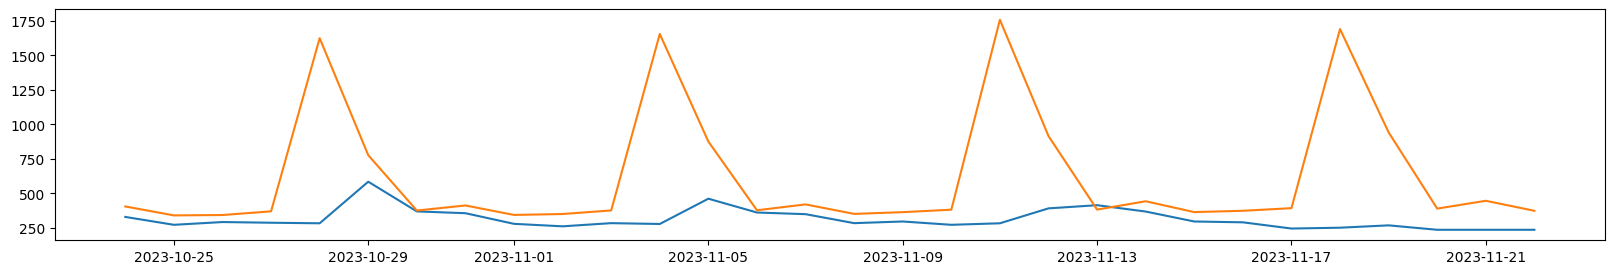

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot(test[target_column])
ax.plot(prediction.forecast)

RMSE of results

In [10]:
from metrics import print_evaluation_metrics
print_evaluation_metrics(prediction.forecast, test[target_column])

Evaluation Metrics:
MSE: 302023.17
RMSE: 549.57
MAE: 308.43
MAPE: nan
SMAPE: nan
